# **OpenClassrooms - Projet 2**
## *Préparez des données pour un organisme de santé publique*
### Open Food Facts
- **[Site officiel](https://world.openfoodfacts.org/)**
- **[Lien vers le dataset](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-scientist/P2/fr.openfoodfacts.org.products.csv.zip)**

## Importation des bibliothèques

In [1]:
# Bibliothèques de base
import pandas as pd
import numpy as np

# Visualisations
import seaborn as sns
import matplotlib.pyplot as plt

# Pour les imputations avec IterativeImputer
from sklearn.experimental import enable_iterative_imputer # Nécessaire car c'est une fonction expérimentale
from sklearn.impute import IterativeImputer

# Pour les imputations avec KNN
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

###############ATTENTION
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# Je précise le type de certaines colonnes au moment de l'importation
# pour éviter un message d'erreur DtypeWarning (mixed types)
dtype_colonne = {
                'code': object,
                'created_t': object,
                'last_modified_t': object,
                'manufacturing_places': object,
                'manufacturing_places_tags': object,
                'emb_codes': object,
                'emb_codes_tags': object,
                'first_packaging_code_geo': object,
                'cities': object,
                'cities_tags': object,
                'allergens': object,
                'allergens_fr': object,
                'traces': object,
                'traces_tags': object,
                'traces_fr': object,
                'ingredients_from_palm_oil_tags': object,
                }

data_raw = pd.read_csv("fr.openfoodfacts.org.products.csv", dtype=dtype_colonne, sep='\t')
#data_raw = pd.read_csv("en.openfoodfacts.org.products.csv", dtype=dtype_colonne, sep='	')

print('Importation terminée')

Importation terminée


## Premier aperçu du dataset

In [3]:
print("Premières lignes : ")
display(data_raw.head())


"""print("Dernières lignes")
display(data_raw.tail())
print("\n", ("#"*80), "\n")"""

print("Résumé des valeurs numériques : ")
display(data_raw.describe())


print("- Le dataset contient", data_raw.shape[0], "lignes et", data_raw.shape[1], "colonnes.")
print("- Il y a", data_raw.duplicated().sum(), "lignes en doubles.")

colonnes_vides = data_raw.columns[data_raw.nunique() == 0]
print("-", len(colonnes_vides), "colonnes du dataset sont entièrement vides :")
display(colonnes_vides.tolist())

# verbose = True pour afficher toutes les colonnes
data_raw.info()

Premières lignes : 


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Résumé des valeurs numériques : 


,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,3.770000e+02,49.400000,0.000000,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1.100000e+03,300.000000,5.000000,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1.674000e+03,898.000000,20.000000,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


- Le dataset contient 320772 lignes et 162 colonnes.
- Il y a 0 lignes en doubles.
- 16 colonnes du dataset sont entièrement vides :


['no_nutriments',
 'ingredients_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil',
 'nutrition_grade_uk',
 'butyric-acid_100g',
 'caproic-acid_100g',
 'lignoceric-acid_100g',
 'cerotic-acid_100g',
 'melissic-acid_100g',
 'elaidic-acid_100g',
 'mead-acid_100g',
 'erucic-acid_100g',
 'nervonic-acid_100g',
 'chlorophyl_100g',
 'glycemic-index_100g',
 'water-hardness_100g']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


## Création d'une fonction pour représenter le niveau de remplissage d'un dataset

In [4]:
def filling_level(dataset=data_raw):

    ####################################################################
    # Graphique montrant les pourcentages de vide pour chaque colonnes #
    ####################################################################

    dataset_a_utiliser = dataset

    # Si le dataset est totalement plein, pas la peine d'afficher ce graphique, qui serait totalement vide
    if dataset_a_utiliser.isna().sum().sum() != 0:

        colonnes_incompletes = dataset_a_utiliser.isna().mean()

        fig, ax = plt.subplots(figsize=(30,10))

        # Création d'une palette personnalisée
        colors = [{p<0.5: '#3A923A', 0.3<=p<=0.5: '#E1812C', p>0.5: '#C03D3E'}[True] for p in colonnes_incompletes.values.tolist()]
        sns.set_palette(sns.color_palette(colors))

        sns.barplot(x=colonnes_incompletes.index, y=colonnes_incompletes.values*100, alpha = 0.9)

        plt.xticks(rotation=90)
        ax.set_title('\nPourcentage de valeurs manquantes dans les différentes colonnes\n', fontsize='xx-large')
        ax.set_ylabel('Valeurs manquantes (%)', fontsize='x-large')

        plt.show()
    else:
        print("Ce dataset ne contient aucune valeur manquante.")

    ###########################################################
    # Diagramme en secteurs pour la répartition vide/non vide #
    ###########################################################

    # Si le dataset est totalement plein, pas la peine d'afficher ce diagramme, qui ne contiendrait qu'une seule valeur.
    if dataset_a_utiliser.isna().sum().sum() != 0:
        vide = dataset_a_utiliser.isnull().sum().sum() # Somme de la somme des NaN de chaque colonne
        plein = dataset_a_utiliser.notnull().sum().sum() # Somme de la somme des non NaN de chaque colonne

        labels = 'Plein', 'Vide'
        sizes = [plein, vide]

        colors=['#FFB2B2', '#B2B2FF']

        fig, ax = plt.subplots()
        plt.title("\nRemplissage du dataframe", fontsize=15)
        ax.pie(sizes, labels=labels, shadow=True, autopct='%1.1f%%', colors=colors, textprops={'color':"black", 'fontsize':13});
        plt.show()

        print("Il y a", len(colonnes_incompletes[colonnes_incompletes.values > 0.5]), "colonnes avec plus de 50 % de données manquantes.\n\n")


    ####################################################################
    # Diagramme en secteurs pour la répartition quantitatif/qualitatif #
    ####################################################################

    colonne_numeriques = dataset_a_utiliser.select_dtypes(np.number).shape[1]
    autres_colonnes = dataset_a_utiliser.shape[1] - dataset_a_utiliser.select_dtypes(np.number).shape[1]

    labels = 'Quantitatives', 'Qualitatives'
    sizes = [colonne_numeriques, autres_colonnes]

    colors=['#FFB2B2', '#B2B2FF']

    fig, ax = plt.subplots()
    plt.title("\nRépartition du type de variable", fontsize=15)
    ax.pie(sizes, labels=labels, shadow=True, autopct='%1.1f%%', colors=colors, textprops={'color':"black", 'fontsize':13});
    plt.show()

    print("Variables quantitatives :", colonne_numeriques)
    print("Variables qualitatives :", autres_colonnes)
    print("Total des variables :", dataset_a_utiliser.shape[1])

## Les données manquantes sont très nombreuses

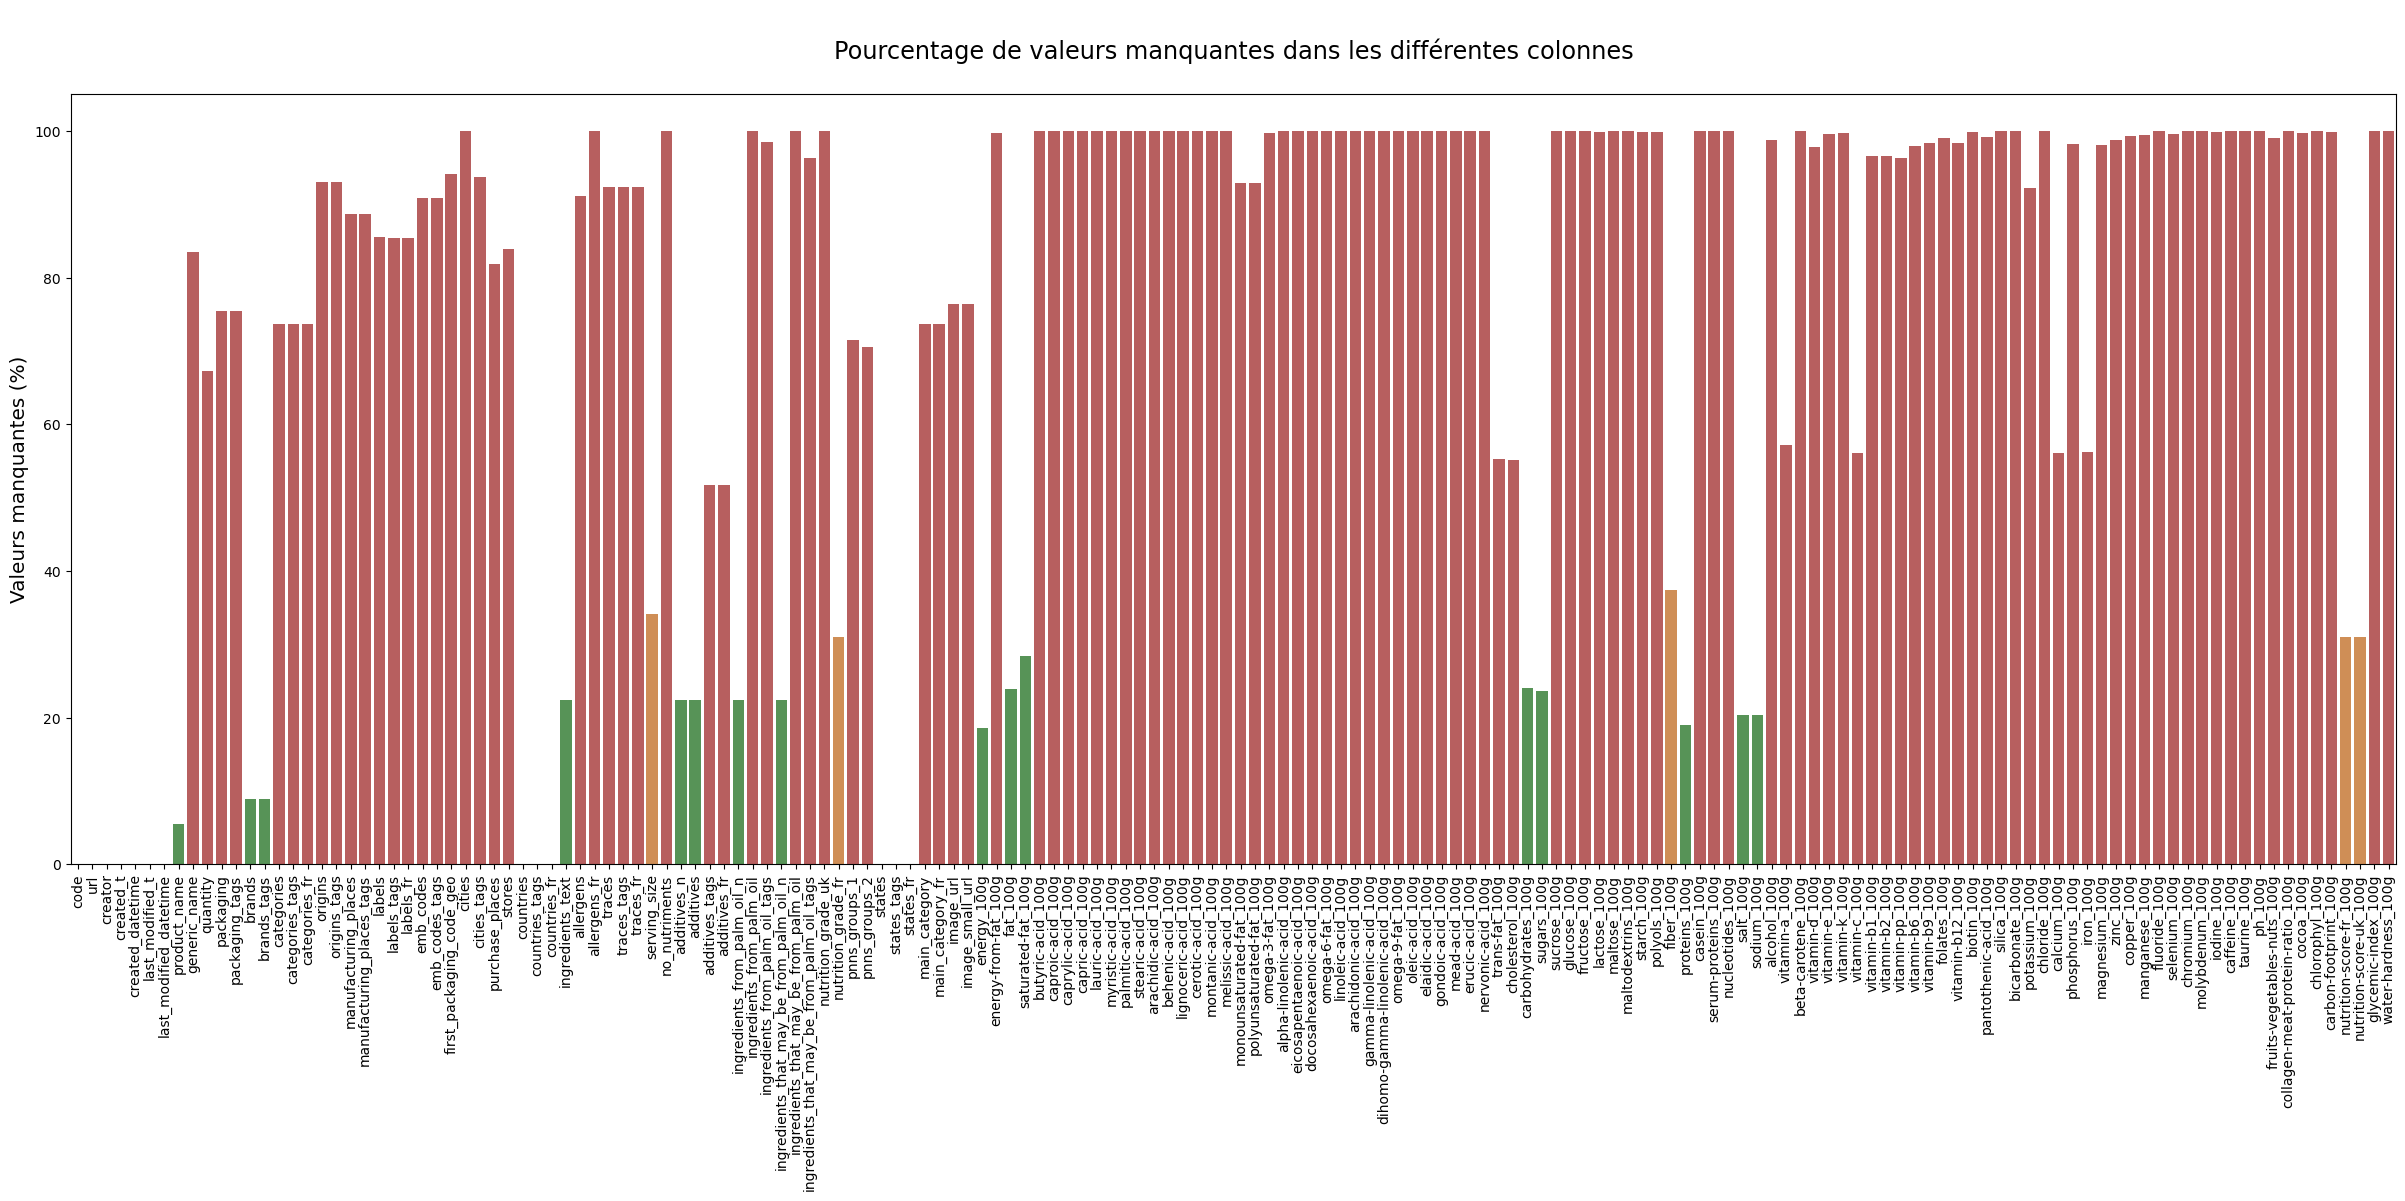

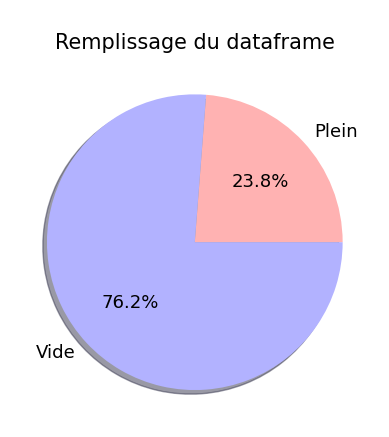

Il y a 128 colonnes avec plus de 50 % de données manquantes.




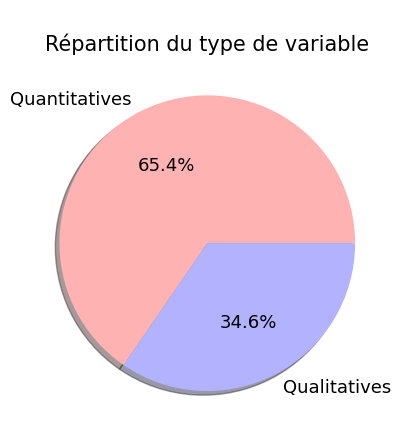

Variables quantitatives : 106
Variables qualitatives : 56
Total des variables : 162


In [5]:
filling_level(dataset=data_raw)

# **Nettoyage du dataset**

### Traitement de la colonne *code*

In [6]:
print("Il y a", data_raw['code'].isnull().sum(), "valeurs nulles dans la colonne code.")

# Suppression des lignes où 'code' est NaN
if data_raw['code'].isnull().sum() > 0:
    data_raw = data_raw[data_raw['code'].notna()]
    print("Valeurs nulles supprimées.")

print("Il y a", data_raw['code'].duplicated().sum(), "doubles dans la colonne code")


Il y a 23 valeurs nulles dans la colonne code.
Valeurs nulles supprimées.
Il y a 0 doubles dans la colonne code


### Traitement du nom des colonnes *biotin_100g* & *pantothenic-acid_100g*

biotin_100g est aussi appelée Vitamine B8<br>
pantothenic-acid_100g est aussi appelée Vitamine B5<br>
Cf la [doc des variables](https://world.openfoodfacts.org/data/data-fields.txt)<br>
Afin d'uniformiser les noms des colonnes des vitamines, on va les renommer.

In [7]:
data_raw.rename(columns={"biotin_100g": "vitamin-b8_100g", "pantothenic-acid_100g": "vitamin-b5_100g"}, errors="ignore", inplace=True)

### Suppression des colonnes avec plus de 90% de valeurs manquantes

In [8]:
colonnes_vides = data_raw.columns[data_raw.isnull().sum()/len(data_raw) >= 0.9]

# Si on veut conserver certaines colonnes malgré tout
colonnes_a_conserver = ['nutrition_grade_uk', 'allergens', 'traces'] # + [x for x in data_raw.columns if  '_100g' in x]

# Colonnes à supprimer, moins les colonnes qu'on veut conserver
colonnes_vides = [x for x in colonnes_vides if x not in colonnes_a_conserver]

data_clean = data_raw.drop(columns=colonnes_vides)

print("Colonnes supprimées : ")
print(colonnes_vides)

Colonnes supprimées : 
['origins', 'origins_tags', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'allergens_fr', 'traces_tags', 'traces_fr', 'no_nutriments', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags', 'energy-from-fat_100g', 'butyric-acid_100g', 'caproic-acid_100g', 'caprylic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g', 'myristic-acid_100g', 'palmitic-acid_100g', 'stearic-acid_100g', 'arachidic-acid_100g', 'behenic-acid_100g', 'lignoceric-acid_100g', 'cerotic-acid_100g', 'montanic-acid_100g', 'melissic-acid_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'arachidonic-acid_100g', 'gamma-linolenic-acid_100g', 'dihomo-gamma-linolenic-acid_100g', 'omega-9-fat_100g', 'oleic-acid_

### Sélection des colonnes qui nous intéressent

In [9]:
colonnes_diverses = [
                    'code',
                    'created_datetime',
                    'product_name',
                    'brands_tags',
                    'countries_tags',
                    'ingredients_text',
                    'additives_n',
                    'additives_tags',
                    'ingredients_from_palm_oil_n',
                    'ingredients_that_may_be_from_palm_oil_n',
                    'nutrition_grade_uk',
                    'nutrition_grade_fr',
                    'pnns_groups_1',
                    'pnns_groups_2',
                    'allergens',
                    'traces'
                    ]

# Toutes les colonnes qui finissent par "_100g"
colonnes_nutriments = [x for x in data_clean.columns if '_100g' in x]

colonnes_a_garder = colonnes_diverses + colonnes_nutriments

colonnes_non_gardees = [x for x in data_clean.columns if x not in colonnes_a_garder]

data_clean = data_clean[colonnes_a_garder]


print("Colonnes non conservées : ")
print(colonnes_non_gardees)

Colonnes non conservées : 
['url', 'creator', 'created_t', 'last_modified_t', 'last_modified_datetime', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'categories', 'categories_tags', 'categories_fr', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'purchase_places', 'stores', 'countries', 'countries_fr', 'serving_size', 'additives', 'additives_fr', 'states', 'states_tags', 'states_fr', 'main_category', 'main_category_fr', 'image_url', 'image_small_url']


### Creation d'une nouvelle colonne pays uniformisée

Je crée une nouvelle colonne *pays* à partir de *countries_tags* qui contiendra un pays par ligne (en Anglais).<br>
Pour les lignes de *countries_tags* qui contiennent plusieurs pays, je décide de ne garder que le premier.

Colonne pays créée
Nombre de valeurs différentes de la colonne pays avant traitement : 719
Nombre de valeurs différentes de la colonne pays après traitement : 167


count       166.000000
mean       1930.506024
std       15408.769012
min           1.000000
25%           2.000000
50%          10.000000
75%          71.000000
max      173013.000000
Name: code, dtype: float64

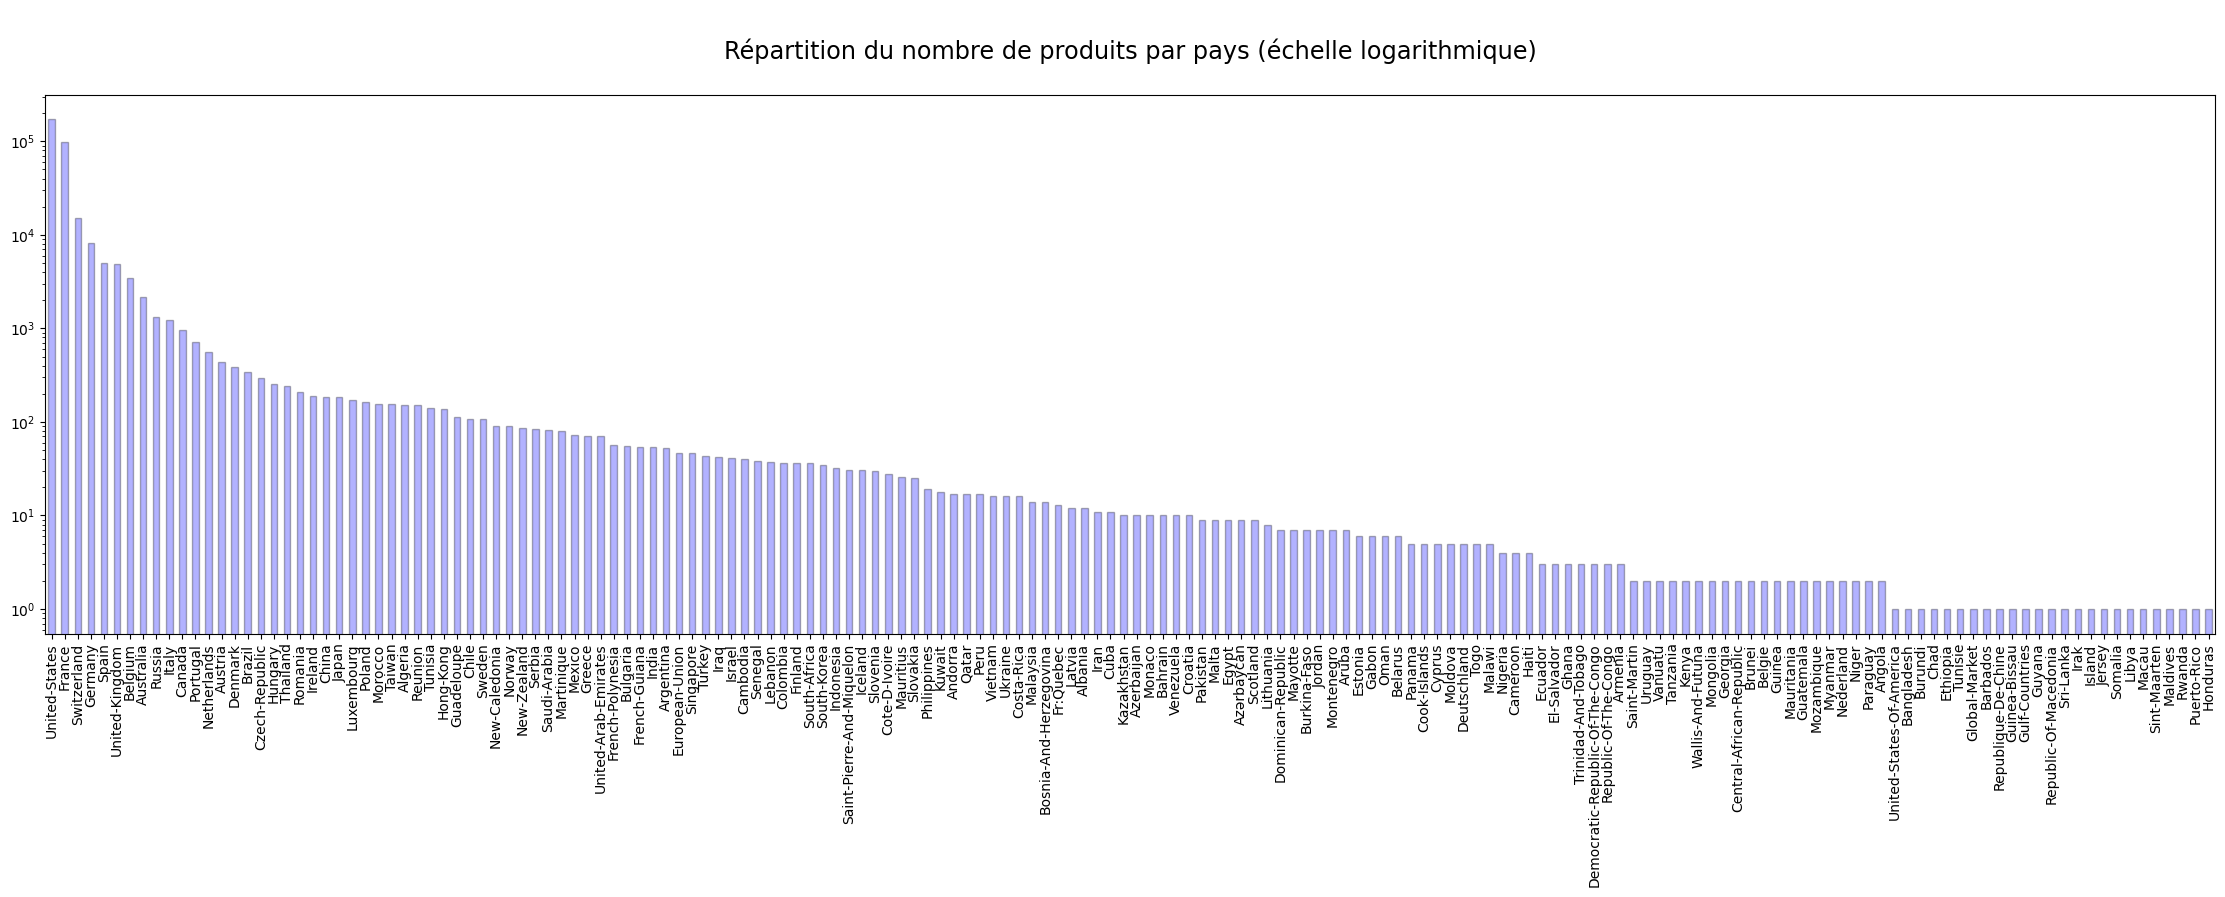

In [10]:
# Création d'une nouvelle colonne "pays", avec pour chaque ligne le contenu de "countries_tags" duquel j'ai enlevé les "en:"
data_clean = data_clean.assign(pays=data_clean['countries_tags'].str.replace(r'en:', '', regex=True))
print("Colonne pays créée")


print("Nombre de valeurs différentes de la colonne pays avant traitement :", len(data_clean['pays'].unique()))

# Pour les lignes de *countries_tags* qui contiennent plusieurs pays, je décide de ne garder que le premier.
data_clean['pays'] = data_clean['pays'].str.replace(',.*', '', regex=True)


# Dans ce dictionnaire sont stockées les valeurs invalides et les bonnes valeurs correspondantes
dico = {
        "سلطنة-عمان" : "oman",
        "السعودية" : "saudi-arabia",
        "other-日本" : "japan",
        "other-العراق" : "irak",
        "الإمارات-العربية-المتحدة" : "united-arab-emirates",
        "turkiye" : "turkey",
        "日本" : "japan",
        "other-japon" : "japan",
        "香港" : "hong-kong",
        "denemarken" : "denmark",
        "other-turquie" : "turkey",
        "quebec" : "canada",
        "भारत" : "india",
        "البحرين" : "bahrain",
        "world" : np.nan
        }

# On utilise le dictionnaire ci-dessus pour faire les corrections dans la colonne "pays"
data_clean.replace({"pays": dico},inplace=True)

# Je mets une majuscule à chaque mot des nom de pays
data_clean['pays'] = data_clean['pays'].str.title()

# Je supprime la colonne 'countries_tags' dont on a plus besoin
data_clean = data_clean.drop(columns='countries_tags')

print("Nombre de valeurs différentes de la colonne pays après traitement :", len(data_clean['pays'].unique()))

# Je prends le compte pour la colonne 'code' que je sais pleine à 100%
display(data_clean.groupby(['pays'])['code'].count().describe())


plt.figure(figsize=(28,7))
plt.title("\nRépartition du nombre de produits par pays (échelle logarithmique)\n", fontsize='xx-large')
plt.yscale("log")
data_clean.groupby(['pays'])['code'].count().sort_values(ascending=False).plot.bar(color = "blue", alpha = 0.3, edgecolor='black').set(xlabel=None)
plt.show()




## Traitement du type des colonnes

### Conversion de la colonne *created_datetime* au format date

In [11]:
data_clean['created_datetime'] = pd.to_datetime(data_clean['created_datetime'], errors='coerce')

Je supprime les lignes date vides s'il y en a.

In [12]:
print("Valeurs manquantes pour 'created_datetime' avant traitement :", data_clean['created_datetime'].isnull().sum())

# Suppression des lignes où 'created_datetime' est NaT
if data_clean['created_datetime'].isnull().sum() > 0:
    data_clean = data_clean[data_clean['created_datetime'].notna()]
    print("Valeurs nulles supprimées.")

print("Valeurs manquantes pour 'created_datetime' après traitement :", data_clean['created_datetime'].isnull().sum())

Valeurs manquantes pour 'created_datetime' avant traitement : 1
Valeurs nulles supprimées.
Valeurs manquantes pour 'created_datetime' après traitement : 0


### Conversion de la colonne *nutrition_grade_uk* au format object

Plus tard, on remplira cette colonne avec les nutrigrades (a, b, c, d et e)

In [13]:
data_clean['nutrition_grade_uk'] = data_clean['nutrition_grade_uk'].astype(object)

*additives_n*, *ingredients_from_palm_oil_n* et *ingredients_that_may_be_from_palm_oil_n* sont des variables quantitatives discrètes.<br>
Je vais passer leur type en *Int64*

In [14]:
quantitatives_discretes = [
                            'additives_n',
                            'ingredients_from_palm_oil_n',
                            'ingredients_that_may_be_from_palm_oil_n'
                          ]

for i in quantitatives_discretes:
    data_clean[i] = data_clean[i].astype('Int64') # attention au i majuscule dans 'Int64'

- Les autres types sont OK.

In [15]:
data_clean.dtypes

code                                                    object
created_datetime                           datetime64[ns, UTC]
product_name                                            object
brands_tags                                             object
ingredients_text                                        object
additives_n                                              Int64
additives_tags                                          object
ingredients_from_palm_oil_n                              Int64
ingredients_that_may_be_from_palm_oil_n                  Int64
nutrition_grade_uk                                      object
nutrition_grade_fr                                      object
pnns_groups_1                                           object
pnns_groups_2                                           object
allergens                                               object
traces                                                  object
energy_100g                                            

### Gestion des colonnes Macro Nutriments

- *salt_100g* & *sodium_100g*

In [16]:
print('Valeurs manquantes dans sel :', data_clean['salt_100g'].isna().sum())
print('Valeurs manquantes dans sodium :', data_clean['sodium_100g'].isna().sum())
print("Quand sel est vide et que sodium non :", len(data_clean.loc[data_clean['salt_100g'].isna() & data_clean['sodium_100g'].notna()]))
print("Quand sodium est vide et que sel non :", len(data_clean.loc[data_clean['salt_100g'].notna() & data_clean['sodium_100g'].isna()]))

Valeurs manquantes dans sel : 65239
Valeurs manquantes dans sodium : 65286
Quand sel est vide et que sodium non : 0
Quand sodium est vide et que sel non : 47


- On ne conserve du coup que *salt_100g*

In [17]:
data_clean = data_clean.drop(columns='sodium_100g')

- *carbohydrates_100g* &  *sugars_100g*

In [18]:
print('Valeurs manquantes dans sugars_100g :', data_clean['sugars_100g'].isna().sum())
print('Valeurs manquantes dans carbohydrates_100g :', data_clean['carbohydrates_100g'].isna().sum())
print("Quand sugars_100g est vide et que carbohydrates_100g non :", len(data_clean.loc[data_clean['sugars_100g'].isna() & data_clean['carbohydrates_100g'].notna()]))
print("Quand carbohydrates_100g est vide et que sugars_100g non :", len(data_clean.loc[data_clean['sugars_100g'].notna() & data_clean['carbohydrates_100g'].isna()]))

Valeurs manquantes dans sugars_100g : 75778
Valeurs manquantes dans carbohydrates_100g : 77161
Quand sugars_100g est vide et que carbohydrates_100g non : 16196
Quand carbohydrates_100g est vide et que sugars_100g non : 17579


- Pour les lignes où *carbohydrates_100g* (glucides) est vide alors que *sugars_100g* (sucres) ne l'est pas ne sont pas logiques car les sucres sont inclus dans les glucides.<br>
Donc pour ces lignes on peut donner la valeur de *sugars_100g* à *carbohydrates_100g*.
- Attention, l'inverse n'est pas vrai, un aliment peut contenir des glucides mais pas de sucres (les sucres sont inclus dans les glucides, pas l'inverse)

In [19]:
print('Valeurs manquantes dans carbohydrates_100g avant traitement :', data_clean['carbohydrates_100g'].isna().sum())
data_clean['carbohydrates_100g'].loc[data_clean['sugars_100g'].notna() & data_clean['carbohydrates_100g'].isna()] = data_clean['sugars_100g'].loc[data_clean['sugars_100g'].notna() & data_clean['carbohydrates_100g'].isna()]
print('Valeurs manquantes dans carbohydrates_100g avant traitement :', data_clean['carbohydrates_100g'].isna().sum())

Valeurs manquantes dans carbohydrates_100g avant traitement : 77161
Valeurs manquantes dans carbohydrates_100g avant traitement : 59582


## Traitement des valeurs aberrantes

## Macro nutriments

On considère que tous les macro nutriments sont bien toujours exprimés en gramme, et que donc si une valeur dépasse 100 (pour 100g), elle est aberrante.<br>
Si dans de rares cas les valeurs seraient renseignées en milligramme, dans le doute on supprime.<br>
Pour les valeurs négatives, je les repasse en positif. Une autre approche possible serait de considérer toutes les valeurs négatives comme invalides et les remplacer par 0 ou un NaN.

In [20]:
# Liste des colonnes représentant des macro nutriments :
macro_nutriments = [
                    'fat_100g',
                    'saturated-fat_100g',
                    'carbohydrates_100g',
                    'sugars_100g',
                    'fiber_100g',
                    'proteins_100g',
                    'salt_100g'
]


print("Macro nutriments avant traitement :")
display(data_clean[macro_nutriments].describe())
print("Valeurs nulles :")
display(data_clean[macro_nutriments].isnull().sum())

# Je mets toutes les valeurs en positif
data_clean[macro_nutriments] = data_clean[macro_nutriments].abs()

# Je supprime toutes les valeurs > 100, puisque c'est normalement des valeurs pour 100g
for i in macro_nutriments:
    data_clean[i].loc[data_clean[i] > 100] = np.nan


print("Macro nutriments après traitement :")
display(data_clean[macro_nutriments].describe())
print("Valeurs nulles :")
display(data_clean[macro_nutriments].isnull().sum())

Macro nutriments avant traitement :


,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
count,243890.000000,229553.000000,261166.000000,244970.000000,200885.000000,259905.000000,255509.000000
mean,12.730422,5.129952,30.931604,16.003304,2.862119,7.076378,2.028632
std,17.578770,8.014250,30.305477,22.327153,12.867610,8.409151,128.269705
min,0.000000,0.000000,0.000000,-17.860000,-6.700000,-800.000000,0.000000
25%,0.000000,0.000000,5.000000,1.300000,0.000000,0.700000,0.063500
50%,5.000000,1.790000,19.000000,5.710000,1.500000,4.760000,0.581660
75%,20.000000,7.140000,57.140000,24.000000,3.600000,10.000000,1.374140
max,714.290000,550.000000,3520.000000,3520.000000,5380.000000,430.000000,64312.800000


Valeurs nulles :


fat_100g               76858
saturated-fat_100g     91195
carbohydrates_100g     59582
sugars_100g            75778
fiber_100g            119863
proteins_100g          60843
salt_100g              65239
dtype: int64

Macro nutriments après traitement :


,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
count,243886.000000,229550.000000,261146.000000,244958.000000,200881.000000,259902.000000,255351.000000
mean,12.725299,5.125945,30.900758,15.984961,2.832500,7.079834,1.588503
std,17.503718,7.913695,28.970975,21.165017,4.588278,8.156622,6.242543
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,5.000000,1.300000,0.000000,0.700000,0.063500
50%,5.000000,1.790000,19.000000,5.710000,1.500000,4.760000,0.580000
75%,20.000000,7.140000,57.140000,24.000000,3.600000,10.000000,1.371600
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


Valeurs nulles :


fat_100g               76862
saturated-fat_100g     91198
carbohydrates_100g     59602
sugars_100g            75790
fiber_100g            119867
proteins_100g          60846
salt_100g              65397
dtype: int64

#################### fat_100g ####################


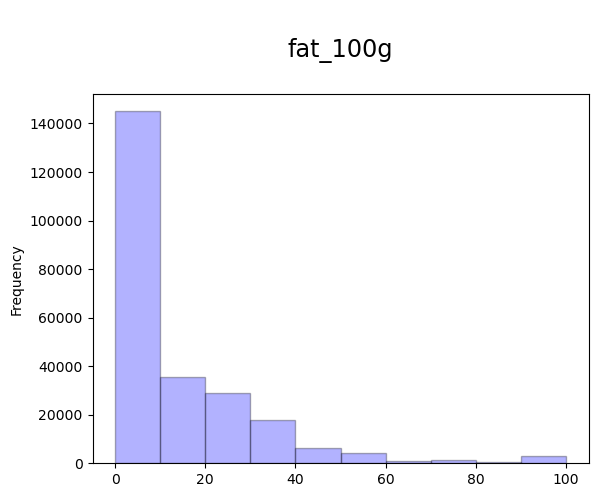

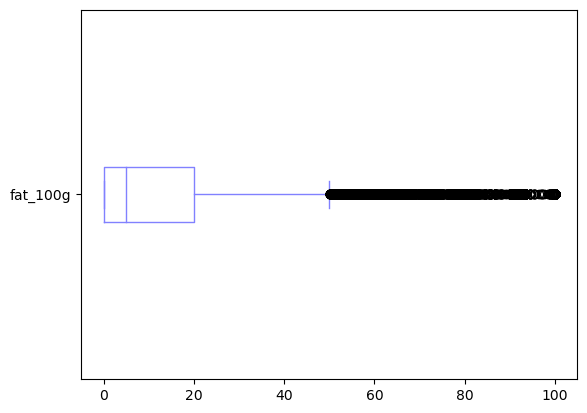

#################### saturated-fat_100g ####################


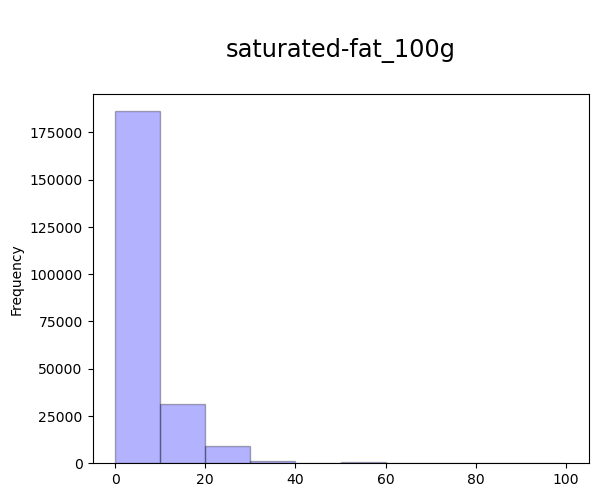

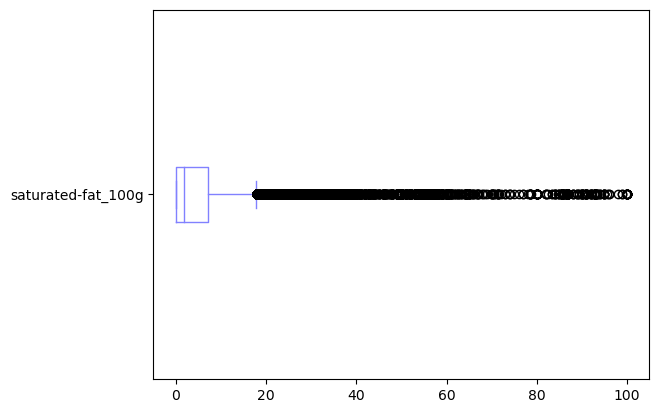

#################### carbohydrates_100g ####################


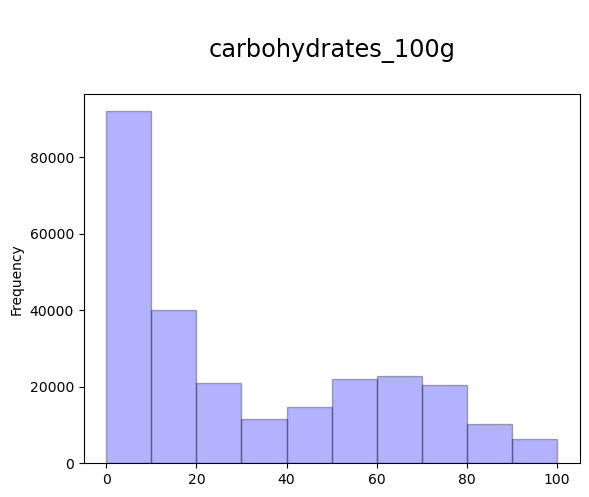

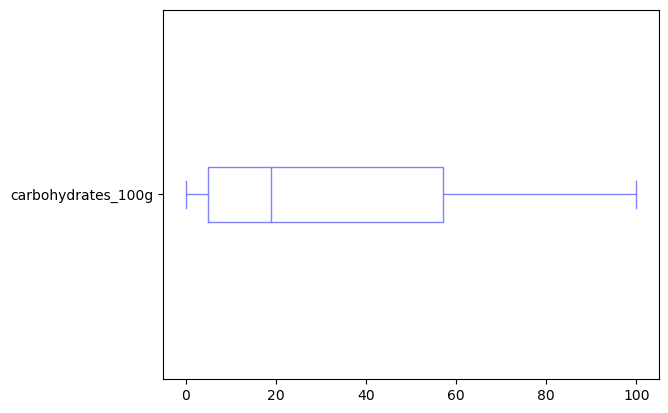

#################### sugars_100g ####################


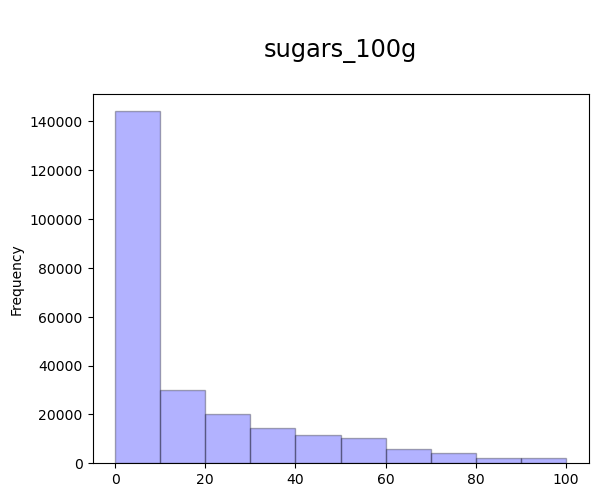

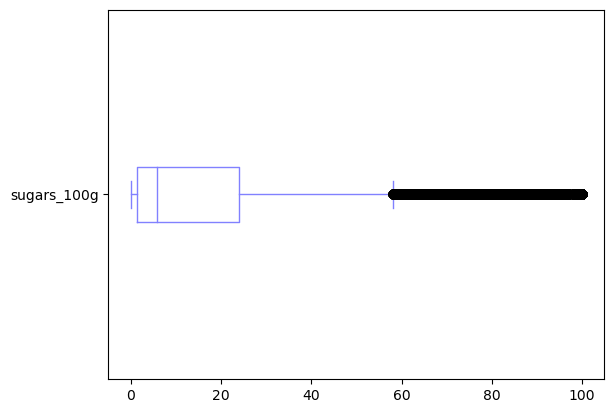

#################### fiber_100g ####################


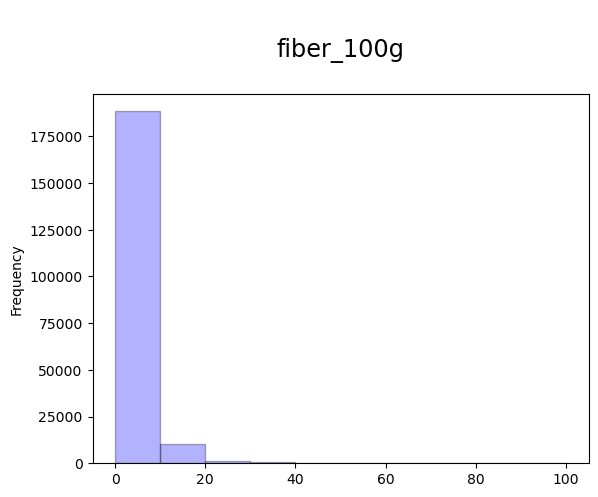

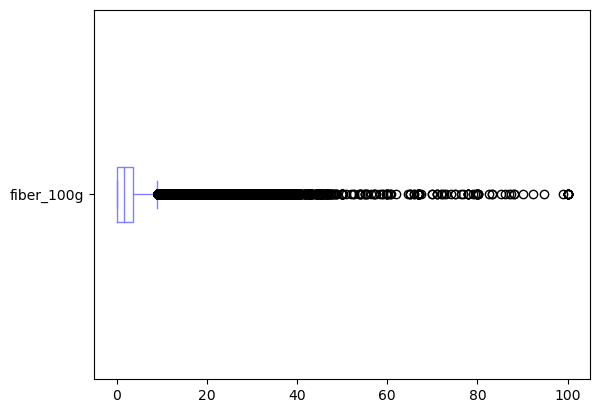

#################### proteins_100g ####################


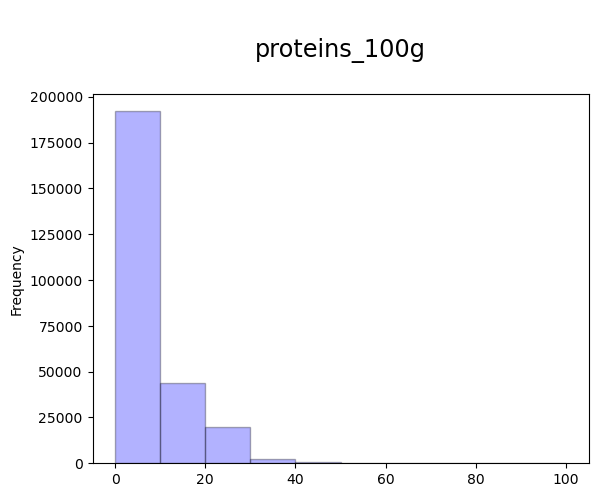

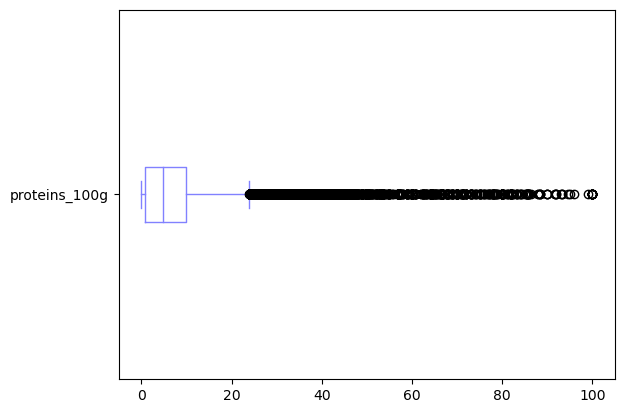

#################### salt_100g ####################


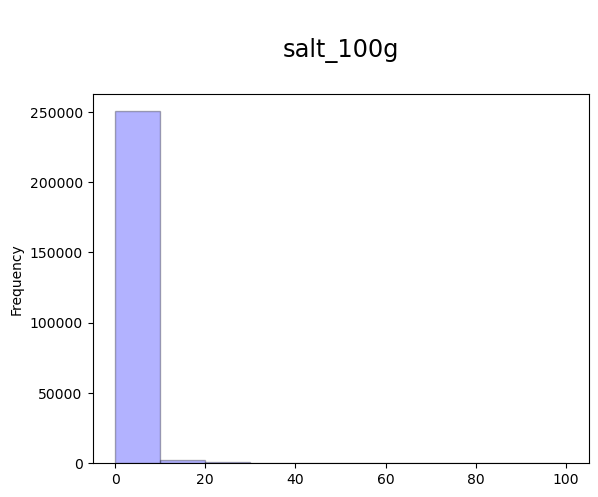

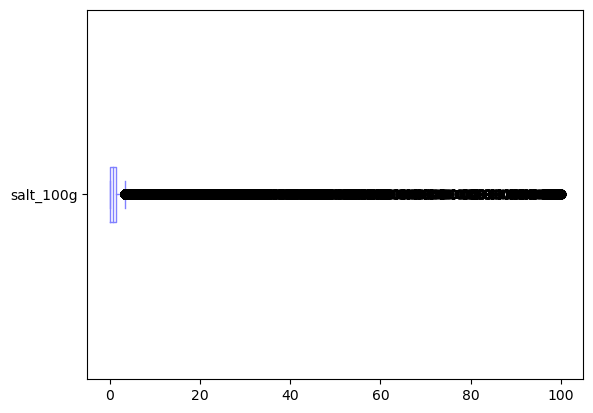

In [21]:
for i in macro_nutriments:
    print("#"*20, i, "#"*20)
    plt.title(f"\n{i}\n", fontsize='xx-large')
    data_clean[i].plot.hist(color = "blue", alpha = 0.3, edgecolor='black');
    plt.show()
    data_clean[i].plot.box(color = "#8181FF", vert=False);
    plt.show()

## Micro nutriments

On considère que les micros nutriments sont exprimés en milligrammes, donc si une valeur dépasse 100k (pour 100g, soit 100k mg), elle est aberrante.<br>
Pour les valeurs négatives, je les repasse en positif. Une autre approche possible serait de considérer toutes les valeurs négatives comme invalides et les remplacer par 0 ou un NaN.<br>
Pour les valeurs inférieures à 1 : elles devaient avoir été entrées en gramme, donc je multiplie par 1000.


In [22]:
# Je vais prendre toutes les colonnes finissant en '_100g'
# y retirer la liste de macro nutriments, les vitamines + quelque colonnes spécifiques
# Comme ça si dans un futur dataset certaines colonnes finissaient par
# passer le filtre des colonnes vides au début, elles seraient incluses
colonnes_100g = [x for x in data_clean.columns if  '_100g' in x]
vitamines = [x for x in data_clean.columns if  '_100g' and 'vitamin' in x]
a_retirer = macro_nutriments + vitamines + [
                                            'energy_100g',
                                            'nutrition-score-fr_100g',
                                            'nutrition-score-uk_100g'
                                            ]

micro_nutriments = [i for i in colonnes_100g if i not in a_retirer]


print("Micro nutriments avant traitement :")
display(data_clean[micro_nutriments].describe())
print("Valeurs nulles :")
display(data_clean[micro_nutriments].isnull().sum())


# Je mets toutes les valeurs en positif
data_clean[micro_nutriments] = data_clean[micro_nutriments].abs()

# Je supprime toutes les valeurs > 100000, puisque c'est normalement des valeurs en mg pour 100g
for i in micro_nutriments:
    data_clean[i].loc[data_clean[i] > 100000] = np.nan

# Je multiplie les valeurs < 1 (présumées exprimées en grammes) par 1000 pour les mettre en mg comme le reste
for i in micro_nutriments:
    data_clean[i].loc[data_clean[i] < 1] = data_clean[i].loc[data_clean[i] < 1] * 1000


print("Micro nutriments après traitement :")
display(data_clean[micro_nutriments].describe())
print("Valeurs nulles :")
display(data_clean[micro_nutriments].isnull().sum())


Micro nutriments avant traitement :


,trans-fat_100g,cholesterol_100g,calcium_100g,iron_100g
count,143298.000000,144090.000000,141050.000000,140462.000000
mean,0.073476,0.020071,0.125163,0.003652
std,1.540223,0.358062,3.318263,0.214408
min,-3.570000,0.000000,0.000000,-0.000260
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.035000,0.001010
75%,0.000000,0.020000,0.106000,0.002400
max,369.000000,95.238000,694.737000,50.000000


Valeurs nulles :


trans-fat_100g      177450
cholesterol_100g    176658
calcium_100g        179698
iron_100g           180286
dtype: int64

Micro nutriments après traitement :


,trans-fat_100g,cholesterol_100g,calcium_100g,iron_100g
count,143298.000000,144090.000000,141050.000000,140462.000000
mean,3.877080,18.280727,86.420525,1.878646
std,47.614805,37.873753,152.037585,5.141388
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,35.000000,1.010000
75%,0.000000,20.000000,103.000000,2.400000
max,993.000000,996.000000,993.000000,892.860000


Valeurs nulles :


trans-fat_100g      177450
cholesterol_100g    176658
calcium_100g        179698
iron_100g           180286
dtype: int64

#################### trans-fat_100g ####################


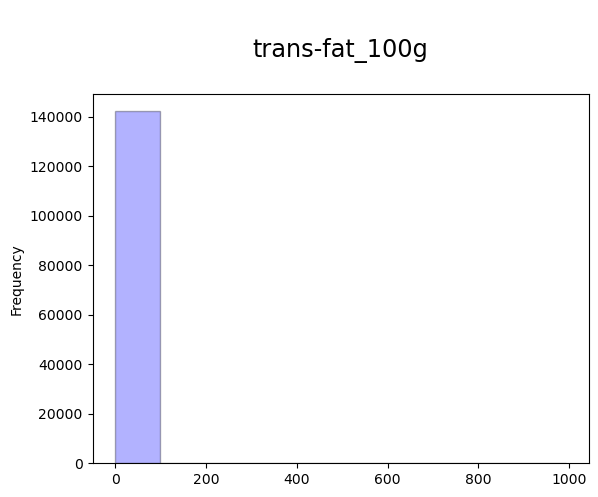

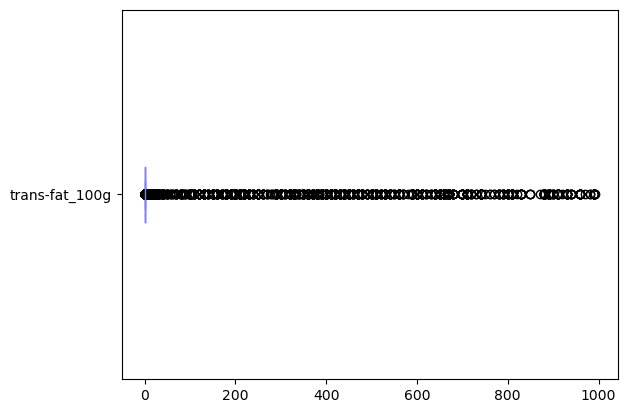

#################### cholesterol_100g ####################


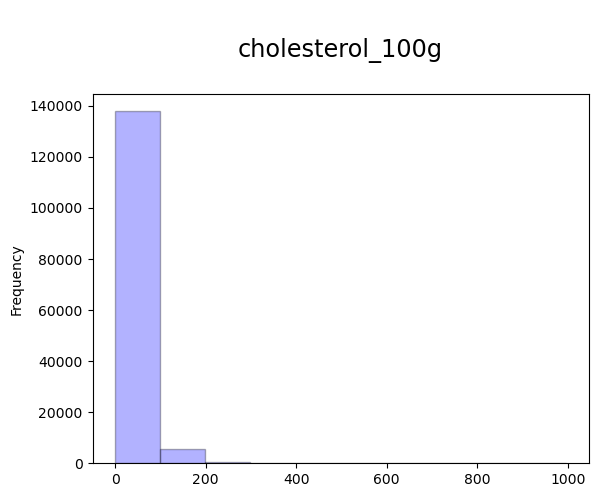

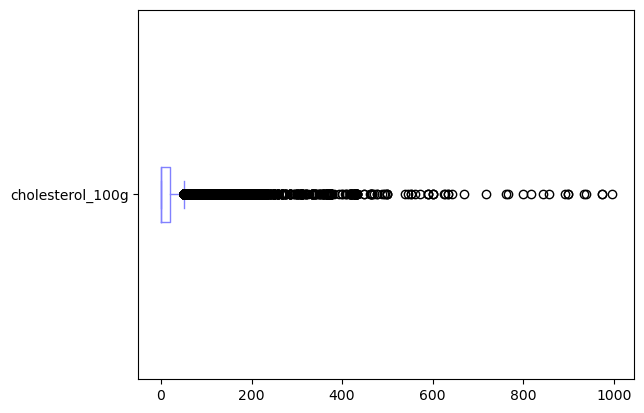

#################### calcium_100g ####################


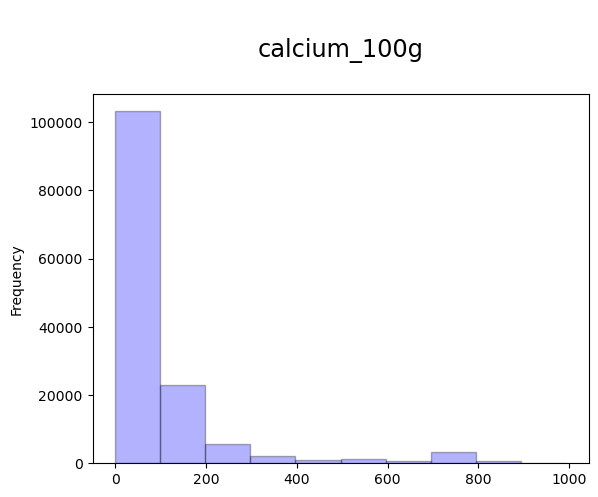

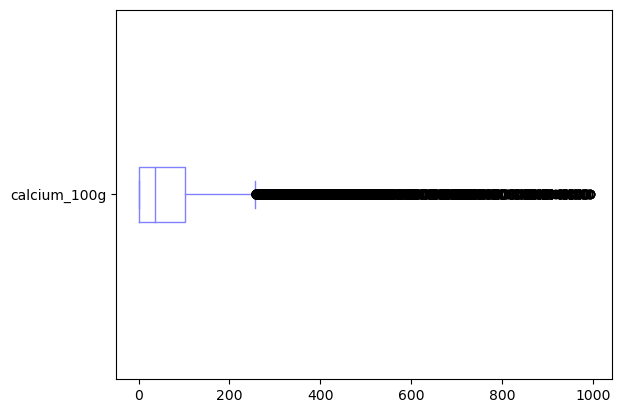

#################### iron_100g ####################


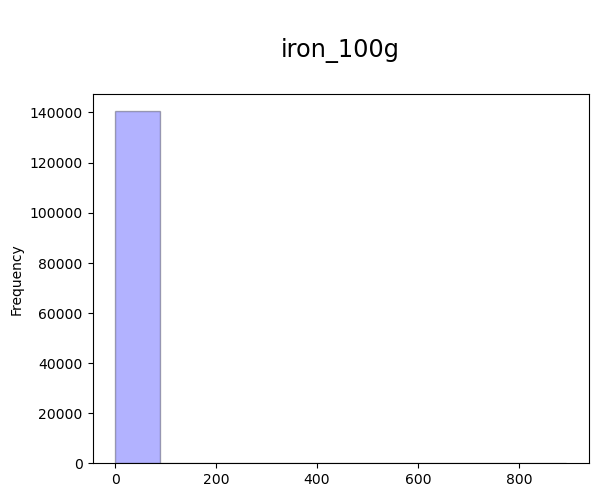

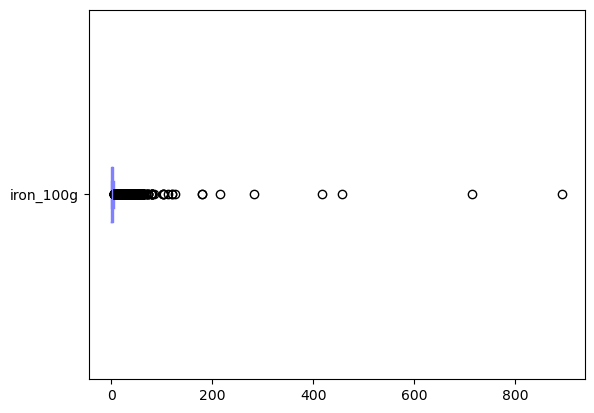

In [23]:
for i in micro_nutriments:
    print("#"*20, i, "#"*20)
    plt.title(f"\n{i}\n", fontsize='xx-large')
    data_clean[i].plot.hist(color = "blue", alpha = 0.3, edgecolor='black');
    plt.show()
    data_clean[i].plot.box(color = "#8181FF", vert=False);
    plt.show()

## Vitamines

On considère que les vitamines sont exprimés en mg (c'est souvent le cas quand on parle de nourriture), donc rien d'aberrant si ça dépasse 100.<br>
Pour les valeurs négatives, je les repasse en positif. Une autre approche possible serait de considérer toutes les valeurs négatives comme invalides et les remplacer par 0 ou un NaN.<br>
Pour les valeurs inférieures à 1 : elles devaient avoir été entrées en grammes. Donc je multiplie par 1000.

In [24]:
vitamines = [x for x in data_clean.columns if  '_100g' and 'vitamin' in x]

print("Vitamines avant traitement :")
display(data_clean[vitamines].describe())
print("Valeurs nulles :")
display(data_clean[vitamines].isnull().sum())

# Je mets toutes les valeurs en positif
data_clean[vitamines] = data_clean[vitamines].abs()

# Je multiplie les valeurs < 1 (présumées exprimées en grammes) par 1000 pour les mettre en mg comme le reste
for i in vitamines:
    data_clean[i].loc[data_clean[i] < 1] = data_clean[i].loc[data_clean[i] < 1] * 1000

print("Vitamines avant traitement :")
display(data_clean[vitamines].describe())
print("Valeurs nulles :")
display(data_clean[vitamines].isnull().sum())


Vitamines avant traitement :


,vitamin-a_100g,vitamin-c_100g
count,137554.000000,140867.000000
mean,0.000397,0.023367
std,0.073278,2.236451
min,-0.000340,-0.002100
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000107,0.003700
max,26.700000,716.981100


Valeurs nulles :


vitamin-a_100g    183194
vitamin-c_100g    179881
dtype: int64

Vitamines avant traitement :


,vitamin-a_100g,vitamin-c_100g
count,137554.000000,140867.000000
mean,0.166312,7.478665
std,2.338444,31.509671
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.107100,3.600000
max,800.000000,990.200000


Valeurs nulles :


vitamin-a_100g    183194
vitamin-c_100g    179881
dtype: int64

#################### vitamin-a_100g ####################


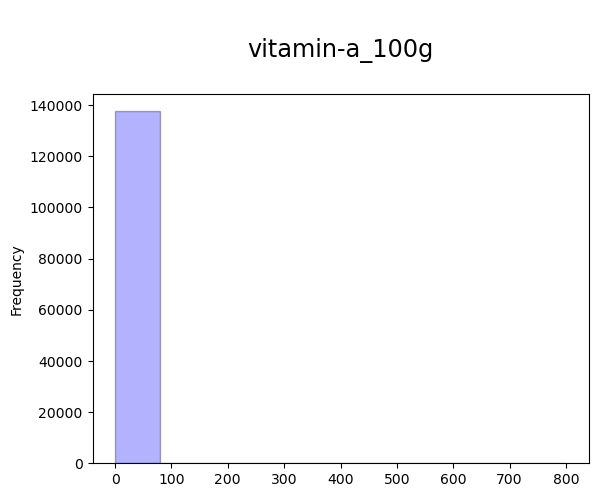

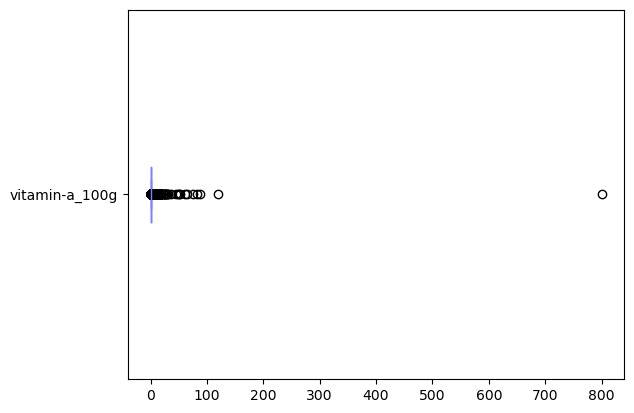

#################### vitamin-c_100g ####################


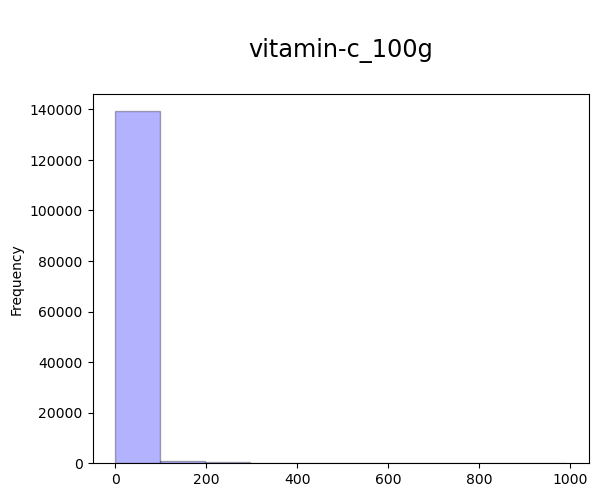

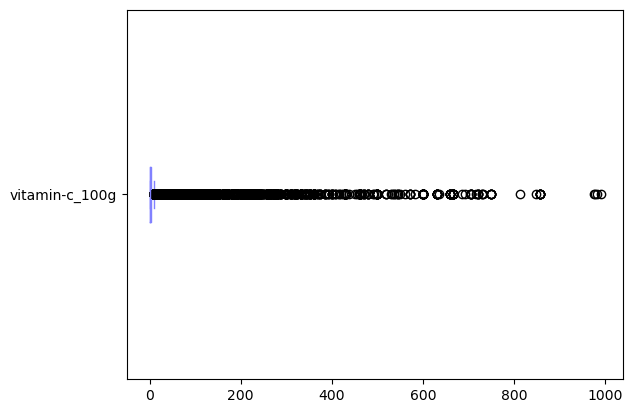

In [25]:
for i in vitamines:
    print("#"*20, i, "#"*20)
    plt.title(f"\n{i}\n", fontsize='xx-large')
    data_clean[i].plot.hist(color = "blue", alpha = 0.3, edgecolor='black');
    plt.show()
    data_clean[i].plot.box(color = "#8181FF", vert=False);
    plt.show()

## Colonnes *ingredients_from_palm_oil_n* et *ingredients_that_may_be_from_palm_oil_n*

In [26]:
palm_oil_n = [
        'ingredients_from_palm_oil_n',
        'ingredients_that_may_be_from_palm_oil_n'
]

display(data_clean[palm_oil_n].describe())


,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
count,248938.0,248938.0
mean,0.01966,0.055247
std,0.140524,0.269208
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,2.0,6.0


Il n'a a pas l'air d'avoir de souci ici

#################### ingredients_from_palm_oil_n ####################


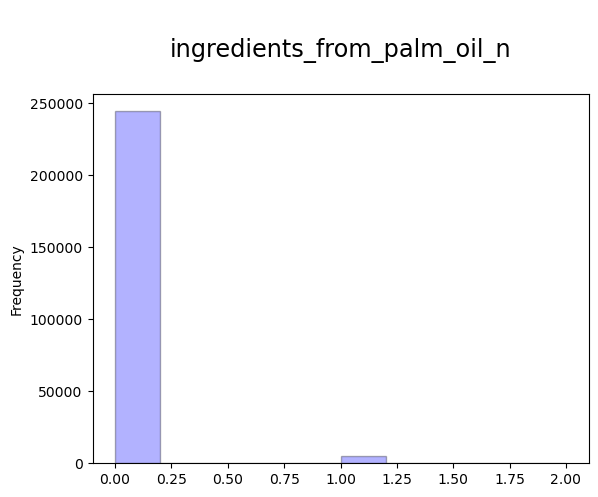

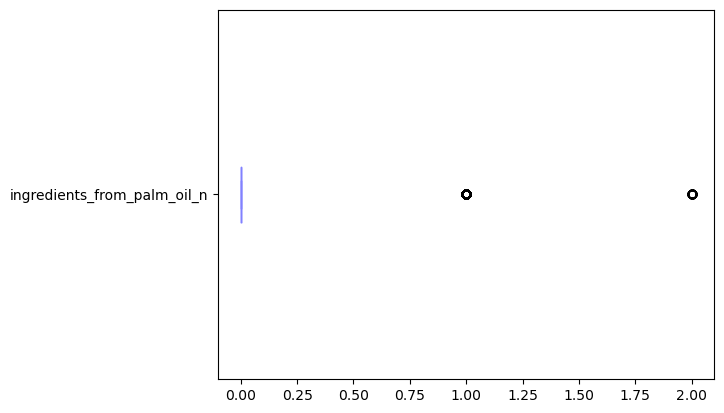

#################### ingredients_that_may_be_from_palm_oil_n ####################


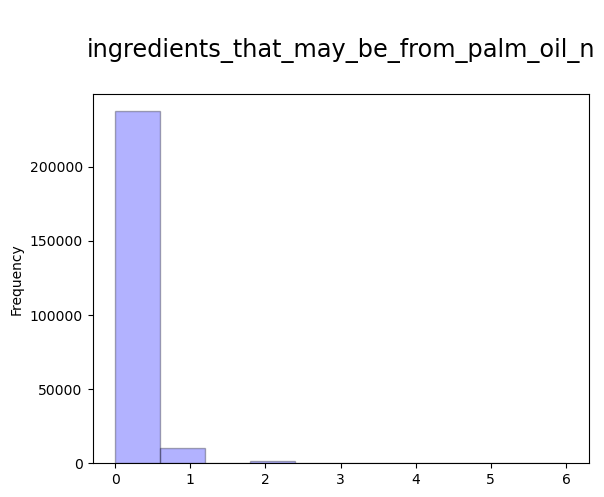

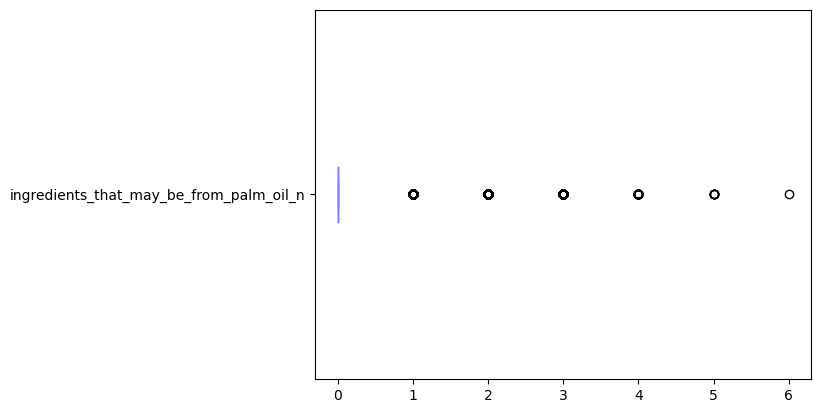

In [27]:
for i in ['ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n']:
    print("#"*20, i, "#"*20)
    plt.title(f"\n{i}\n", fontsize='xx-large')
    data_clean[i].plot.hist(color = "blue", alpha = 0.3, edgecolor='black');
    plt.show()
    data_clean[i].plot.box(color = "#8181FF", vert=False);
    plt.show()

## Colonne *additives_n*

In [28]:
display(data_clean['additives_n'].describe())

count    248938.0
mean     1.936024
std      2.502024
min           0.0
25%           0.0
50%           1.0
75%           3.0
max          31.0
Name: additives_n, dtype: Float64

La valeur max a l'air anormalement élevée ! Faisons un histogramme.

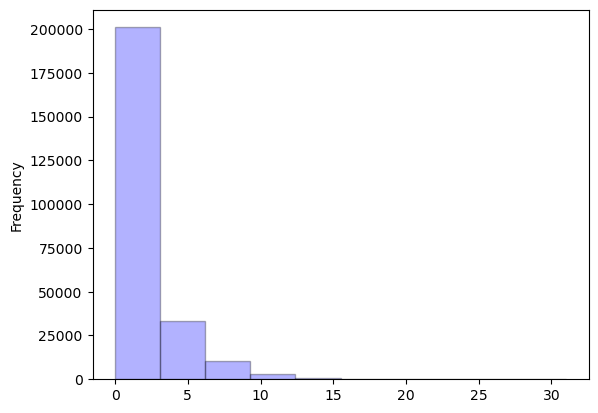

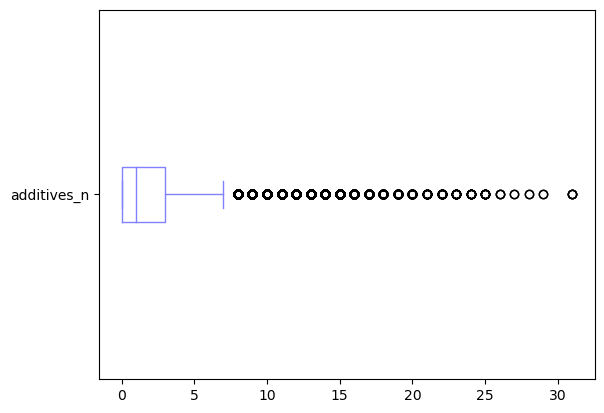

In [29]:
data_clean['additives_n'].plot.hist(color = "blue", alpha = 0.3, edgecolor='black');
plt.show()
data_clean['additives_n'].plot.box(color = "#8181FF", vert=False);
plt.show()

Cependant, en regardant le nom des produits concernés, ça semble plausible. Donc des valeurs atypiques plus qu'aberrante : 

In [30]:
data_clean.loc[data_clean['additives_n'] > 25][['product_name','additives_n']]

,product_name,additives_n
13169,"Carvel, The Original Ice Cream Cake, Chocolate...",26
16566,"Ice Cream Cake, Vanilla & Chocolate Swirl",28
21432,Star Crunch Cookies,28
61104,"Jon Donaire, Red Velvet Ice Cream Cupcakes",26
78862,"Ice Cream Cake, Chocolate & Vanilla Swirl",27
91122,Caramel Pecan Danish Coffeecake,29
91130,Mackinaw Fudge Cake,29
156634,Italian Style Pinwheels,31
160788,"Sweet Espresso Caramel Cake, Sea Salt Caramel",27
184345,Confiserie,31


Est-il possible de combler des valeurs manquantes de la colonne additives_n avec less informations de additives_tags ?

In [31]:
print("Il y a", len(data_clean.loc[data_clean['additives_n'].isnull() & data_clean['additives_tags'].notnull()]), "ligne(s) où additives_n est vide alors que additives_tags est non vide.")

Il y a 0 ligne(s) où additives_n est vide alors que additives_tags est non vide.


Le cas de figure ne se présent pas.

En résumé : pas de traitement sur la colonne *additives_n*.

## Colonne *nutrition_grade_fr*

In [32]:
print("Toutes les valeurs de la colonne nutrition_grade_fr :", data_clean['nutrition_grade_fr'].unique())


Toutes les valeurs de la colonne nutrition_grade_fr : [nan 'd' 'b' 'c' 'a' 'e']


Rien d'aberrant ici, pas de traitement.

## Colonnes *pnns_groups_1* & *pnns_groups_2*


In [33]:
display(data_clean.loc[data_clean['pnns_groups_1'].notnull()][['pnns_groups_1', 'pnns_groups_2']].describe())
print("groups_1 NaN + unknown :", len(data_clean.loc[(data_clean['pnns_groups_1'] == "unknown") | (data_clean['pnns_groups_1'].isnull())]))
print("groups_1 NaN :", len(data_clean.loc[data_clean['pnns_groups_1'].isnull()]))
print("groups_1 unknown :", len(data_clean.loc[data_clean['pnns_groups_1'] == "unknown"]))
print("----------")
print("groups_2 NaN + unknown :", len(data_clean.loc[(data_clean['pnns_groups_2'] == "unknown") | (data_clean['pnns_groups_2'].isnull())]))
print("groups_2 NaN :", len(data_clean.loc[data_clean['pnns_groups_2'].isnull()]))
print("groups_2 unknown :", len(data_clean.loc[data_clean['pnns_groups_2'] == "unknown"]))

,pnns_groups_1,pnns_groups_2
count,91512,91512
unique,14,40
top,unknown,unknown
freq,22624,22624


groups_1 NaN + unknown : 251860
groups_1 NaN : 229236
groups_1 unknown : 22624
----------
groups_2 NaN + unknown : 248882
groups_2 NaN : 226258
groups_2 unknown : 22624


- Il y a beaucoup de "unknown" dans *pnns_groups_1* et *pnns_groups_2*. Si le type d'aliment était bien identifié mais pas présent dans les différents groupes, on aurait quelque chose du type "other".<br>
Ici "unknown" signifie, inconnu, non renseigné. Donc je vais les remplacer par des NaN.
- Par ailleurs, certaines valeurs de *pnns_groups_2* sont des doublons sans majuscule : j'uniformise.
- Enfin, certaines valeurs de *pnns_groups_1* sont des doublons sans majuscule et d'autres avec des tirets : j'uniformise.

In [34]:
print("Avant traitement :")
display(data_clean['pnns_groups_1'].describe())
print("Valeurs nulles :", data_clean['pnns_groups_1'].isnull().sum())
print("---------")
display(data_clean['pnns_groups_2'].describe())
print("Valeurs nulles :", data_clean['pnns_groups_2'].isnull().sum())

# Je supprime toutes les valeurs "unknown"
for i in ['pnns_groups_1', 'pnns_groups_2']:
    data_clean[i].loc[data_clean[i] == "unknown"] = np.nan

# Capitalisation de la première lettre de toutes les catégories.
data_clean['pnns_groups_2'] = data_clean['pnns_groups_2'].str.capitalize()

# Remplacement des "-" par des esapces
data_clean['pnns_groups_1'] = data_clean['pnns_groups_1'].str.replace('-', ' ')
# Capitalisation de la première lettre de toutes les catégories.
data_clean['pnns_groups_1'] = data_clean['pnns_groups_1'].str.capitalize()


print("Après traitement :")
display(data_clean['pnns_groups_1'].describe())
print("Valeurs nulles :", data_clean['pnns_groups_1'].isnull().sum())
print("---------")
display(data_clean['pnns_groups_2'].describe())
print("Valeurs nulles :", data_clean['pnns_groups_2'].isnull().sum())

Avant traitement :


count       91512
unique         14
top       unknown
freq        22624
Name: pnns_groups_1, dtype: object

Valeurs nulles : 229236
---------


count       94490
unique         42
top       unknown
freq        22624
Name: pnns_groups_2, dtype: object

Valeurs nulles : 226258
Après traitement :


count             68888
unique                9
top       Sugary snacks
freq              12863
Name: pnns_groups_1, dtype: object

Valeurs nulles : 251860
---------


count              71866
unique                36
top       One-dish meals
freq                5546
Name: pnns_groups_2, dtype: object

Valeurs nulles : 248882


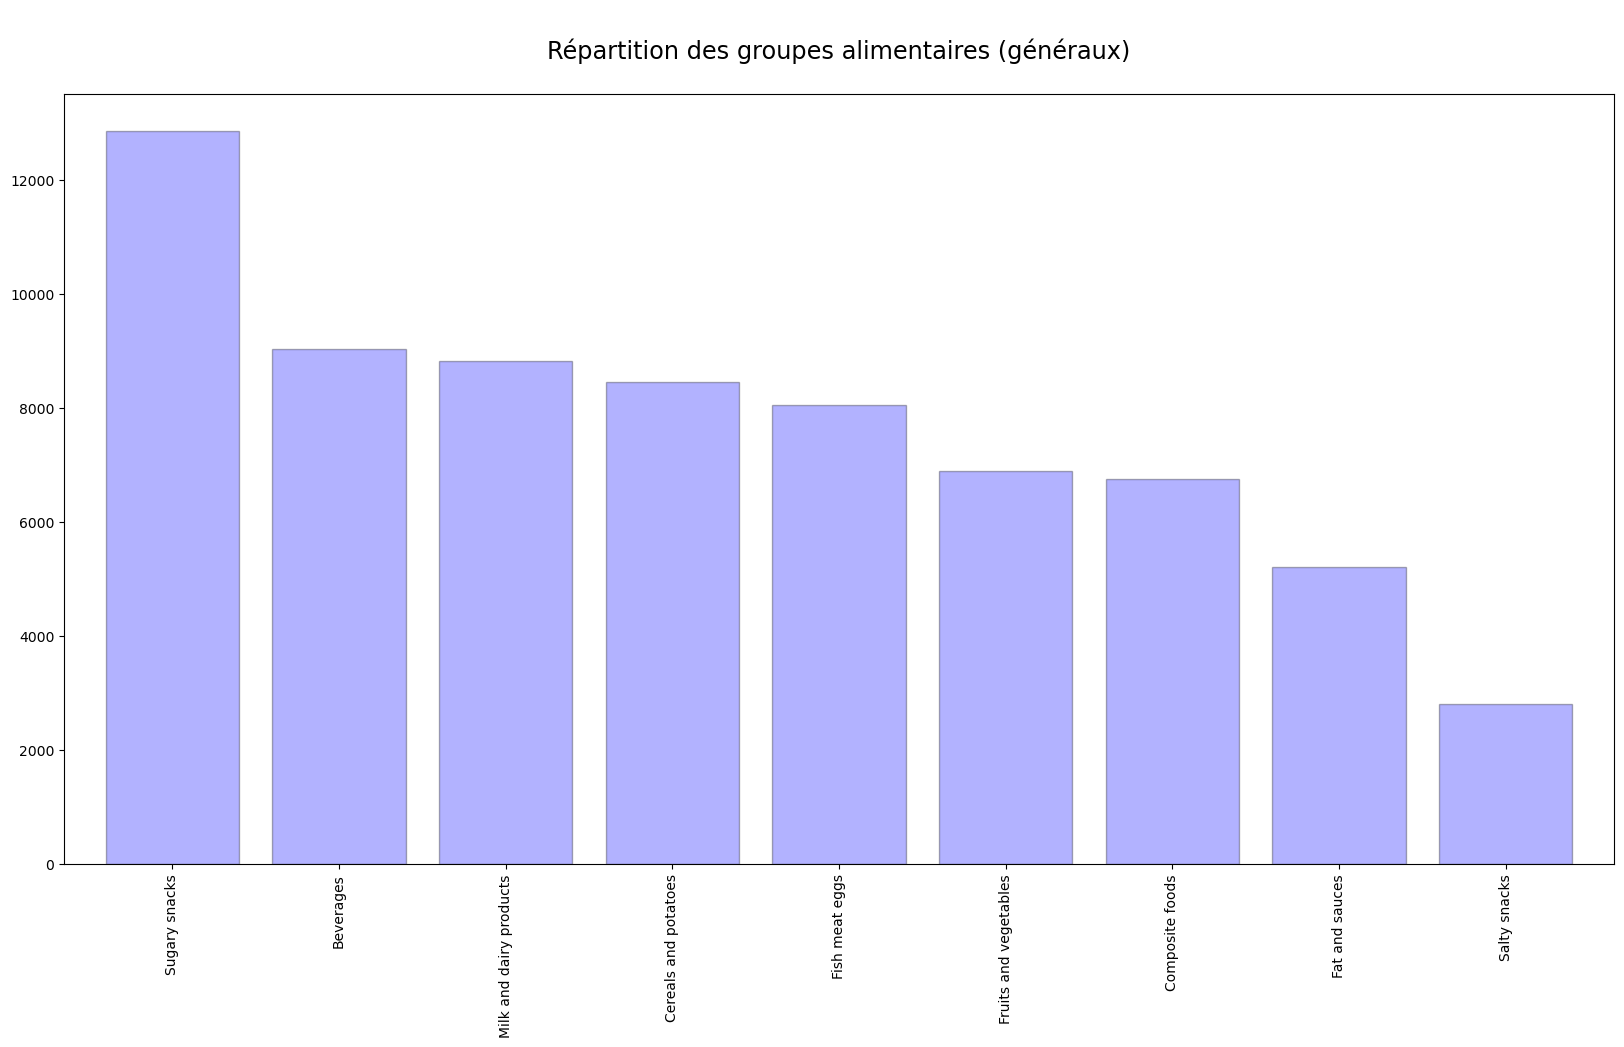

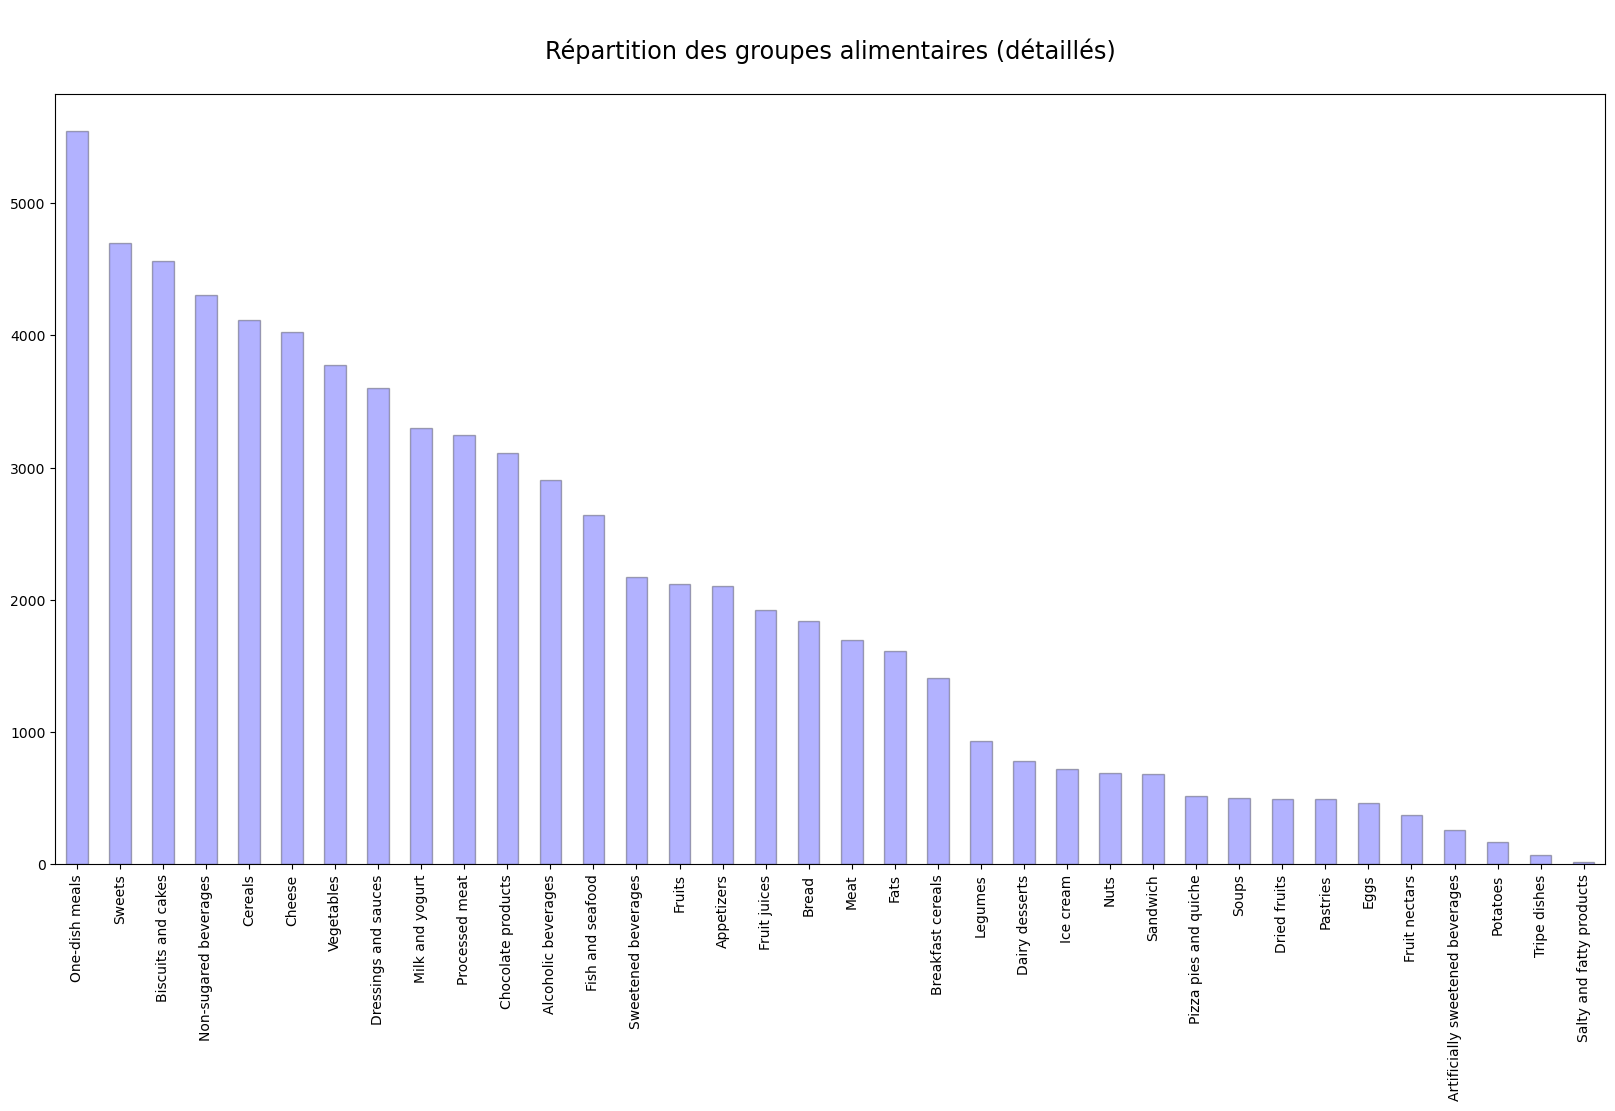

In [35]:
plt.figure(figsize=(20,10))
plt.title("\nRépartition des groupes alimentaires (généraux)\n", fontsize='xx-large')
data_clean.groupby(['pnns_groups_1'])['code'].count().sort_values(ascending=False).plot.bar(color = "blue", alpha = 0.3, edgecolor='black', width=0.8).set(xlabel=None)
plt.show()
plt.figure(figsize=(20,10))
plt.title("\nRépartition des groupes alimentaires (détaillés)\n", fontsize='xx-large')
data_clean.groupby(['pnns_groups_2'])['code'].count().sort_values(ascending=False).plot.bar(color = "blue", alpha = 0.3, edgecolor='black').set(xlabel=None)
plt.show()

## Colonnes *nutrition-score-fr_100g* & *nutrition-score-uk_100g*

In [36]:
display(data_clean['nutrition-score-fr_100g'].describe())
display(data_clean['nutrition-score-uk_100g'].describe())

count    221209.000000
mean          9.165518
std           9.055920
min         -15.000000
25%           1.000000
50%          10.000000
75%          16.000000
max          40.000000
Name: nutrition-score-fr_100g, dtype: float64

count    221209.000000
mean          9.058031
std           9.183606
min         -15.000000
25%           1.000000
50%           9.000000
75%          16.000000
max          40.000000
Name: nutrition-score-uk_100g, dtype: float64

**Les valeurs vont bien de -15 à 40, qui sont les bornes du nutriscore.**

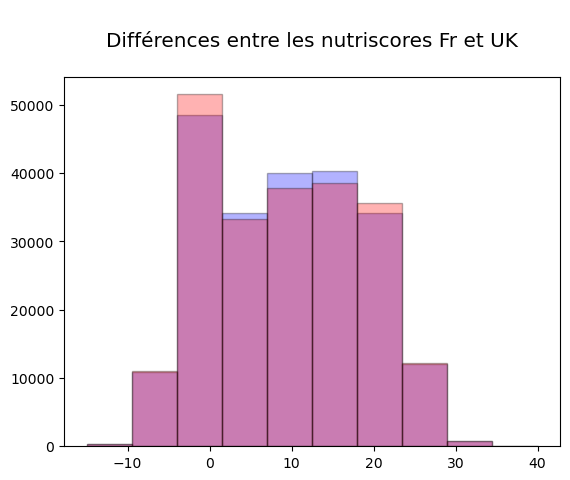

In [37]:
plt.title("\nDifférences entre les nutriscores Fr et UK\n", fontsize='x-large')
data_clean['nutrition-score-fr_100g'].plot.hist(color = "blue", alpha = 0.3, edgecolor='black').set(ylabel=None)
data_clean['nutrition-score-uk_100g'].plot.hist(color = "red", alpha = 0.3, edgecolor='black').set(ylabel=None)
plt.show()

**On observe de légères différences entre les nutriscores Fr et UK.**<br>
**Ces différences ne sont pas étonnantes car le mode de calcul aux UK est légèrement différent. (Cf : [la documentation des variables](https://world.openfoodfacts.org/data/data-fields.txt))**

**Les données de ces deux colonnes semblent bonnes, pas de traitement à faire**

#################### nutrition-score-fr_100g ####################


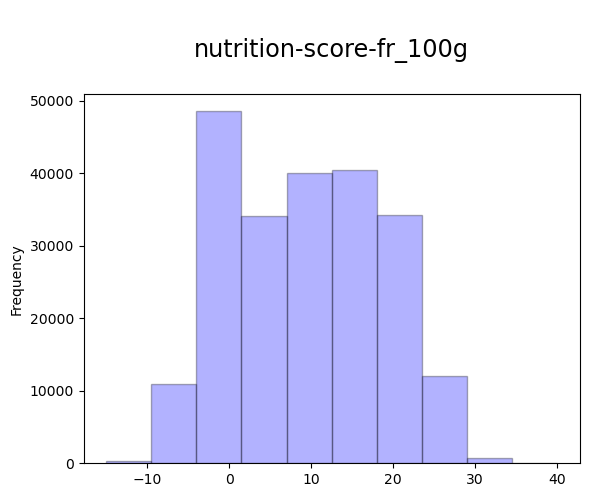

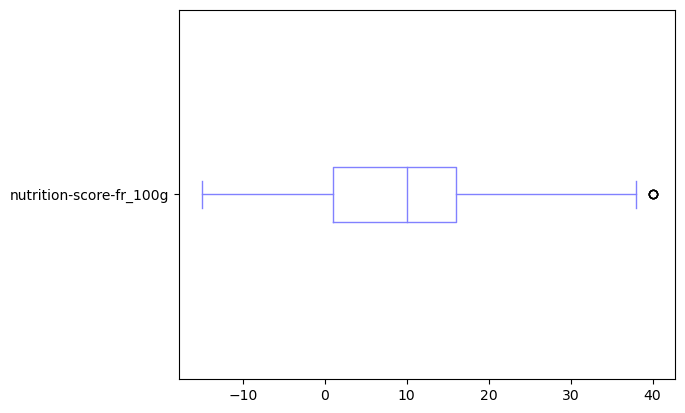

#################### nutrition-score-uk_100g ####################


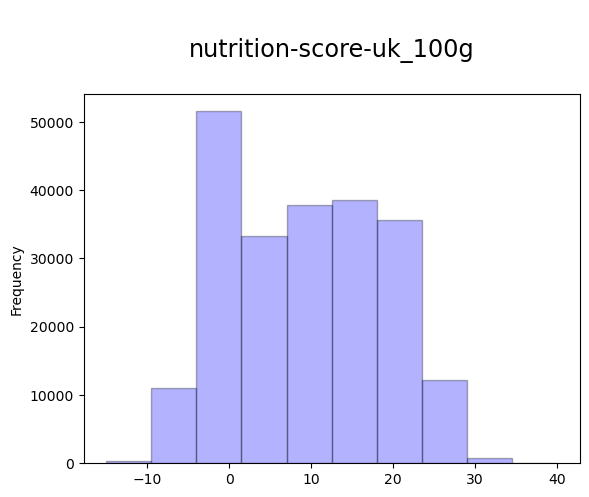

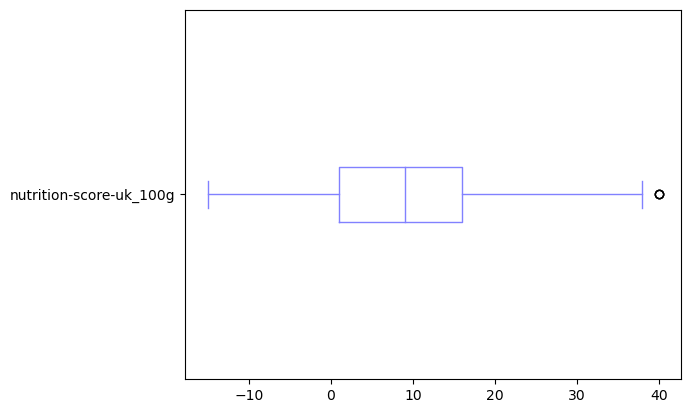

In [38]:
for i in ['nutrition-score-fr_100g', 'nutrition-score-uk_100g']:
    print("#"*20, i, "#"*20)
    plt.title(f"\n{i}\n", fontsize='xx-large')
    data_clean[i].plot.hist(color = "blue", alpha = 0.3, edgecolor='black');
    plt.show()
    data_clean[i].plot.box(color = "#8181FF", vert=False);
    plt.show()

## Colonne *energy_100g*

count    2.611120e+05
mean     1.141913e+03
std      6.447166e+03
min      0.000000e+00
25%      3.770000e+02
50%      1.100000e+03
75%      1.674000e+03
max      3.251373e+06
Name: energy_100g, dtype: float64

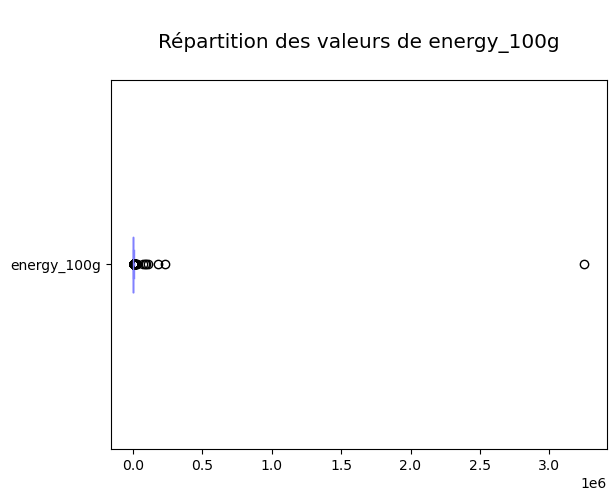

In [39]:
display(data_clean['energy_100g'].describe())

plt.title("\nRépartition des valeurs de energy_100g\n", fontsize='x-large')
data_clean['energy_100g'].plot.box(color = "#8181FF", vert=False);
plt.show()

Il y a dans cette colonne des valeurs très élevées.<br>
Considérons que les valeurs sont en kJ (l'unité qui donne des valeurs les plus élevées)<br>
Considérons maintenant l'aliment le plus énergétique : les lipides purs, à 37 kJ/g, soit 3700 kJ pour 100g (Cf [Wikipédia](https://fr.wikipedia.org/wiki/Valeur_%C3%A9nerg%C3%A9tique))<br>
On peut alors déduire que toutes les valeurs supérieures à 3700 sont aberrantes.

count    2.611120e+05
mean     1.141913e+03
std      6.447166e+03
min      0.000000e+00
25%      3.770000e+02
50%      1.100000e+03
75%      1.674000e+03
max      3.251373e+06
Name: energy_100g, dtype: float64

Valeurs nulles avant traitement : 59636


count    260479.000000
mean       1118.746671
std         788.271231
min           0.000000
25%         373.000000
50%        1098.000000
75%        1674.000000
max        3700.000000
Name: energy_100g, dtype: float64

Valeurs nulles après traitement : 60269


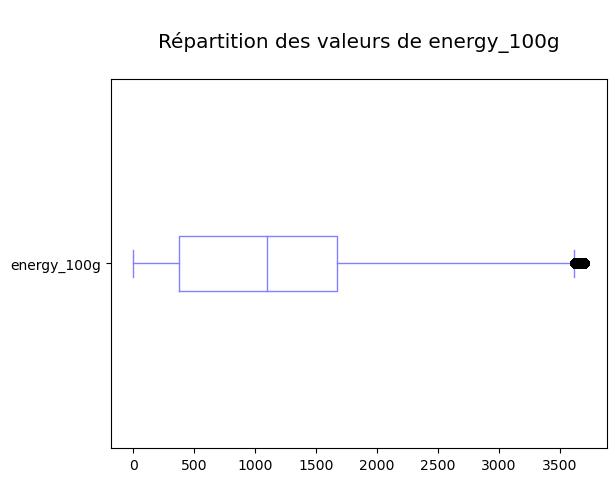

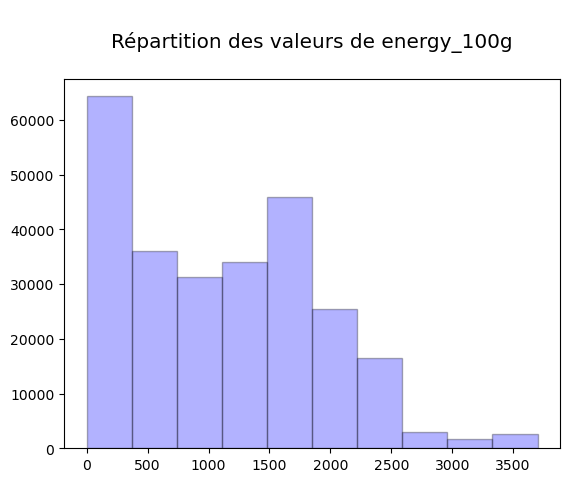

In [40]:
display(data_clean['energy_100g'].describe())
print("Valeurs nulles avant traitement :", data_clean['energy_100g'].isnull().sum())

# Je supprime toutes les valeurs > 3700, puisque c'est le maximum qu'un aliment peut apporter
data_clean['energy_100g'].loc[data_clean['energy_100g'] > 3700] = np.nan

display(data_clean['energy_100g'].describe())
print("Valeurs nulles après traitement :", data_clean['energy_100g'].isnull().sum())

plt.title("\nRépartition des valeurs de energy_100g\n", fontsize='x-large')
data_clean['energy_100g'].plot.box(color = "#8181FF", vert=False);
plt.show()

plt.title("\nRépartition des valeurs de energy_100g\n", fontsize='x-large')
data_clean['energy_100g'].plot.hist(color = "blue", alpha = 0.3, edgecolor='black').set(ylabel=None);
plt.show()

Comment interpréter ce 2ème pic vers 1500 ? On dirait qu'il apparait à une valeur environ 4x supérieure au premier.<br>
Serait-ce un problème dû au fait qu'une partie des données a été entrée en kCal et non en kJ ? (les deux ont un rapport d'environ 4).<br>
Testons pour chaque catégorie, si le schéma se répète, il y a peut-être un souci : 

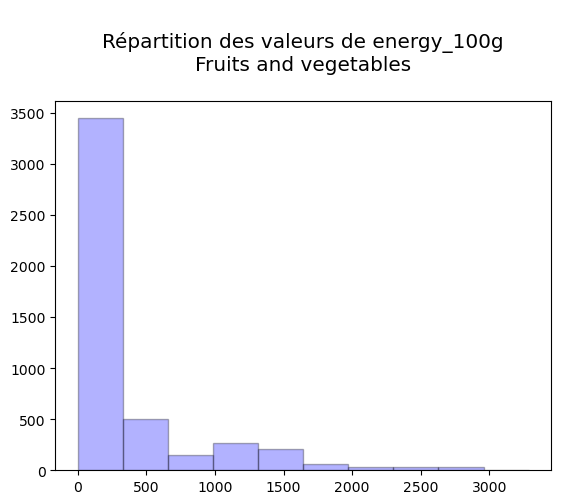

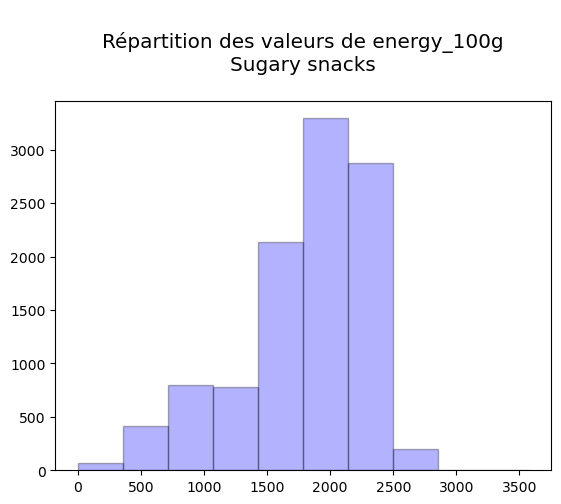

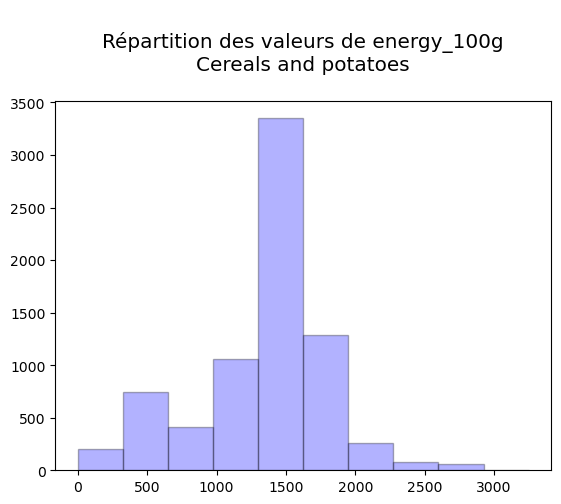

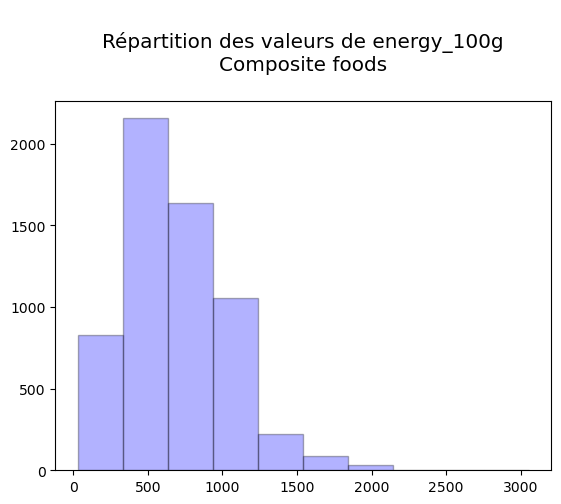

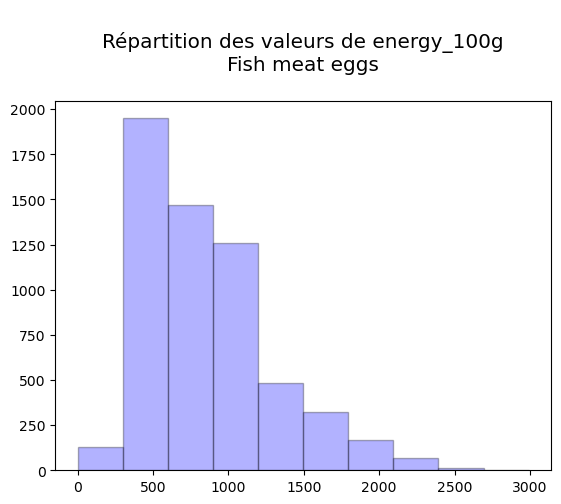

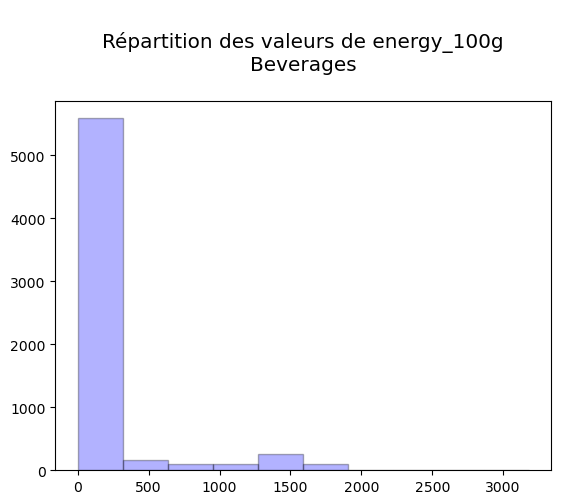

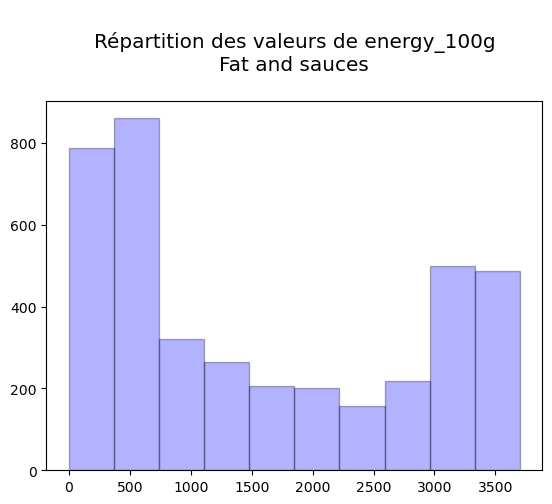

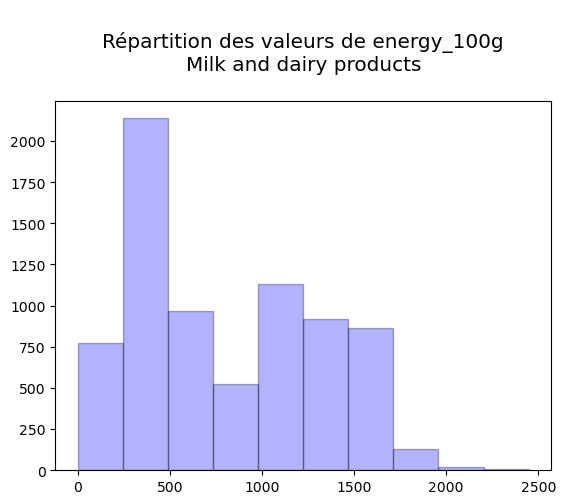

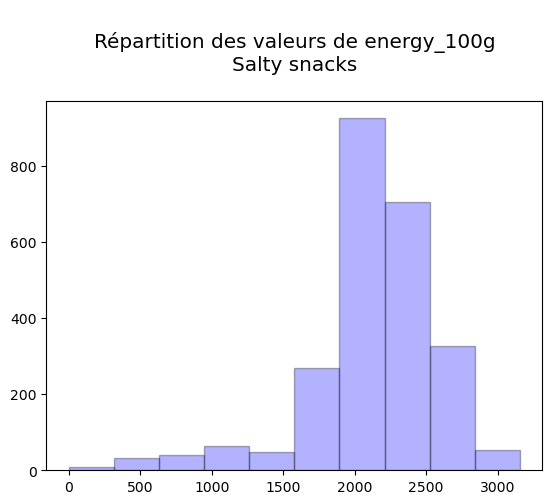

In [41]:
list_nrj = data_clean['pnns_groups_1'].unique().tolist()
list_nrj.pop(0) # Je retire le nan de la liste.
for i in list_nrj:
    plt.title(f"\nRépartition des valeurs de energy_100g\n{i}\n", fontsize='x-large')
    data_clean['energy_100g'].loc[data_clean['pnns_groups_1'] == i].plot.hist(color = "blue", alpha = 0.3, edgecolor='black').set(ylabel=None);
    plt.show()

Ok, il n'y a pas l'air d'avoir de problème majeur.

## Colonnes *allergens* & *traces*

Je les avais exclues du filtre des colonnes vides ou presque du début.<br>
En effet, les aliments contenant des allergènes ne sont pas si fréquents, il n'est pas étonnant d'avoir peu de données.

In [42]:
print("La colonne 'allergens' n'est remplie qu'à", round((1-data_clean['allergens'].isnull().sum()/len(data_clean))*100, 1), "%.")
print("La colonne 'traces' n'est remplie qu'à", round((1-data_clean['traces'].isnull().sum()/len(data_clean))*100, 1), "%.")

La colonne 'allergens' n'est remplie qu'à 8.8 %.
La colonne 'traces' n'est remplie qu'à 7.6 %.


Le contenu de ces deux colonnes est très hétérogènes (grand nombre de mots clefs, langues et structures différentes).<br>
Il sera donc compliqué dans un premier temps d'exploiter ces données.<br>
L'information que l'on peut en tirer pour le moment est : présence ou non d'allergènes/traces, tous types confondus.

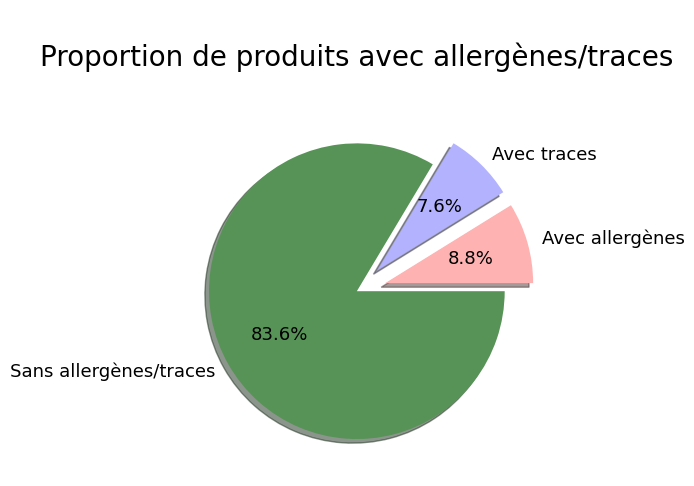

In [43]:
nb_allergens = len(data_clean.loc[data_clean['allergens'].notnull()])
nb_traces = len(data_clean.loc[data_clean['traces'].notnull()])
total_sans_all_tra = len(data_clean) - nb_allergens - nb_traces

labels = 'Avec allergènes', 'Avec traces', 'Sans allergènes/traces'
sizes = [nb_allergens, nb_traces, total_sans_all_tra]

colors=['#FFB2B2', '#B2B2FF', '#579357']
explode = (0.2, 0.2, 0)  # j'explose seulement les allergènes et traces

fig, ax = plt.subplots()
plt.title("\nProportion de produits avec allergènes/traces\n", fontsize=20)
ax.pie(sizes, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%', colors=colors, textprops={'color':"black", 'fontsize':13});
plt.show()

## Imputations des colonnes

### Matrice de corrélation
Avant de débuter les imputations, observons les variables qui présentent une forte corrélation linéaire.

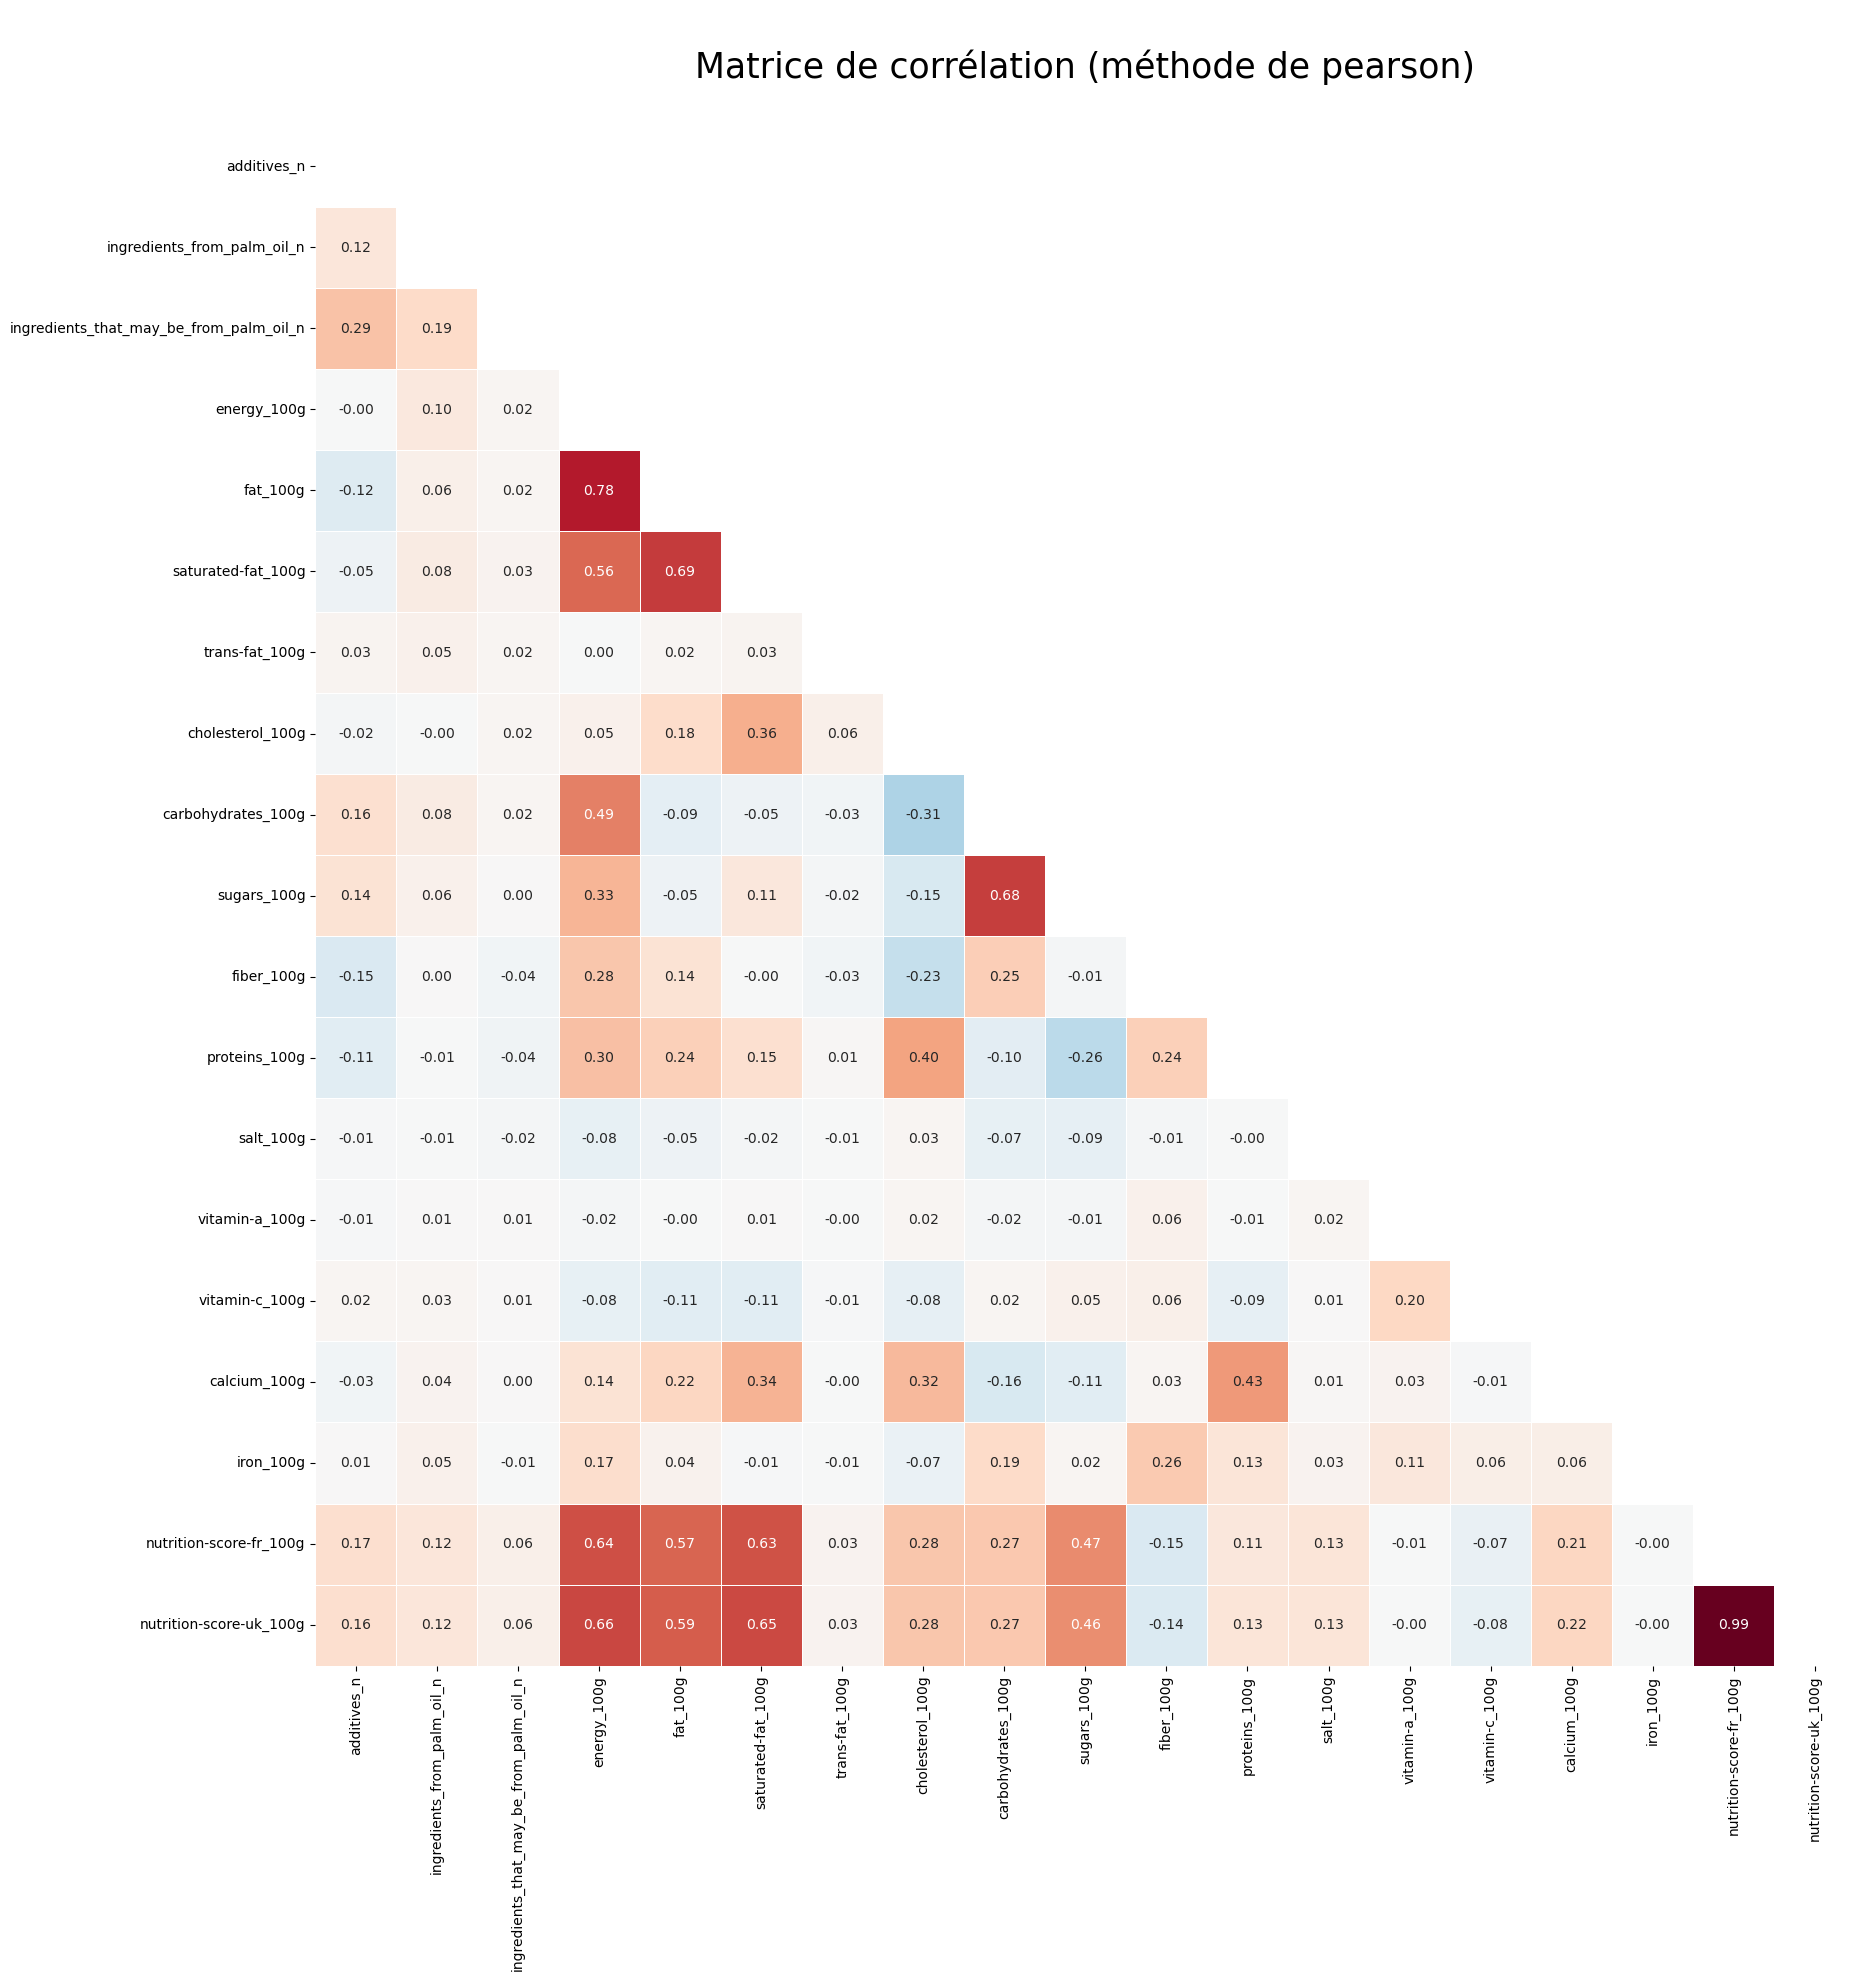

In [44]:
# Je repère les colonnes complètement vides.
colonnes_vides = data_clean.columns[data_clean.nunique() == 0]
# Je les enlèves des colonnes à analyser pour la corrélation
colonnes_pour_corr = [x for x in data_clean.columns if x not in colonnes_vides]

correlation = data_clean[colonnes_pour_corr].corr(numeric_only = True, method="pearson")
mask = np.triu(np.ones_like(correlation, dtype=bool), 0)

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlation, mask=mask, cbar = False, center=0, cmap='RdBu_r', annot=True, annot_kws={"size": 10}, fmt='.2f', square=True, linewidths=0.5).set_title('\nMatrice de corrélation (méthode de pearson)\n', fontsize=25)
plt.show()

## Imputation des colonnes *nutrition-score-fr_100g* & *nutrition-score-uk_100g* : première approche

Bien qu'il y ait de légères différences entre les deux variablesn dû au mode de calcul du nutriscore UK légèrement différent, nous avons vu précédemment que leurs valeurs et distribution sont très similaires.<br>
On voit d'ailleurs dans la matrice de corrélation que les deux variables sont très corrélées.<br>
Commençons par regarder si pour les lignes où la valeur est manquante pour l'une des deux variables, la valeur est présente dans l'autre, permettant de reporter cette valeur pour la variable où elle est manquante : <br>

In [45]:
print("Valeurs manquantes dans 'nutrition-score-fr_100g' :", data_clean['nutrition-score-fr_100g'].isnull().sum())
print("Valeurs manquantes dans 'nutrition-score-uk_100g' :", data_clean['nutrition-score-uk_100g'].isnull().sum())
print("Valeurs présentes dans 'nutrition-score-uk_100g' lorsqu'elle est absente de nutrition-score-fr_100g :", len(data_clean.loc[(data_clean['nutrition-score-fr_100g'].isnull() == True) & (data_clean['nutrition-score-uk_100g'].isnull() == False)]))
print("Valeurs présentes dans 'nutrition-score-fr_100g' lorsqu'elle est absente de nutrition-score-uk_100g :", len(data_clean.loc[(data_clean['nutrition-score-fr_100g'].isnull() == False) & (data_clean['nutrition-score-uk_100g'].isnull() == True)]))

Valeurs manquantes dans 'nutrition-score-fr_100g' : 99539
Valeurs manquantes dans 'nutrition-score-uk_100g' : 99539
Valeurs présentes dans 'nutrition-score-uk_100g' lorsqu'elle est absente de nutrition-score-fr_100g : 0
Valeurs présentes dans 'nutrition-score-fr_100g' lorsqu'elle est absente de nutrition-score-uk_100g : 0


Le cas de figure ne se présente pas, lorsque la valeur est manquante pour une des deux variables, elle l'est toujours pour l'autre.

## Imputation des colonnes *nutrition-score-fr_100g* & *nutrition-score-uk_100g* : deuxième approche

Est-il possible de calculer avec les valeurs dont nous disposons ?<br>
(Modalités de calcul ici [documentation officielle sur Santé Publique France](https://www.santepubliquefrance.fr/media/files/02-determinants-de-sante/nutrition-et-activite-physique/nutri-score/qr-scientifique-technique))<br>
Pour faire ceci, nous avons besoin des variables suivantes (au moins l'une d'elle) : *energy_100g*, *sugars_100g*, *saturated-fat_100g*, *salt_100g* (éléments "négatifs") et *fruits-vegetables-nuts_100g*, *fiber_100g*, *proteins_100g* (éléments "positif")<br>
Il nous faut également obligatoirement le groupe alimentaire (contenu dans *pnns_groups_1*), car le calcul change en fonction de ce dernier.<br>
Premier problème, nous ne disposons pas de *fruits-vegetables-nuts_100g*, colonne qui a été éliminée car quasiment vide.<br>
Outre ce premier problème, essayons de voir si nous avons beaucoup de lignes contenant au moins une variable nécessaire quand le nutriscore est vide : 



In [46]:
print("Valeurs manquantes dans 'nutrition-score-fr_100g' :", data_clean['nutrition-score-fr_100g'].isnull().sum())

condition_fr = (data_clean['nutrition-score-fr_100g'].isnull() == True) & (data_clean['pnns_groups_1'].notnull() == True) & (
(data_clean['energy_100g'].notnull() == True)
|
(data_clean['salt_100g'].notnull() == True)
|
(data_clean['saturated-fat_100g'].notnull() == True)
|
(data_clean['sugars_100g'].notnull() == True)
|
(data_clean['fiber_100g'].notnull() == True)
|
(data_clean['proteins_100g'].notnull() == True)
)

print("Lignes avec nutrition-score-fr_100g vide, pnns_groups_1 renseigné et au moins une variable de calcul :", len(data_clean.loc[condition_fr]))

print("--------------")

print("Valeurs manquantes dans 'nutrition-score-uk_100g' :", data_clean['nutrition-score-uk_100g'].isnull().sum())

condition_uk = (data_clean['nutrition-score-uk_100g'].isnull() == True) & (data_clean['pnns_groups_1'].notnull() == True) & (
(data_clean['energy_100g'].notnull() == True)
|
(data_clean['salt_100g'].notnull() == True)
|
(data_clean['saturated-fat_100g'].notnull() == True)
|
(data_clean['sugars_100g'].notnull() == True)
|
(data_clean['fiber_100g'].notnull() == True)
|
(data_clean['proteins_100g'].notnull() == True)
)

print("Lignes avec nutrition-score-uk_100g vide, pnns_groups_1 renseigné et au moins une variable de calcul :", len(data_clean.loc[condition_uk]))



Valeurs manquantes dans 'nutrition-score-fr_100g' : 99539
Lignes avec nutrition-score-fr_100g vide, pnns_groups_1 renseigné et au moins une variable de calcul : 4852
--------------
Valeurs manquantes dans 'nutrition-score-uk_100g' : 99539
Lignes avec nutrition-score-uk_100g vide, pnns_groups_1 renseigné et au moins une variable de calcul : 4852


Moins de 5% des cas où on pourrait envisager d'essayer de calculer les valeurs manquantes pour les nutriscores : cette deuxième approche n'est pas non plus satisfaisante.<br>
Piste pour l'approche suivante : nous voyons que les nutriscores sont assez corrélés linéairement aux variables *energy_100g*, *fat_100g*, *saturated-fat_100g* et *sugars_100g*.<br>
Nous pourrons donc utiliser *IterativeImputer* de *Scikit-learn* pour imputer les nutriscores. Mais avant de procéder à ceci, nous devons déjà imputer les variables ci-dessus.

## Imputation des colonnes Macronutriments

Soit les macronutriments suivants : *fat_100g*, *saturated-fat_100g*, *carbohydrates_100g*, *sugars_100g*, *fiber_100g*, *proteins_100g*, *salt_100g*.<br>
Regardons d'abbord les lignes pour lesquelles aucunes de ces variables n'est renseignées : 

In [47]:
# Quand il n'y a aucun des macronutriments suivants : fat_100g, saturated-fat_100g, carbohydrates_100g, sugars_100g, fiber_100g, proteins_100g, salt_100g
condition_no_macro = (data_clean['fat_100g'].isnull() == True) & (data_clean['saturated-fat_100g'].isnull() == True) & (data_clean['carbohydrates_100g'].isnull() == True) & (data_clean['sugars_100g'].isnull() == True) & (data_clean['fiber_100g'].isnull() == True) & (data_clean['proteins_100g'].isnull() == True) & (data_clean['salt_100g'].isnull() == True)

display(data_clean.loc[condition_no_macro][['product_name']])


,product_name
0,Farine de blé noir
46,Filet de bœuf
47,Marks % Spencer 2 Blueberry Muffins
48,NaN
136,Twix x2
...,...
320765,Rillette d'oie
320766,NaN
320767,Tomato & ricotta
320769,乐吧泡菜味薯片


Il y en a un grand nombre. S'agit-il de boissons non sucrées de type eau, café, thé, etc ?<br>
Filtrons en enlevant *Non-sugared beverages* de la colonne *pnns_groups_2* : 

In [48]:
data_clean.loc[condition_no_macro][['product_name']].loc[data_clean['pnns_groups_2'] != "Non-sugared beverages"]

,product_name
0,Farine de blé noir
46,Filet de bœuf
47,Marks % Spencer 2 Blueberry Muffins
48,NaN
136,Twix x2
...,...
320765,Rillette d'oie
320766,NaN
320767,Tomato & ricotta
320769,乐吧泡菜味薯片


Il reste encore un grand nombre de ligne concernées, il serait dommage de s'en passer.<br>
Regardons d'abbord les distributions de ces variables.

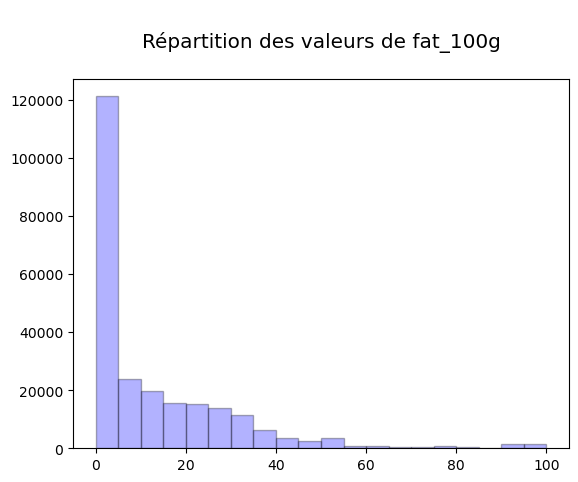

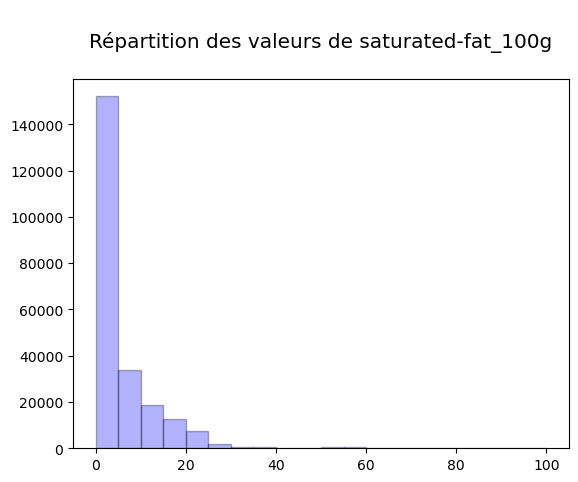

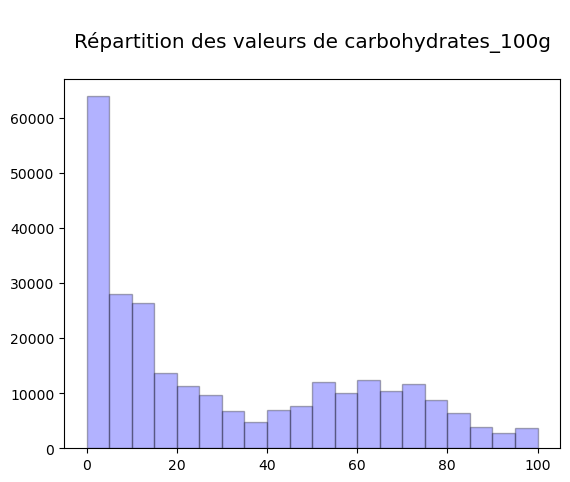

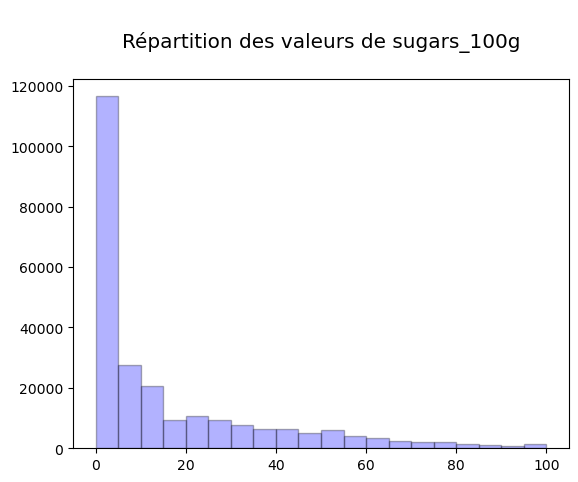

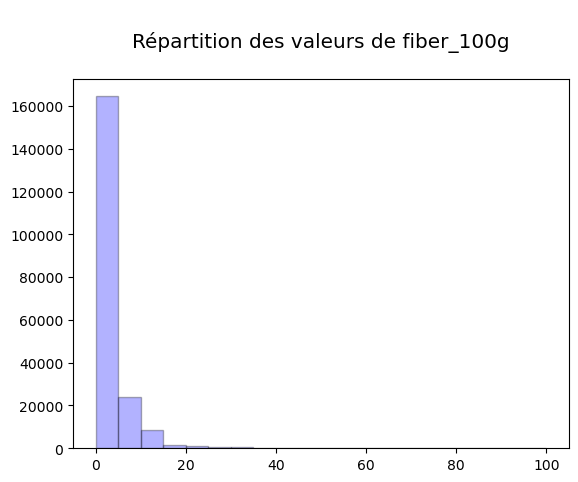

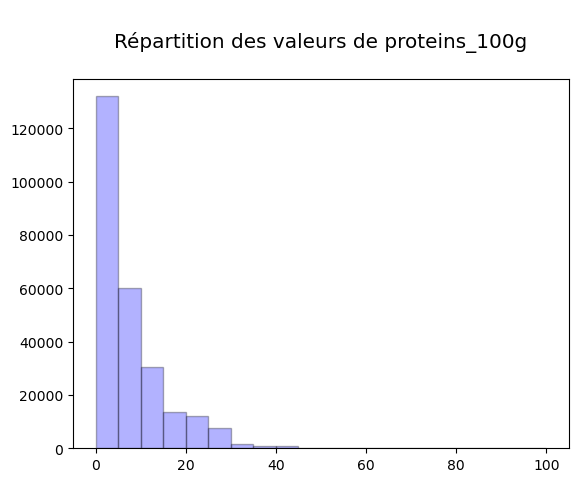

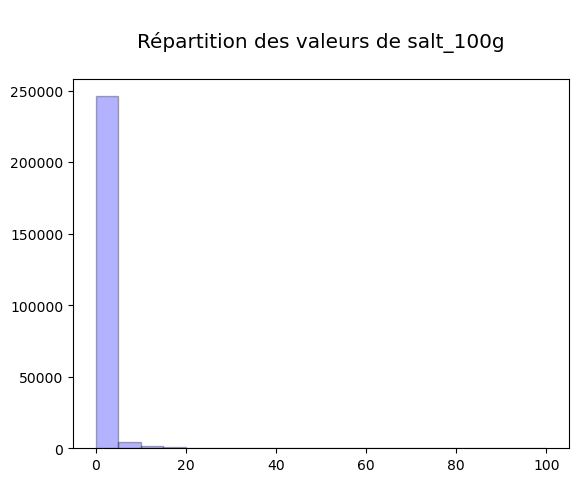

In [49]:
macro_nutriments = [
                    'fat_100g',
                    'saturated-fat_100g',
                    'carbohydrates_100g',
                    'sugars_100g',
                    'fiber_100g',
                    'proteins_100g',
                    'salt_100g'
]


for i in macro_nutriments:
    plt.title(f"\nRépartition des valeurs de {i}\n", fontsize='x-large')
    data_clean[i].plot.hist(color = "blue", alpha = 0.3, edgecolor='black', bins=20).set(ylabel=None);
    plt.show()

Les distributions ne sont pas symétriques, je vais imputer avec la médiane.

In [50]:
macro_nutriments = [
                    'fat_100g',
                    'saturated-fat_100g',
                    'carbohydrates_100g',
                    'sugars_100g',
                    'fiber_100g',
                    'proteins_100g',
                    'salt_100g'
]

condition_no_macro_no_beverages = ((data_clean['fat_100g'].isnull() == True) & (data_clean['saturated-fat_100g'].isnull() == True) & (data_clean['carbohydrates_100g'].isnull() == True) & (data_clean['sugars_100g'].isnull() == True) & (data_clean['fiber_100g'].isnull() == True) & (data_clean['proteins_100g'].isnull() == True) & (data_clean['salt_100g'].isnull() == True) & (data_clean['pnns_groups_2'] != "Non-sugared beverages"))
indices_filtre = data_clean.loc[condition_no_macro_no_beverages].index


for i in macro_nutriments:
    print("Valeurs nulles dans", i, "avant traitement :", data_clean[i].isnull().sum())
    data_clean[i].loc[indices_filtre] = data_clean[i].median()
    print("Valeurs nulles dans", i, "après traitement :", data_clean[i].isnull().sum())
    print("-----------")

Valeurs nulles dans fat_100g avant traitement : 76862
Valeurs nulles dans fat_100g après traitement : 20398
-----------
Valeurs nulles dans saturated-fat_100g avant traitement : 91198
Valeurs nulles dans saturated-fat_100g après traitement : 34734
-----------
Valeurs nulles dans carbohydrates_100g avant traitement : 59602
Valeurs nulles dans carbohydrates_100g après traitement : 3138
-----------
Valeurs nulles dans sugars_100g avant traitement : 75790
Valeurs nulles dans sugars_100g après traitement : 19326
-----------
Valeurs nulles dans fiber_100g avant traitement : 119867
Valeurs nulles dans fiber_100g après traitement : 63403
-----------
Valeurs nulles dans proteins_100g avant traitement : 60846
Valeurs nulles dans proteins_100g après traitement : 4382
-----------
Valeurs nulles dans salt_100g avant traitement : 65397
Valeurs nulles dans salt_100g après traitement : 8933
-----------


Maintenant que ces cas particuliers sont traités, je considère que si une ligne contient une valeur manquante pour un macronutriment, alors qu'au moins un des macronutriment est présent, c'est que la valeur manquante correspond à une absence de ce macronutriment.<br>
Donc je peux imputer cette valeur manquante par 0 : 

In [51]:
macro_nutriments = [
                    'fat_100g',
                    'saturated-fat_100g',
                    'carbohydrates_100g',
                    'sugars_100g',
                    'fiber_100g',
                    'proteins_100g',
                    'salt_100g'
]

for i in macro_nutriments:
    print("Valeurs nulles dans", i, "avant traitement :", data_clean[i].isnull().sum())
    data_clean[i].loc[data_clean[i].isnull() == True] = 0
    print("Valeurs nulles dans", i, "après traitement :", data_clean[i].isnull().sum())
    print("-----------")

Valeurs nulles dans fat_100g avant traitement : 20398
Valeurs nulles dans fat_100g après traitement : 0
-----------
Valeurs nulles dans saturated-fat_100g avant traitement : 34734
Valeurs nulles dans saturated-fat_100g après traitement : 0
-----------
Valeurs nulles dans carbohydrates_100g avant traitement : 3138
Valeurs nulles dans carbohydrates_100g après traitement : 0
-----------
Valeurs nulles dans sugars_100g avant traitement : 19326
Valeurs nulles dans sugars_100g après traitement : 0
-----------
Valeurs nulles dans fiber_100g avant traitement : 63403
Valeurs nulles dans fiber_100g après traitement : 0
-----------
Valeurs nulles dans proteins_100g avant traitement : 4382
Valeurs nulles dans proteins_100g après traitement : 0
-----------
Valeurs nulles dans salt_100g avant traitement : 8933
Valeurs nulles dans salt_100g après traitement : 0
-----------


## Colonne *energy_100g*

Dans un premier temps, je considère le cas ou la valeur de *energy_100g* est absente alors que toutes les valeurs des macronutriments sont également absentes.<br>
Regardons déjà la répartiton de la variable. 

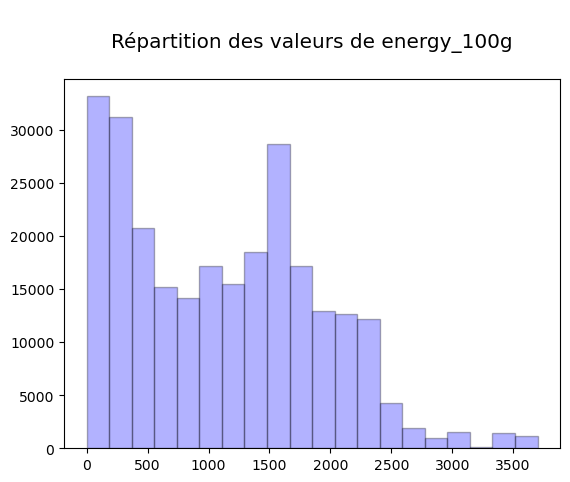

In [52]:
plt.title(f"\nRépartition des valeurs de energy_100g\n", fontsize='x-large')
data_clean['energy_100g'].plot.hist(color = "blue", alpha = 0.3, edgecolor='black', bins=20).set(ylabel=None);
plt.show()

La répartition n'est pas symétrique, je remplace les valeurs concernées par la médiane.

In [53]:
# Je récupère l'index calculé précédemment pour les cas où aucun macronutriments n'étaient renseignés et j'ajoute les cas où energy_100g est NaN
# Je passe par l'index, vu que depuis les macronutriments ont été imputés
indices_filtre_nrj = data_clean.loc[indices_filtre].loc[data_clean['energy_100g'].isnull() == True][['product_name', 'energy_100g']+macro_nutriments].index

print("Valeurs nulles dans 'energy_100g' avant traitement :", data_clean['energy_100g'].isnull().sum())
data_clean['energy_100g'].loc[indices_filtre_nrj] = data_clean['energy_100g'].median()
print("Valeurs nulles dans 'energy_100g' après traitement :", data_clean['energy_100g'].isnull().sum())

Valeurs nulles dans 'energy_100g' avant traitement : 60269
Valeurs nulles dans 'energy_100g' après traitement : 4135


Maintenant que ce cas particulier est traité, je considère que si une ligne contient une valeur manquante dans *energy_100g* alors qu'au moins un des macronutriment est présent, c'est qu'il s'agissait d'un aliment qui ne contient aucune énergie (eau, café, sel, etc).<br>
Donc je peux imputer cette valeur manquante par 0 : 

In [54]:
print("Valeurs nulles dans 'energy_100g' avant traitement :", data_clean['energy_100g'].isnull().sum())
data_clean['energy_100g'].loc[data_clean['energy_100g'].isnull() == True] = 0
print("Valeurs nulles dans 'energy_100g' après traitement :", data_clean['energy_100g'].isnull().sum())

Valeurs nulles dans 'energy_100g' avant traitement : 4135
Valeurs nulles dans 'energy_100g' après traitement : 0


## Imputation des colonnes *nutrition-score-fr_100g* & *nutrition-score-uk_100g* : troisième approche

Maintenant que les macronutriments et *energy_100g* n'ont plus de valeurs manquantes, nous allons pouvoir utiliser *IterativeImputer* de *Scikit-learn* pour imputer les nutriscores.<br>
Nous nous aiderons pour faire ceci des variables *energy_100g*, *fat_100g*, *saturated-fat_100g* et *sugars_100g* qui sont corrélées linéairement aux nutriscores.

### Imputation de la colonne *nutrition-score-fr_100g* : 

In [55]:
# Je crée un dataframe temporaire pour faire les prédictions
df_temp = data_clean[['nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'sugars_100g']]

# Je paramêtre l'argument random_state pour avoir des résultats reproductibles
# Je paramètre max_iter=15 (10 par défaut) pour éviter un message d'erreur
imputer = IterativeImputer(random_state=42, max_iter=15)
imputed = imputer.fit_transform(df_temp)
df_imputed = pd.DataFrame(imputed, columns=df_temp.columns)

print("nutrition-score-fr_100g : ")
print("Valeurs manquantes avant traitement :", data_clean['nutrition-score-fr_100g'].isnull().sum())
data_clean['nutrition-score-fr_100g'] = df_imputed['nutrition-score-fr_100g']
print("Valeurs manquantes après traitement :", data_clean['nutrition-score-fr_100g'].isnull().sum())
print("----------------")
print("nutrition-score-uk_100g : ")
print("Valeurs manquantes avant traitement :", data_clean['nutrition-score-uk_100g'].isnull().sum())
data_clean['nutrition-score-uk_100g'] = df_imputed['nutrition-score-uk_100g']
print("Valeurs manquantes après traitement :", data_clean['nutrition-score-uk_100g'].isnull().sum())



nutrition-score-fr_100g : 
Valeurs manquantes avant traitement : 99539
Valeurs manquantes après traitement : 24
----------------
nutrition-score-uk_100g : 
Valeurs manquantes avant traitement : 99539
Valeurs manquantes après traitement : 24


Il reste quelques valeurs non traitées, je regarde la distribution des deux variables.

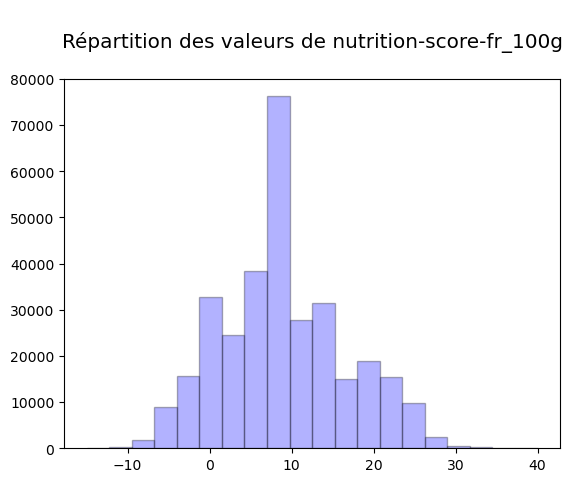

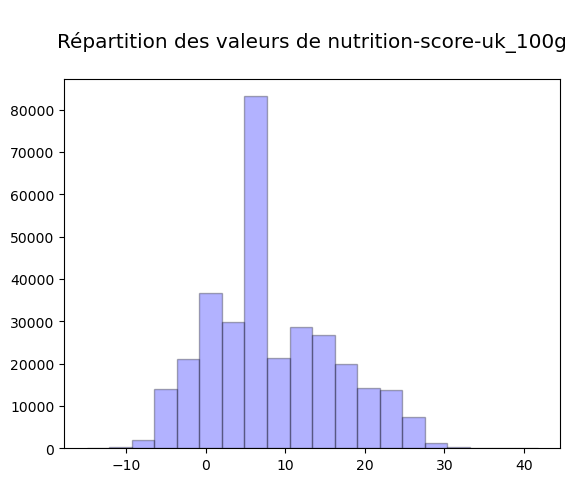

In [56]:
for i in ['nutrition-score-fr_100g', 'nutrition-score-uk_100g']:
    plt.title(f"\nRépartition des valeurs de {i}\n", fontsize='x-large')
    data_clean[i].plot.hist(color = "blue", alpha = 0.3, edgecolor='black', bins=20).set(ylabel=None);
    plt.show()

C'est à peu près symétrique, je vais les imputer avec la moyenne.

In [57]:
print("Valeurs nulles dans 'nutrition-score-fr_100g' avant traitement :", data_clean['nutrition-score-fr_100g'].isnull().sum())
data_clean['nutrition-score-fr_100g'].loc[data_clean['nutrition-score-fr_100g'].isnull() == True] = data_clean['nutrition-score-fr_100g'].mean()
print("Valeurs nulles dans 'nutrition-score-fr_100g' après traitement :", data_clean['nutrition-score-fr_100g'].isnull().sum())
print("----------------")
print("Valeurs nulles dans 'nutrition-score-uk_100g' avant traitement :", data_clean['nutrition-score-uk_100g'].isnull().sum())
data_clean['nutrition-score-uk_100g'].loc[data_clean['nutrition-score-uk_100g'].isnull() == True] = data_clean['nutrition-score-uk_100g'].mean()
print("Valeurs nulles dans 'nutrition-score-uk_100g' après traitement :", data_clean['nutrition-score-uk_100g'].isnull().sum())

Valeurs nulles dans 'nutrition-score-fr_100g' avant traitement : 24
Valeurs nulles dans 'nutrition-score-fr_100g' après traitement : 0
----------------
Valeurs nulles dans 'nutrition-score-uk_100g' avant traitement : 24
Valeurs nulles dans 'nutrition-score-uk_100g' après traitement : 0


Contrôlons les valeurs : 

In [58]:
print("###### Contrôle ######\n")
print("nutrition-score-fr_100g : ")
display(data_clean['nutrition-score-fr_100g'].describe())
print("----------------\n")
print("nutrition-score-uk_100g : ")
data_clean['nutrition-score-uk_100g'].describe()

###### Contrôle ######

nutrition-score-fr_100g : 


count    320748.000000
mean          8.580628
std           7.717651
min         -15.000000
25%           4.000000
50%           7.025965
75%          14.000000
max          40.000000
Name: nutrition-score-fr_100g, dtype: float64

----------------

nutrition-score-uk_100g : 


count    320748.000000
mean          8.420108
std           7.861207
min         -15.000000
25%           3.000000
50%           6.797281
75%          14.000000
max          41.730697
Name: nutrition-score-uk_100g, dtype: float64

On voit que la valeur max dépasse légèrement la limite de 40 pour *nutrition-score-uk_100g*.<br>
Je vais reborner à -15/40 pour les deux variables (au cas où les autres limites seraient dépassées avec de nouvelles entrées).<br>

In [59]:
data_clean['nutrition-score-fr_100g'].loc[data_clean['nutrition-score-fr_100g'] < -15] = -15
data_clean['nutrition-score-fr_100g'].loc[data_clean['nutrition-score-fr_100g'] > 40] = 40
data_clean['nutrition-score-uk_100g'].loc[data_clean['nutrition-score-uk_100g'] < -15] = -15
data_clean['nutrition-score-uk_100g'].loc[data_clean['nutrition-score-uk_100g'] > 40] = 40


print("###### Contrôle après rebornage ######\n")
print("nutrition-score-fr_100g : ")
display(data_clean['nutrition-score-fr_100g'].describe())
print("----------------\n")
print("nutrition-score-uk_100g : ")
data_clean['nutrition-score-uk_100g'].describe()

###### Contrôle après rebornage ######

nutrition-score-fr_100g : 


count    320748.000000
mean          8.580628
std           7.717651
min         -15.000000
25%           4.000000
50%           7.025965
75%          14.000000
max          40.000000
Name: nutrition-score-fr_100g, dtype: float64

----------------

nutrition-score-uk_100g : 


count    320748.000000
mean          8.420065
std           7.861030
min         -15.000000
25%           3.000000
50%           6.797281
75%          14.000000
max          40.000000
Name: nutrition-score-uk_100g, dtype: float64

## Colonnes *allergens* & *traces*

Les aliments contenant des allergènes/traces ne sont pas si fréquents<br>
Je pars du principe que les valeurs manquantes de ces colonnes correspondent aux cas où l'information n'a pas été renseignée car il n'y avait simplement pas d'allergènes/traces dans l'aliment.<br>
Donc je vais remplacer les NaN par "None".

In [60]:
print("Avant traitement :")
print("Valeurs nulles allergens :", data_clean['allergens'].isnull().sum())
print("Valeurs nulles traces :", data_clean['traces'].isnull().sum())

# Je remplace les NaN par "None"
for i in ['allergens', 'traces']:
    data_clean[i].loc[data_clean[i].isnull()] = "None"

print("Avant traitement :")
print("Valeurs nulles allergens :", data_clean['allergens'].isnull().sum())
print("Valeurs nulles traces :", data_clean['traces'].isnull().sum())

Avant traitement :
Valeurs nulles allergens : 292424
Valeurs nulles traces : 296419
Avant traitement :
Valeurs nulles allergens : 0
Valeurs nulles traces : 0


## Colonne *pays*

Il y a quelques valeurs manquante dans cette colonne, je vais les remplacer par "Unknown"<br>

In [61]:
data_clean['pays'].loc[data_clean['pays'].isnull() == True] = "Unknown"

## Colonne *additives_tags*

On va dans un premier temps vérifier s'il y a des lignes pour lesquelles *additives_tags* est vide alors que *additives_n* (le nombre d'additifs) est renseigné et différent de 0, ce qui voudrait dire qu'il y a des additifs, mais qu'ils ne sont pas précisés.<br>

Ensuite, pour les autres lignes vide, on partira du principe que ça veut dire qu'il n'y en a pas, donc imputation par "None"

In [62]:
print("Nombre de ligne avec 'additives_n' renseigné et différent de 0 alors que 'additives_tags' est vide :", len(data_clean.loc[(data_clean['additives_n'].notnull() == True) & (data_clean['additives_n'] != 0) & (data_clean['additives_tags'].isnull() == True)]))

print("Lignes vides dans 'additives_tags' avant traitement :", len(data_clean.loc[data_clean['additives_tags'].isnull() == True]))
data_clean['additives_tags'].loc[data_clean['additives_tags'].isnull() == True] = "None"
print("Lignes vides dans 'additives_tags' après traitement :", len(data_clean.loc[data_clean['additives_tags'].isnull() == True]))


Nombre de ligne avec 'additives_n' renseigné et différent de 0 alors que 'additives_tags' est vide : 0
Lignes vides dans 'additives_tags' avant traitement : 166069
Lignes vides dans 'additives_tags' après traitement : 0


## Colonne *additives_n*

Je vérifie qu'il n'y a pas de ligne où *additives_n* est vide alors que *additives_tags* est renseigné (et différent de "None").<br>

Pour le reste, je pars du principe que les lignes vides le sont car les produits concernés n'en contiennent pas et que les personnes qui ont fait les entrées n'ont pas jugé utile de préciser "0" : j'impute avec 0.

In [63]:
print("Lignes où 'additives_n' est vide alors que 'additives_tags' est renseigné et différent de 'None' :", len(data_clean.loc[(data_clean['additives_n'].isnull() == True) & (data_clean['additives_tags'].notnull() == True) & (data_clean['additives_tags'] != "None")]))

print("Lignes vides dans 'additives_n' avant traitement :", len(data_clean.loc[data_clean['additives_n'].isnull() == True]))
data_clean['additives_n'].loc[data_clean['additives_n'].isnull() == True] = 0
print("Lignes vides dans 'additives_n' après traitement :", len(data_clean.loc[data_clean['additives_n'].isnull() == True]))


Lignes où 'additives_n' est vide alors que 'additives_tags' est renseigné et différent de 'None' : 0
Lignes vides dans 'additives_n' avant traitement : 71810
Lignes vides dans 'additives_n' après traitement : 0


## Colonnes *ingredients_from_palm_oil_n* & *ingredients_that_may_be_from_palm_oil_n*

Je pars du principe que les lignes vides le sont car les produits concernés n'en contiennent pas et que les personnes qui ont fait les entrées n'ont pas jugé utile de préciser "0" : j'impute avec 0.

In [64]:
print("Lignes vides dans 'ingredients_from_palm_oil_n' avant traitement :", len(data_clean.loc[data_clean['ingredients_from_palm_oil_n'].isnull() == True]))
data_clean['ingredients_from_palm_oil_n'].loc[data_clean['ingredients_from_palm_oil_n'].isnull() == True] = 0
print("Lignes vides dans 'ingredients_from_palm_oil_n' après traitement :", len(data_clean.loc[data_clean['ingredients_from_palm_oil_n'].isnull() == True]))

print("Lignes vides dans 'ingredients_that_may_be_from_palm_oil_n' avant traitement :", len(data_clean.loc[data_clean['ingredients_that_may_be_from_palm_oil_n'].isnull() == True]))
data_clean['ingredients_that_may_be_from_palm_oil_n'].loc[data_clean['ingredients_that_may_be_from_palm_oil_n'].isnull() == True] = 0
print("Lignes vides dans 'ingredients_that_may_be_from_palm_oil_n' après traitement :", len(data_clean.loc[data_clean['ingredients_that_may_be_from_palm_oil_n'].isnull() == True]))

Lignes vides dans 'ingredients_from_palm_oil_n' avant traitement : 71810
Lignes vides dans 'ingredients_from_palm_oil_n' après traitement : 0
Lignes vides dans 'ingredients_that_may_be_from_palm_oil_n' avant traitement : 71810
Lignes vides dans 'ingredients_that_may_be_from_palm_oil_n' après traitement : 0


## Colonnes *nutrition_grade_fr* & *nutrition_grade_uk*

Puisque nous avons imputé les colonnes *nutrition-score-fr_100g* et *nutrition-score-uk_100g*, nous allons pouvoir déterminer les nutrigrades, en suivant la règle ci-dessous : <br>

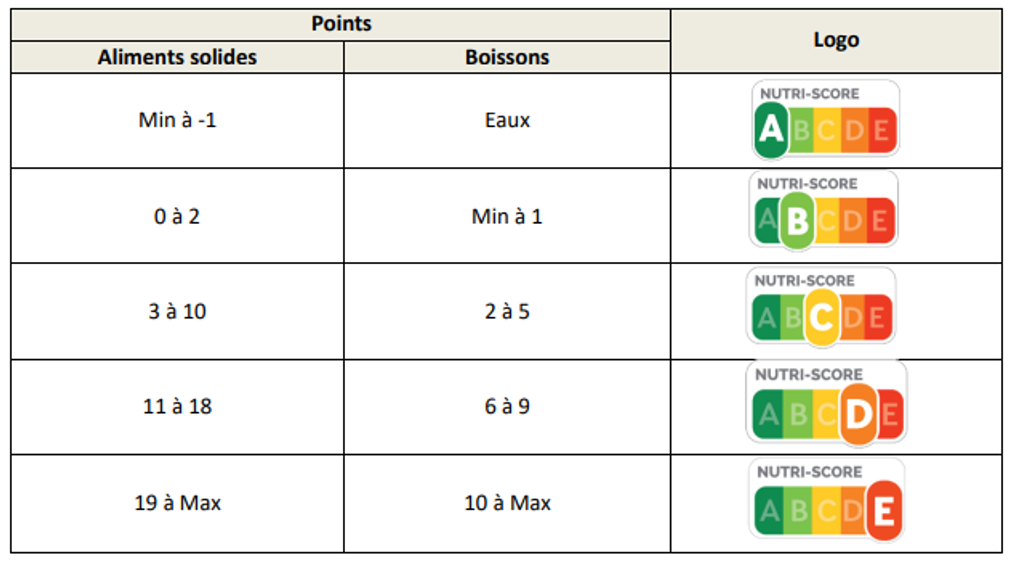

On voit que le facteur "Boisson" est pris en compte. Donc nous calculerons dans un premier temps quand "pnns_groups_1" = "Beverages", même si cela restera imparfait car "pnns_groups_1" a de nombreuses lignes vides.



In [65]:
for grade, score in ['nutrition_grade_fr', 'nutrition-score-fr_100g'], ['nutrition_grade_uk', 'nutrition-score-uk_100g']:

    print("Valeurs nulles dans la colone", grade, "avant traitement :", len(data_clean[grade].loc[data_clean[grade].isnull() == True]))

    ############# Boissons #############

    # On attribue le grade "A" aux lignes nutrition grade qui sont vides, alors que pnns_groups_2 est "Non-sugared beverages" (en considérant qu'il s'agit d'eau), ce n'est pas parfait, mais au final peu de lignes sont concernées
    data_clean[grade].loc[(data_clean[grade].isnull() == True) & (data_clean['pnns_groups_2'] == "Non-sugared beverages")] = "a"
    # On attribue le grade "B" aux lignes nutrition grade qui sont vides, alors que pnns_groups_1 est "Beverages" et que le nutriscore < 2
    data_clean[grade].loc[(data_clean[grade].isnull() == True) & (data_clean['pnns_groups_1'] == "Beverages") & (data_clean[score] < 2)] = "b"
    # On attribue le grade "C" aux lignes nutrition grade qui sont vides, alors que pnns_groups_1 est "Beverages" et que le nutriscore est entre 2 (inclus) et 6
    data_clean[grade].loc[(data_clean[grade].isnull() == True) & (data_clean['pnns_groups_1'] == "Beverages") & (data_clean[score] >= 2) & (data_clean[score] < 6)] = "c"
    # On attribue le grade "D" aux lignes nutrition grade qui sont vides, alors que pnns_groups_1 est "Beverages" et que le nutriscore est entre 6 (inclus) et 10
    data_clean[grade].loc[(data_clean[grade].isnull() == True) & (data_clean['pnns_groups_1'] == "Beverages") & (data_clean[score] >= 6) & (data_clean[score] < 10)] = "d"
    # On attribue le grade "E" aux lignes nutrition grade qui sont vides, alors que pnns_groups_1 est "Beverages" et que le nutriscore est >= 10
    data_clean[grade].loc[(data_clean[grade].isnull() == True) & (data_clean['pnns_groups_1'] == "Beverages") & (data_clean[score] >= 10)] = "e"

    ############# Autres aliments #############
    # Pour les autres aliments, on considère qu'il ne s'agit pas de boisson, et on applique donc la règle classique

    data_clean[grade].loc[(data_clean[grade].isnull() == True) & (data_clean[score] < 0)] = "a"
    data_clean[grade].loc[(data_clean[grade].isnull() == True) & (data_clean[score] >= 0) & (data_clean[score] < 3)] = "b"
    data_clean[grade].loc[(data_clean[grade].isnull() == True) & (data_clean[score] >= 3) & (data_clean[score] < 11)] = "c"
    data_clean[grade].loc[(data_clean[grade].isnull() == True) & (data_clean[score] >= 11) & (data_clean[score] < 19)] = "d"
    data_clean[grade].loc[(data_clean[grade].isnull() == True) & (data_clean[score] >= 19)] = "e"

    print("Valeurs nulles dans la colone", grade, "après traitement :", len(data_clean[grade].loc[data_clean[grade].isnull() == True]))


Valeurs nulles dans la colone nutrition_grade_fr avant traitement : 99539
Valeurs nulles dans la colone nutrition_grade_fr après traitement : 0
Valeurs nulles dans la colone nutrition_grade_uk avant traitement : 320748
Valeurs nulles dans la colone nutrition_grade_uk après traitement : 0


## Colonnes *trans-fat_100g* & *cholesterol_100g* : utilisation de l'algorithme *KNN*

Puisque ces colonnes ne présentent pas de corrélation linéaire significative avec d'autres variables, nous ne pourrons pas utilisser *IterativeImputer*.<br>
On va donc utiliser l'algorithme *KNN*.

In [66]:
print("Avant traitement :")
print("Valeurs nulles dans 'trans-fat_100g' :", data_clean['trans-fat_100g'].isnull().sum())
print("Valeurs nulles dans 'cholesterol_100g' :", data_clean['cholesterol_100g'].isnull().sum())



# Je passerai par un dataset temporaire dédié 'data_knn' qui ne contiendra que les colonnes nécessaires pour le traitement KNN.
# Je détermine ces colonnes dans colonnes_a_garder_pour_knn

colonnes_a_garder_pour_knn = [
# Colonnes qui vont servir de base pour les prédictions :
                            'fat_100g',
                            'saturated-fat_100g',
                            'carbohydrates_100g',
                            'sugars_100g',
                            'fiber_100g',
                            'proteins_100g',
                            'salt_100g',
                            'energy_100g',
                            'nutrition-score-fr_100g',
                            'nutrition-score-uk_100g',
# Colonnes dont on cherche à remplir les valeurs manquantes :
                            'trans-fat_100g',
                            'cholesterol_100g'
]



############## Découpage du dataset en portion de taille 'taille_groupe', sinon le traitement est beaucoup trop long en prenant le dataset entier ##############

longueur = len(data_clean)
taille_groupe = 5000
liste = []
for i in range(0, (longueur-(longueur%taille_groupe)), taille_groupe):
    liste.append([i, i+taille_groupe])
# Si ça ne tombait pas juste en fonction de la taille des tranches, on ajoute la dernière tranche plus petite :
if longueur%taille_groupe != 0:
    liste.append([liste[-1][-1], liste[-1][-1]+longueur%taille_groupe])



############## On va itérer sur les différentes tranches crées précédemment, et à chaque fois on ajoutera le résultat dans 'data_knn_full' ##############

data_knn_full = pd.DataFrame()

for i, j in liste:
    # Création du dataset temporaire 'data_knn' qui ne contiendra que les colonnes nécessaires pour le traitement KNN
    data_knn = data_clean[colonnes_a_garder_pour_knn][i:j]

    # Scaling des données (sinon KNN ne fonctionnera pas correctement)
    scaler = MinMaxScaler()
    data_knn = pd.DataFrame(scaler.fit_transform(data_knn), columns = data_knn.columns)

    # Imputation via KNN
    imputer = KNNImputer(n_neighbors=5)
    data_knn = pd.DataFrame(imputer.fit_transform(data_knn), columns = data_knn.columns)

    # Je "descale" les valeurs pour revenir aux valeurs réelles
    data_knn = pd.DataFrame(scaler.inverse_transform(data_knn), columns = data_knn.columns)

    # J'ajoute le contenu du dataset 'data_knn' pour ce cycle dans 'data_knn_full'
    data_knn_full = pd.concat([data_knn_full, data_knn], axis=0)



############## On impute les colonnes trans-fat_100g' et 'cholesterol_100g' avec les valeurs trouvée par KNN trans-fat_100g', 'cholesterol_100g'

data_clean[['trans-fat_100g', 'cholesterol_100g']] = data_knn_full[['trans-fat_100g', 'cholesterol_100g']].values



print("Après traitement :")
print("Valeurs nulles dans 'trans-fat_100g' :", data_clean['trans-fat_100g'].isnull().sum())
print("Valeurs nulles dans 'cholesterol_100g' :", data_clean['cholesterol_100g'].isnull().sum())


Avant traitement :
Valeurs nulles dans 'trans-fat_100g' : 177450
Valeurs nulles dans 'cholesterol_100g' : 176658
Après traitement :
Valeurs nulles dans 'trans-fat_100g' : 0
Valeurs nulles dans 'cholesterol_100g' : 0


## Cas des variables *vitamin-c_100g*, *vitamin-a_100g*, *calcium_100g* & *iron_100g*

Après tests d'imputation avec modèle KNN et par médiane, les résultats ne semblent pas pertinent.<br>
J'en conclue qu'avec les moyens que j'ai à ma connaissance, il n'est pas possible d'imputer correctement ces variables.<br>
Je les enlève donc du dataset avant de faire l'exploration des données.


In [67]:
colonnes_a_supprimer = [
                        'vitamin-c_100g',
                        'vitamin-a_100g',
                        'calcium_100g',
                        'iron_100g'
                       ]

data_clean = data_clean.drop(columns=colonnes_a_supprimer)


## Cas des colonnes *pnns_groups_1* & *pnns_groups_2*

Bien que ces variables ont pu être utilisées au cours du nettoyage des autres colonnes et procéder à des vérifications, elles ont presque 80% de données manquantes.<br>
Il semble très compliqué de les imputer.<br>
<br>
Perspectives :<br>
- Tester un algorithme type Random Forest pour essayer de déterminer les valeurs manquantes.<br>
- Forcer le renseignement de ces variables au moment de la saisie des données (ex : avec une liste déroulante)<br>

Pour le moment, je supprime ces colonnes du dataset avant de faire l'exploration des données.


In [68]:
colonnes_a_supprimer = [
                        'pnns_groups_1',
                        'pnns_groups_2'
                       ]

data_clean = data_clean.drop(columns=colonnes_a_supprimer)

## Cas des colonnes *product_name*, *brands_tags*, *ingredients_text*, *additives_tags* et *code*

Ces variables avaient été conservées car elles m'ont permis des faires des vérifications au cours du nettoyage.<br>
Je n'en aurai pas besoin pour faire l'exploration des données, je les supprime donc.

In [69]:
colonnes_a_supprimer = [
                        'product_name',
                        'brands_tags',
                        'ingredients_text',
                        'additives_tags',
                        'code'
                       ]

data_clean = data_clean.drop(columns=colonnes_a_supprimer)

## Remplissage du dataset après nettoyage

Ce dataset ne contient aucune valeur manquante.


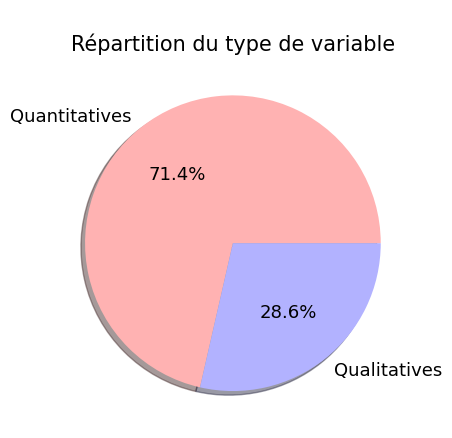

Variables quantitatives : 15
Variables qualitatives : 6
Total des variables : 21


In [70]:
filling_level(dataset=data_clean)

# **Exploration du dataset**

## Les différentes variables du dataset

In [71]:
print("Les différentes variables du dataset sont :\n")
for i in data_clean.columns:
    print("-", i)

Les différentes variables du dataset sont :

- created_datetime
- additives_n
- ingredients_from_palm_oil_n
- ingredients_that_may_be_from_palm_oil_n
- nutrition_grade_uk
- nutrition_grade_fr
- allergens
- traces
- energy_100g
- fat_100g
- saturated-fat_100g
- trans-fat_100g
- cholesterol_100g
- carbohydrates_100g
- sugars_100g
- fiber_100g
- proteins_100g
- salt_100g
- nutrition-score-fr_100g
- nutrition-score-uk_100g
- pays


## Fonction pour résumer les variables numériques

In [72]:
def numeric_summary(discrete=False, discrete_xticks=False, **kwargs):

    if data.empty == True:
        print("Vous devez indiquer une source de donnée valide (variable unique avec double crochets)")
        return

    # Description simple : 
    display(data.describe())

    # Différents indicateurs statistiques : 
    print("Moyenne :", round(float(data.mean().values), 2))
    print("Médiane :", round(float(data.median().values), 2))
    print("Mode(s) :", round(float(data.mode().values), 2))
    print("Variance :", round(float(data.var(ddof=0).values), 2))
    print("Écart type :", round(float(data.std(ddof=0).values), 2))
    print("Skew :", round(float(data.skew().values), 2))
    print("Kurtosis :", round(float(data.kurtosis().values), 2))

    # Histogramme : 

    if discrete == True:
        # Pour faire le même nombre de bins qu'on a de valeurs (discrètes) de la variable
        # np.arange(min, max, pas)
        bins = np.arange(data.values.min(), data.values.max()+1, 1)
        data.hist(color = "blue", alpha = 0.3, edgecolor='black', bins=bins-0.5)
        if discrete_xticks == True:
            plt.xticks(bins)
    else:
        data.hist(color = "blue", alpha = 0.3, edgecolor='black', bins=20)
    
    plt.grid(alpha = 0.8, ls=':')
    plt.title(data.columns[0], fontsize=20)
    plt.show()

    # Boîte à moustaches :
    data.boxplot(vert=False, color = "#8181FF").set(ylabel=None)
    plt.yticks([]) 
    plt.title(data.columns[0], fontsize=20)
    plt.show()

## Variable : *created_datetime*

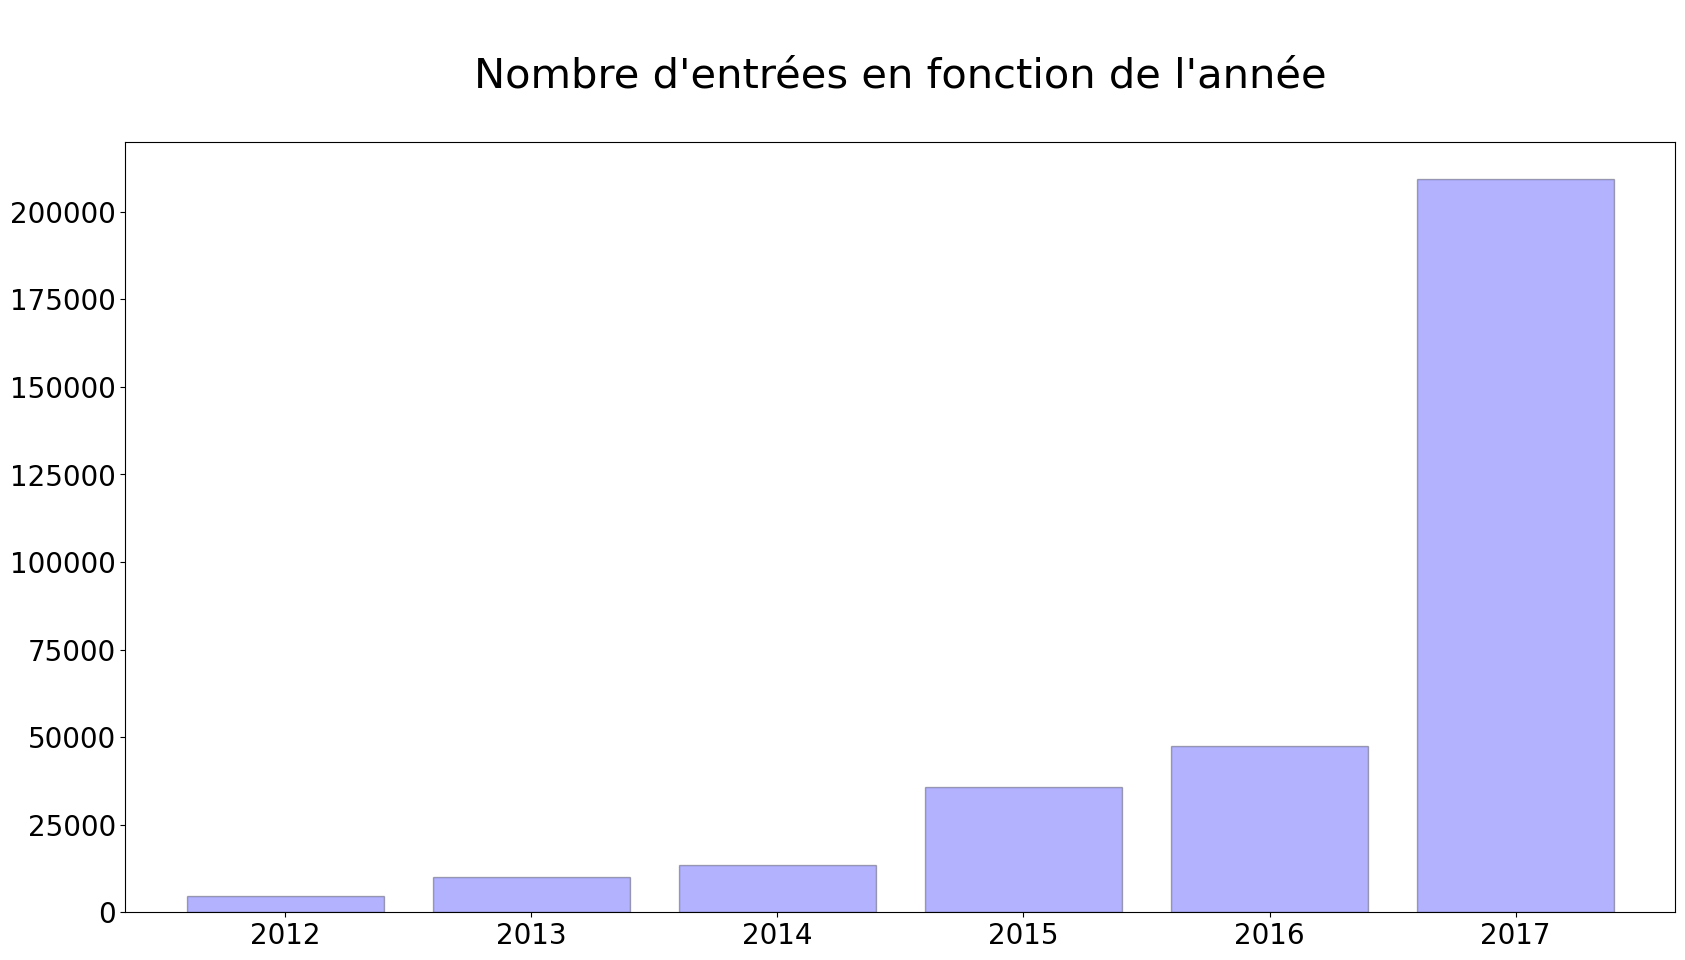

In [73]:
plt.figure(figsize=(20,10))
plt.title("\nNombre d'entrées en fonction de l'année\n", fontsize=30)
data_clean.groupby(data_clean.created_datetime.dt.year)['created_datetime'].count().plot.bar(color = "blue", alpha = 0.3, edgecolor='black', width=0.8).set(xlabel=None)
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.show()



## Variable : *additives_n*

,additives_n
count,320748.0
mean,1.502581
std,2.347312
min,0.0
25%,0.0
50%,0.0
75%,2.0
max,31.0


Moyenne : 1.5
Médiane : 0.0
Mode(s) : 0.0
Variance : 5.51
Écart type : 2.35
Skew : 2.48
Kurtosis : 9.17


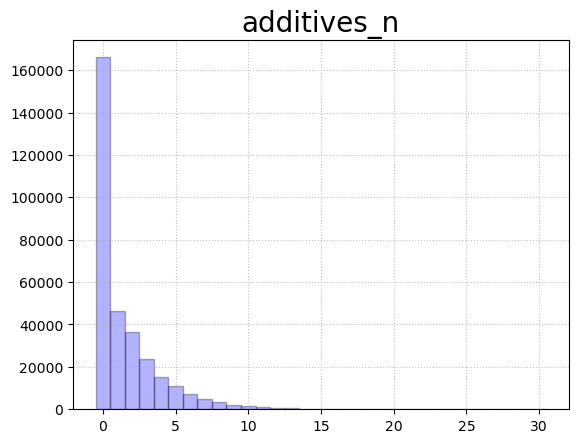

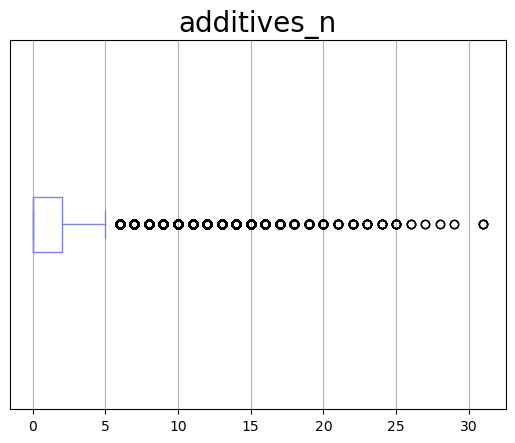

In [74]:
data = data_clean[['additives_n']]

numeric_summary(data=data, discrete=True, discrete_xticks=False)

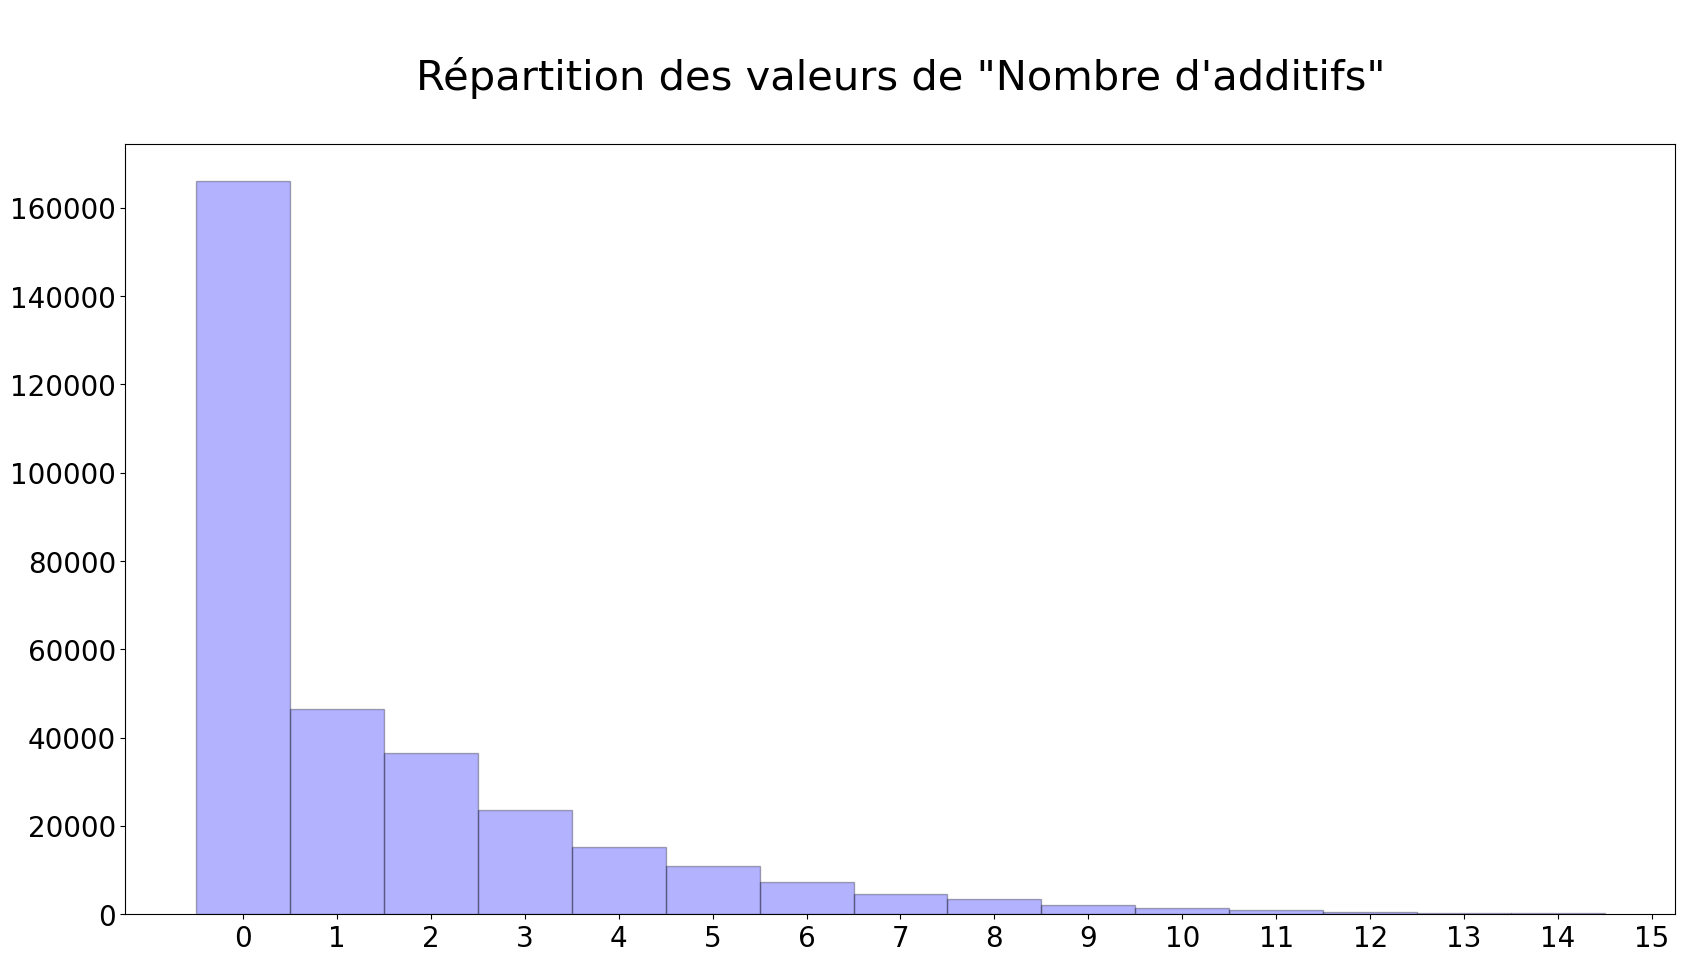

In [75]:
# Je ne prends que les valeurs < 16 car au delà c'est négligeable
data = data_clean.loc[data_clean['additives_n'] < 16]['additives_n']

plt.figure(figsize=(20,10))
plt.title("\nRépartition des valeurs de \"Nombre d'additifs\"\n", fontsize=30)
# Pour faire le même nombre de bins qu'on a de valeurs (discrètes) de 'additives_n'
# np.arange(min, max, pas)
bins = np.arange(data.min(), data.max()+1, 1)
# Pour bien mettre un xtick pour chaque valeur de 'additives_n'
plt.xticks(bins)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# bins=bins-0.5 : le 0.5 c'est pour décaler et placer les labels au milieu des barres
data.plot.hist(color = "blue", alpha = 0.3, edgecolor='black', bins=bins-0.5).set(ylabel=None);
plt.show()


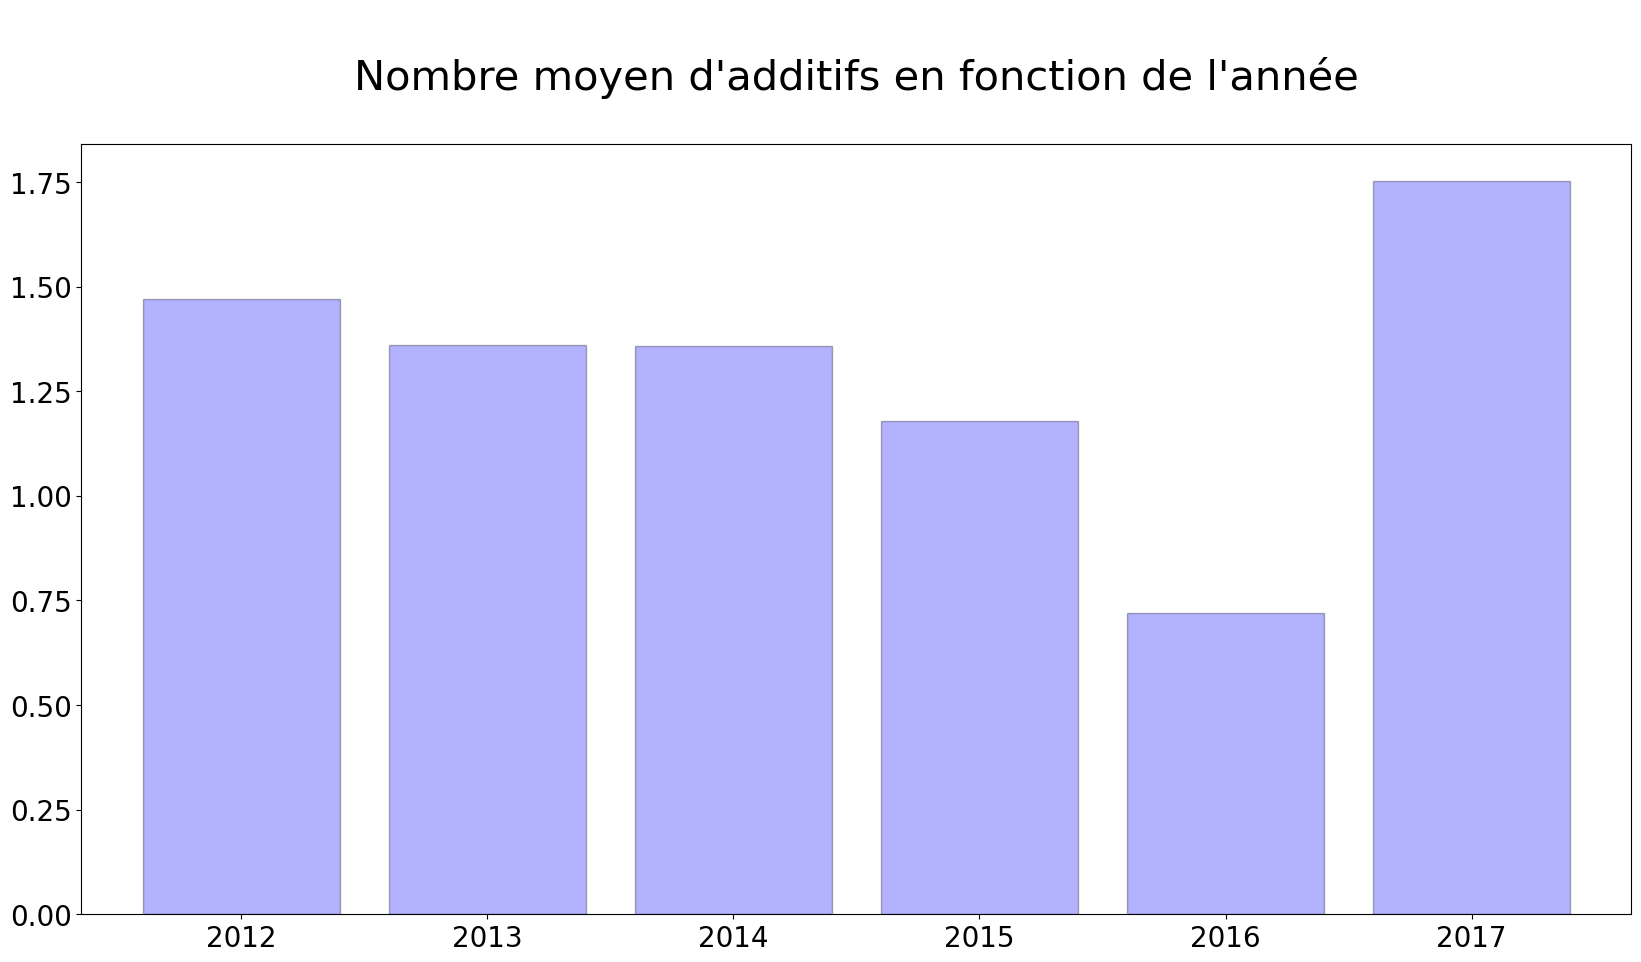

In [76]:
plt.figure(figsize=(20,10))
plt.title("\nNombre moyen d'additifs en fonction de l'année\n", fontsize=30)
data_clean.groupby(data_clean.created_datetime.dt.year)['additives_n'].mean().plot.bar(color = "blue", alpha = 0.3, edgecolor='black', width=0.8).set(xlabel=None);
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.show()

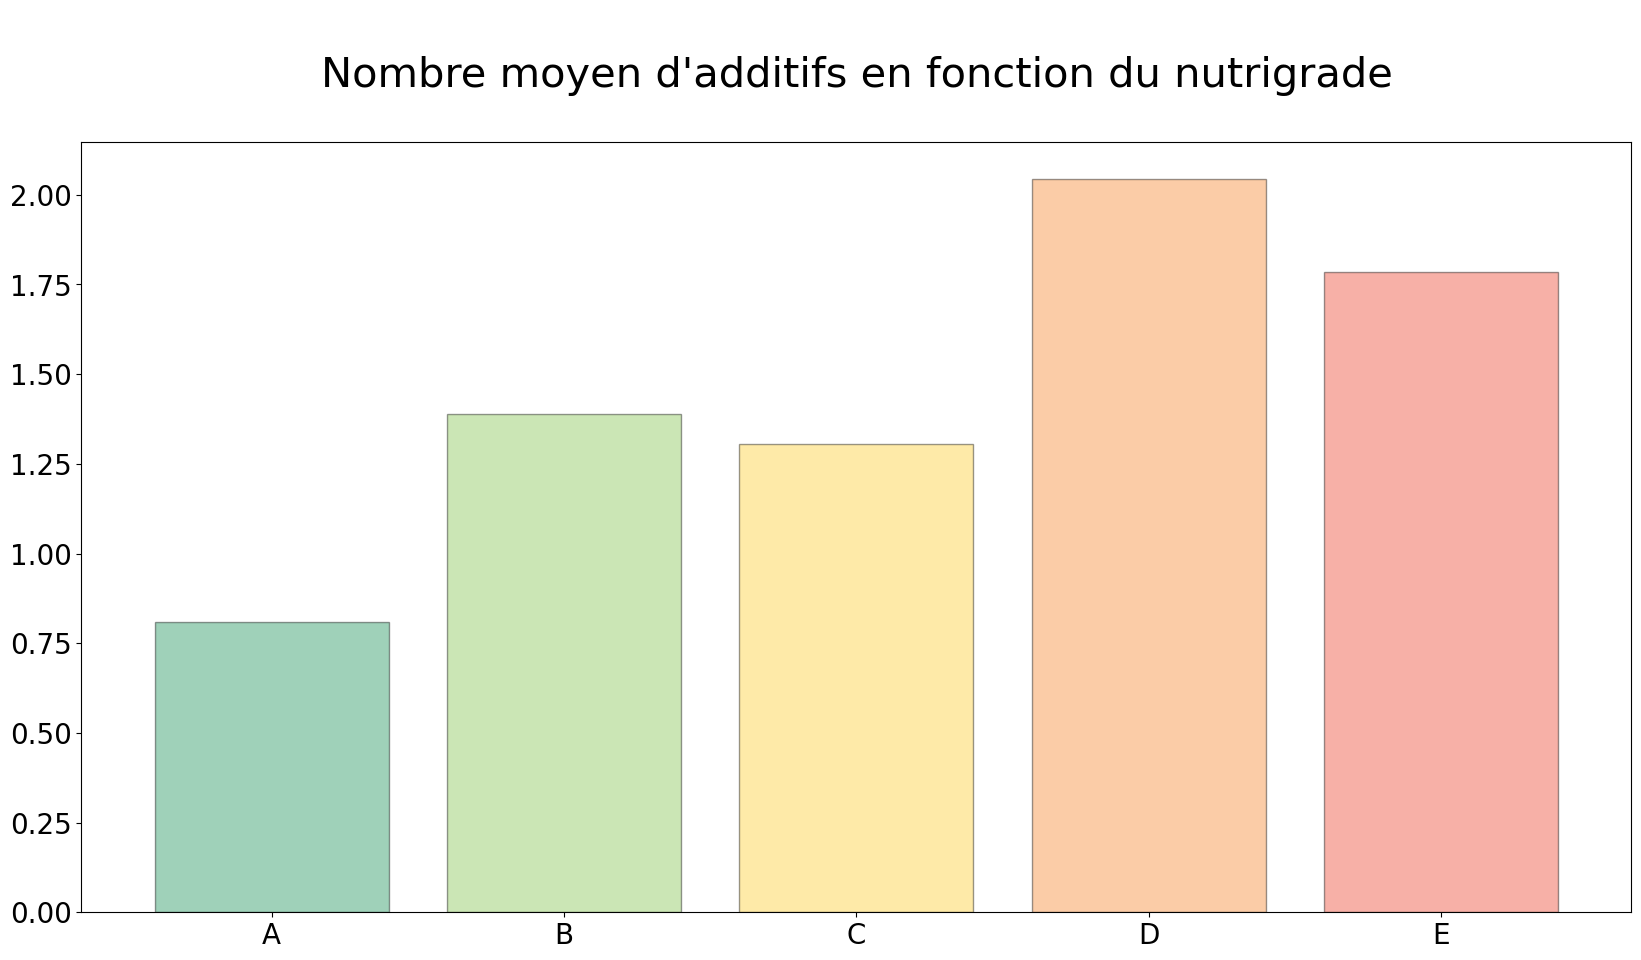

In [77]:
nutrigrade_palette = ['#118D51', '#7EC247', '#FECB27', '#F58024', '#ED3B23']
plt.figure(figsize=(20,10))
data_clean.groupby(data_clean.nutrition_grade_fr.str.capitalize())['additives_n'].mean().plot.bar(color = nutrigrade_palette, alpha = 0.4, edgecolor='black', width=0.8).set(xlabel=None);
plt.title("\nNombre moyen d'additifs en fonction du nutrigrade\n", fontsize=30)
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.show()

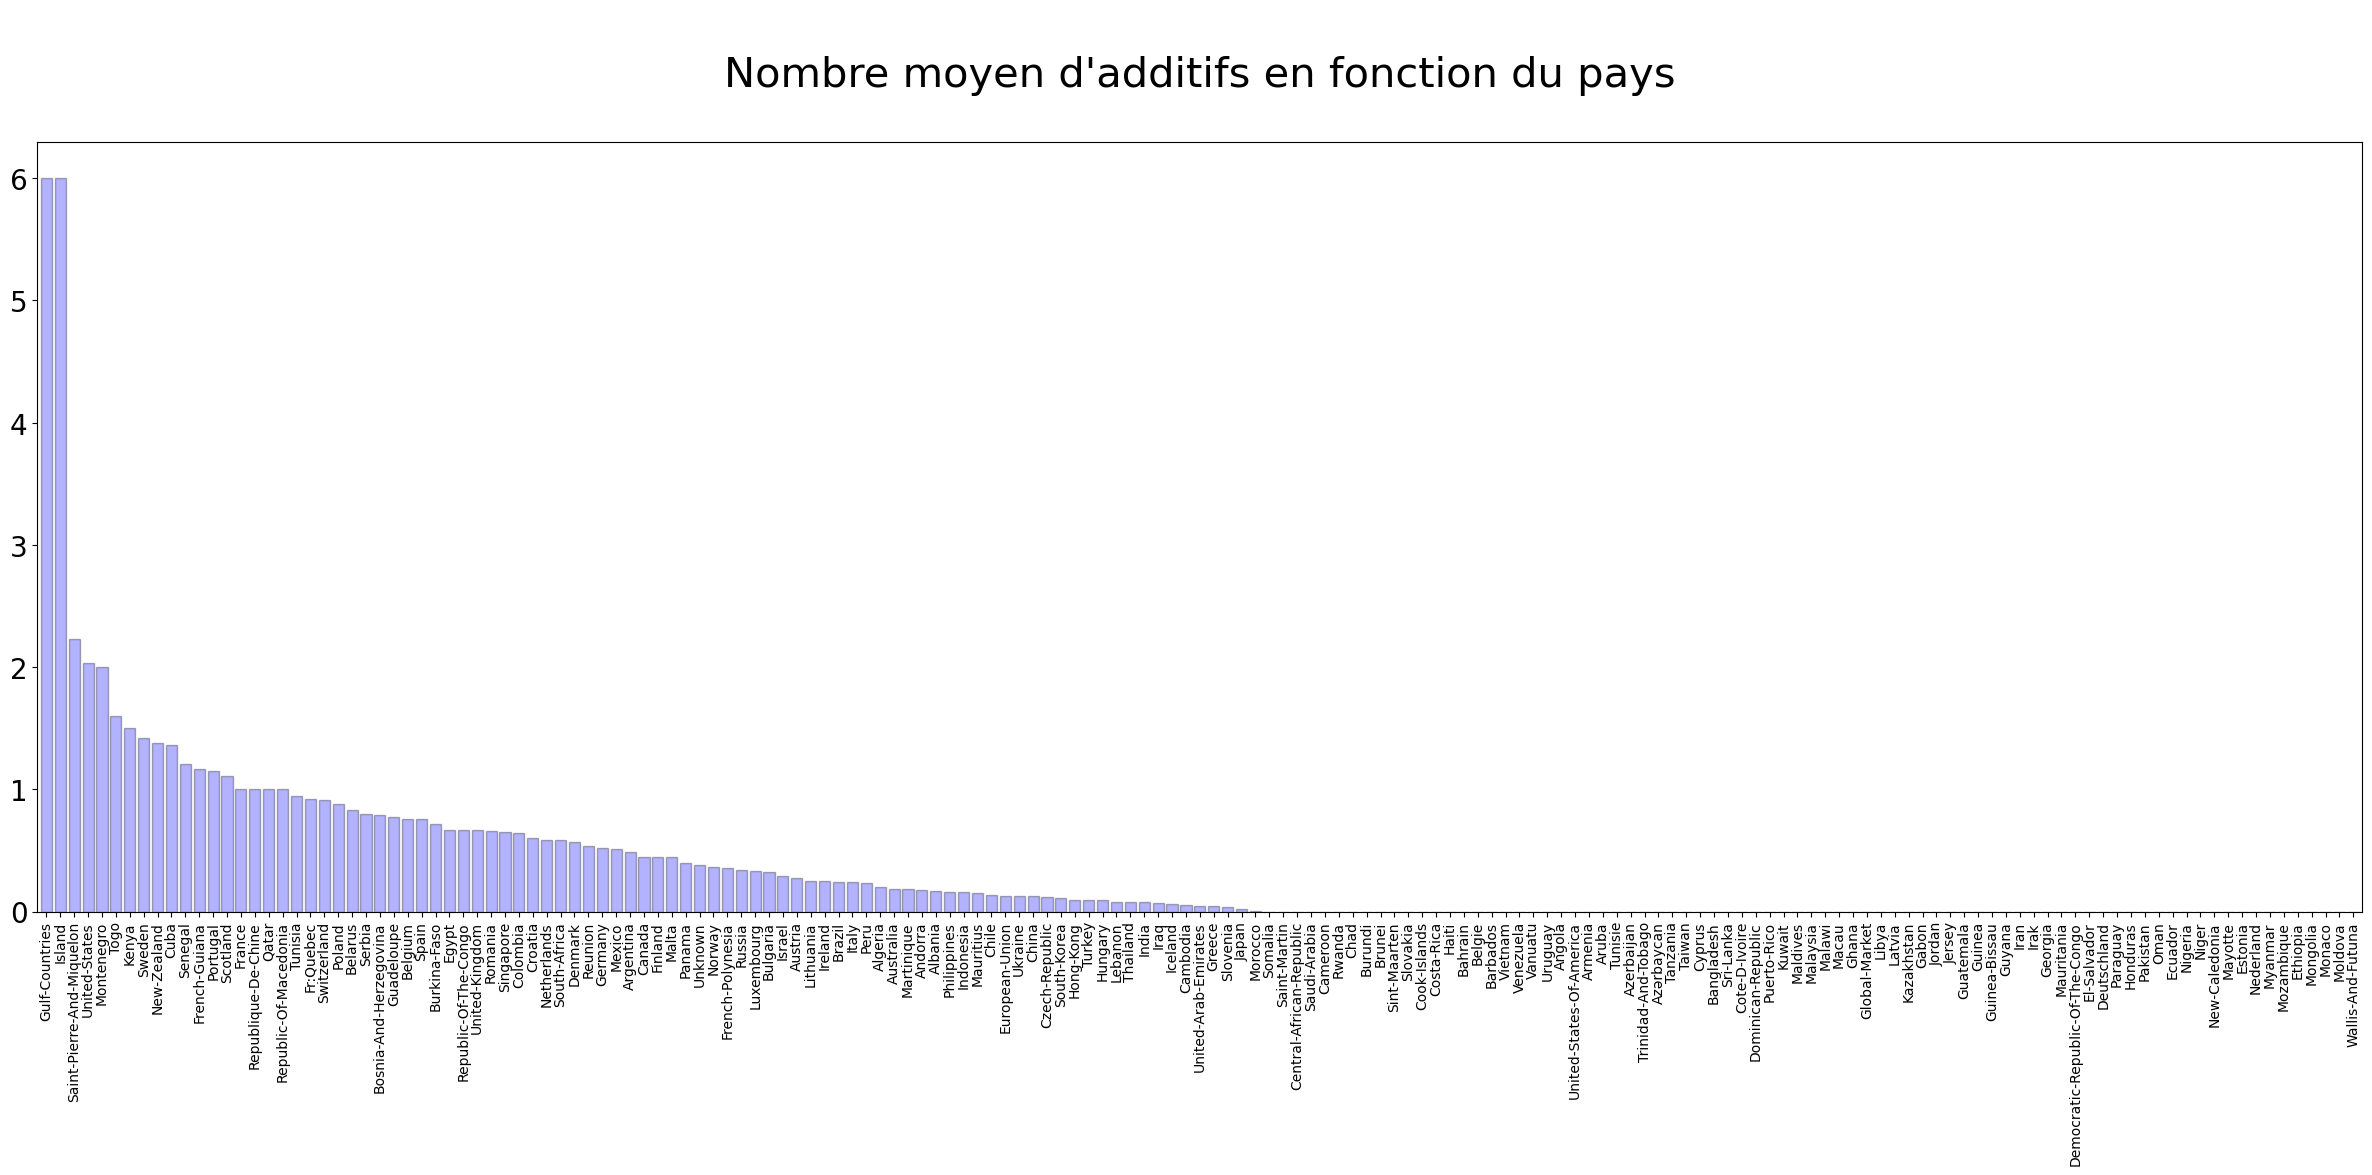

In [78]:
plt.figure(figsize=(30,10))
plt.title("\nNombre moyen d'additifs en fonction du pays\n", fontsize=30)
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
data_clean.groupby(data_clean.pays)['additives_n'].mean().sort_values(ascending=False).plot.bar(color = "blue", alpha = 0.3, edgecolor='black', width=0.8).set(xlabel=None);
plt.show()

## Variables *ingredients_from_palm_oil_n* & *ingredients_that_may_be_from_palm_oil_n*

,ingredients_from_palm_oil_n
count,320748.0
mean,0.015258
std,0.124069
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,2.0


Moyenne : 0.02
Médiane : 0.0
Mode(s) : 0.0
Variance : 0.02
Écart type : 0.12
Skew : 8.2
Kurtosis : 68.14


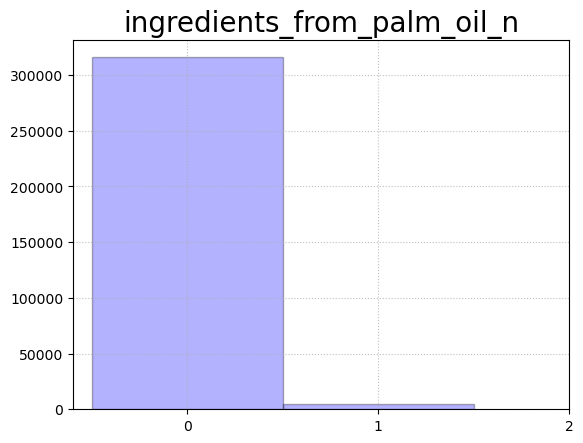

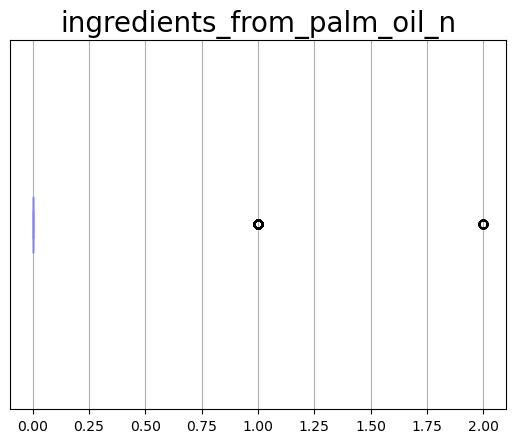

,ingredients_that_may_be_from_palm_oil_n
count,320748.0
mean,0.042878
std,0.238281
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,6.0


Moyenne : 0.04
Médiane : 0.0
Mode(s) : 0.0
Variance : 0.06
Écart type : 0.24
Skew : 6.87
Kurtosis : 60.44


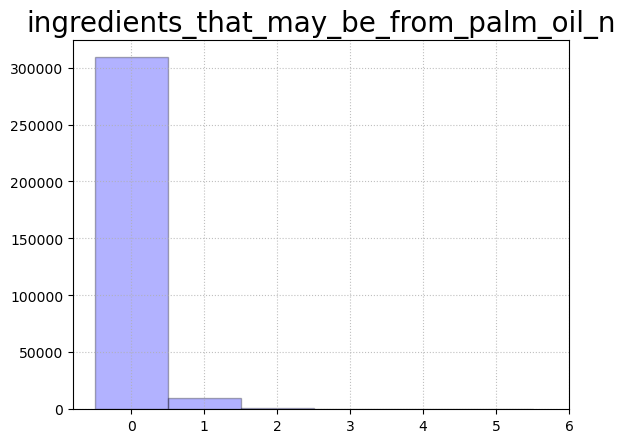

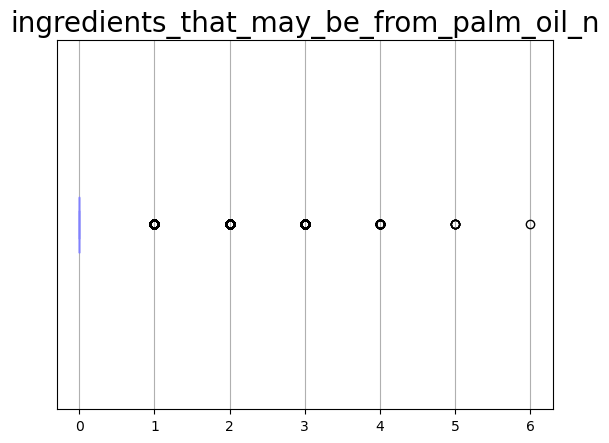

In [79]:
data = data_clean[['ingredients_from_palm_oil_n']]

numeric_summary(data=data, discrete=True, discrete_xticks=True)

data = data_clean[['ingredients_that_may_be_from_palm_oil_n']]

numeric_summary(data=data, discrete=True, discrete_xticks=True)

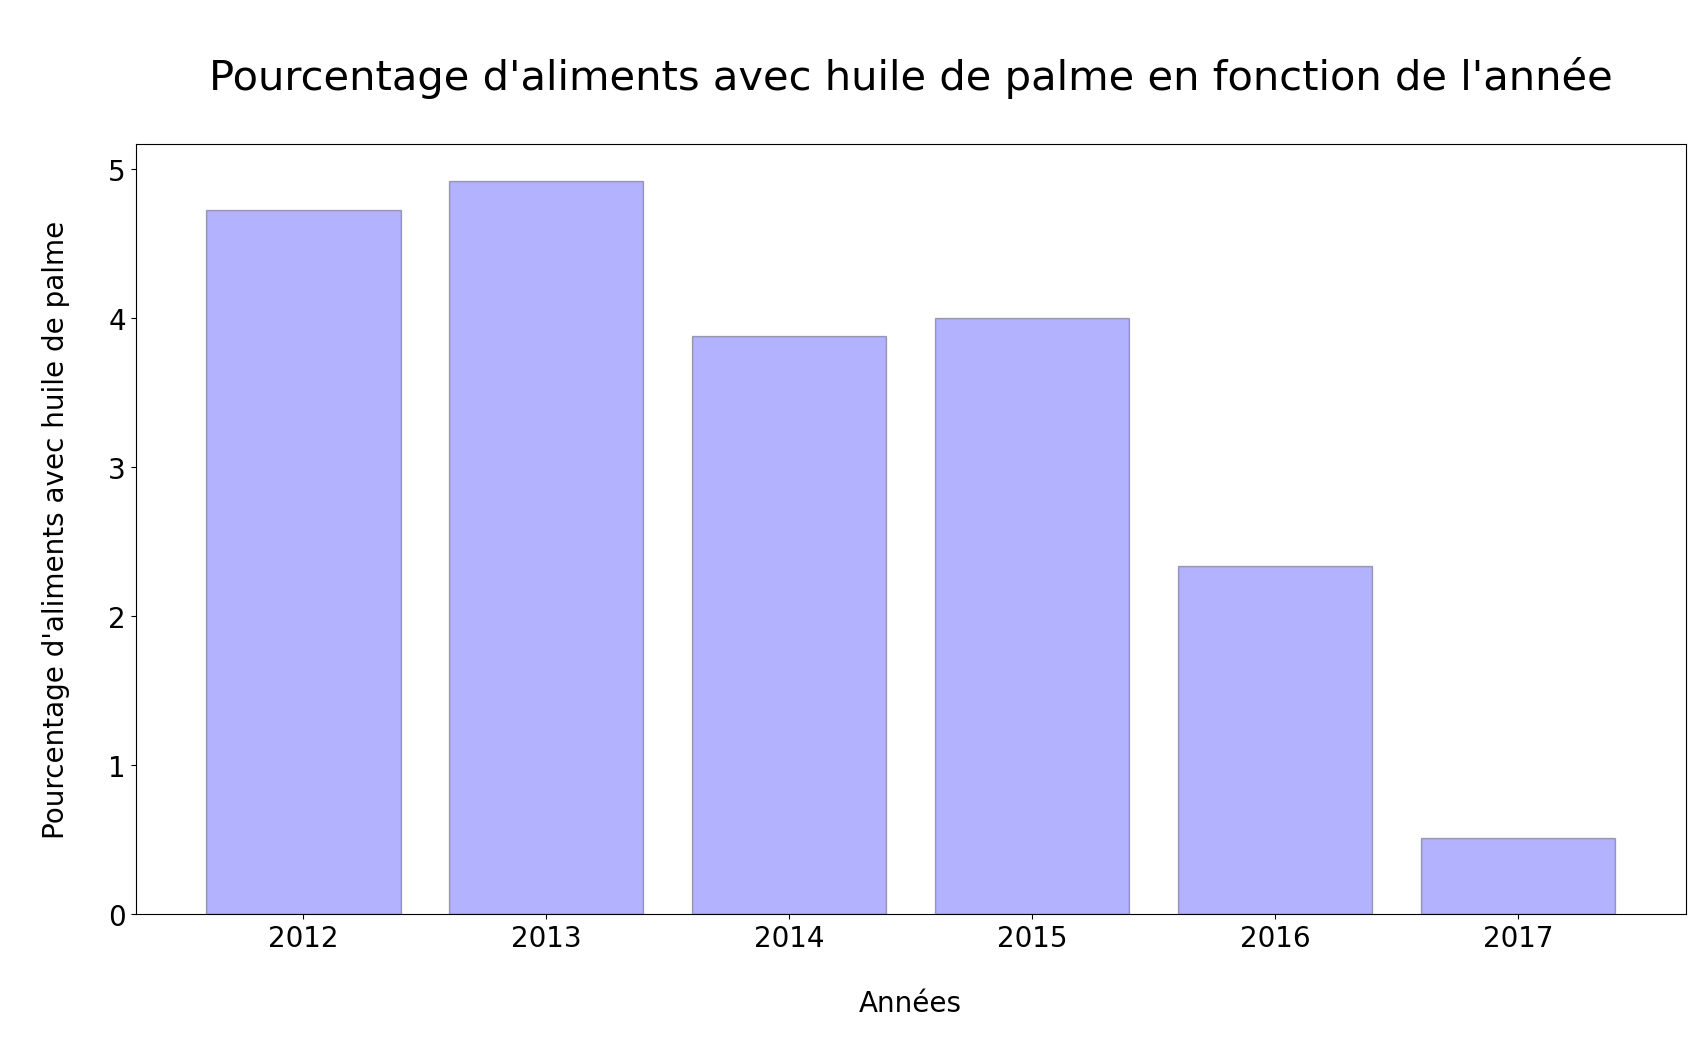

In [80]:
annees = data_clean.created_datetime.dt.year.unique().tolist()
annees.sort()
propor_palme = []
for i in annees:
    propor_palme.append(len(data_clean.loc[(data_clean['ingredients_from_palm_oil_n'] > 0) & (data_clean.created_datetime.dt.year == i)]) / len(data_clean.loc[data_clean.created_datetime.dt.year == i])*100)

plt.figure(figsize=(20,10))
plt.bar(annees, propor_palme, color = 'blue', alpha = 0.3, edgecolor='black', width=0.8);
plt.title("\nPourcentage d'aliments avec huile de palme en fonction de l'année\n", fontsize=30)
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.ylabel("\nPourcentage d'aliments avec huile de palme\n", fontsize=20)
plt.xlabel("\nAnnées\n", fontsize=20)
plt.show()

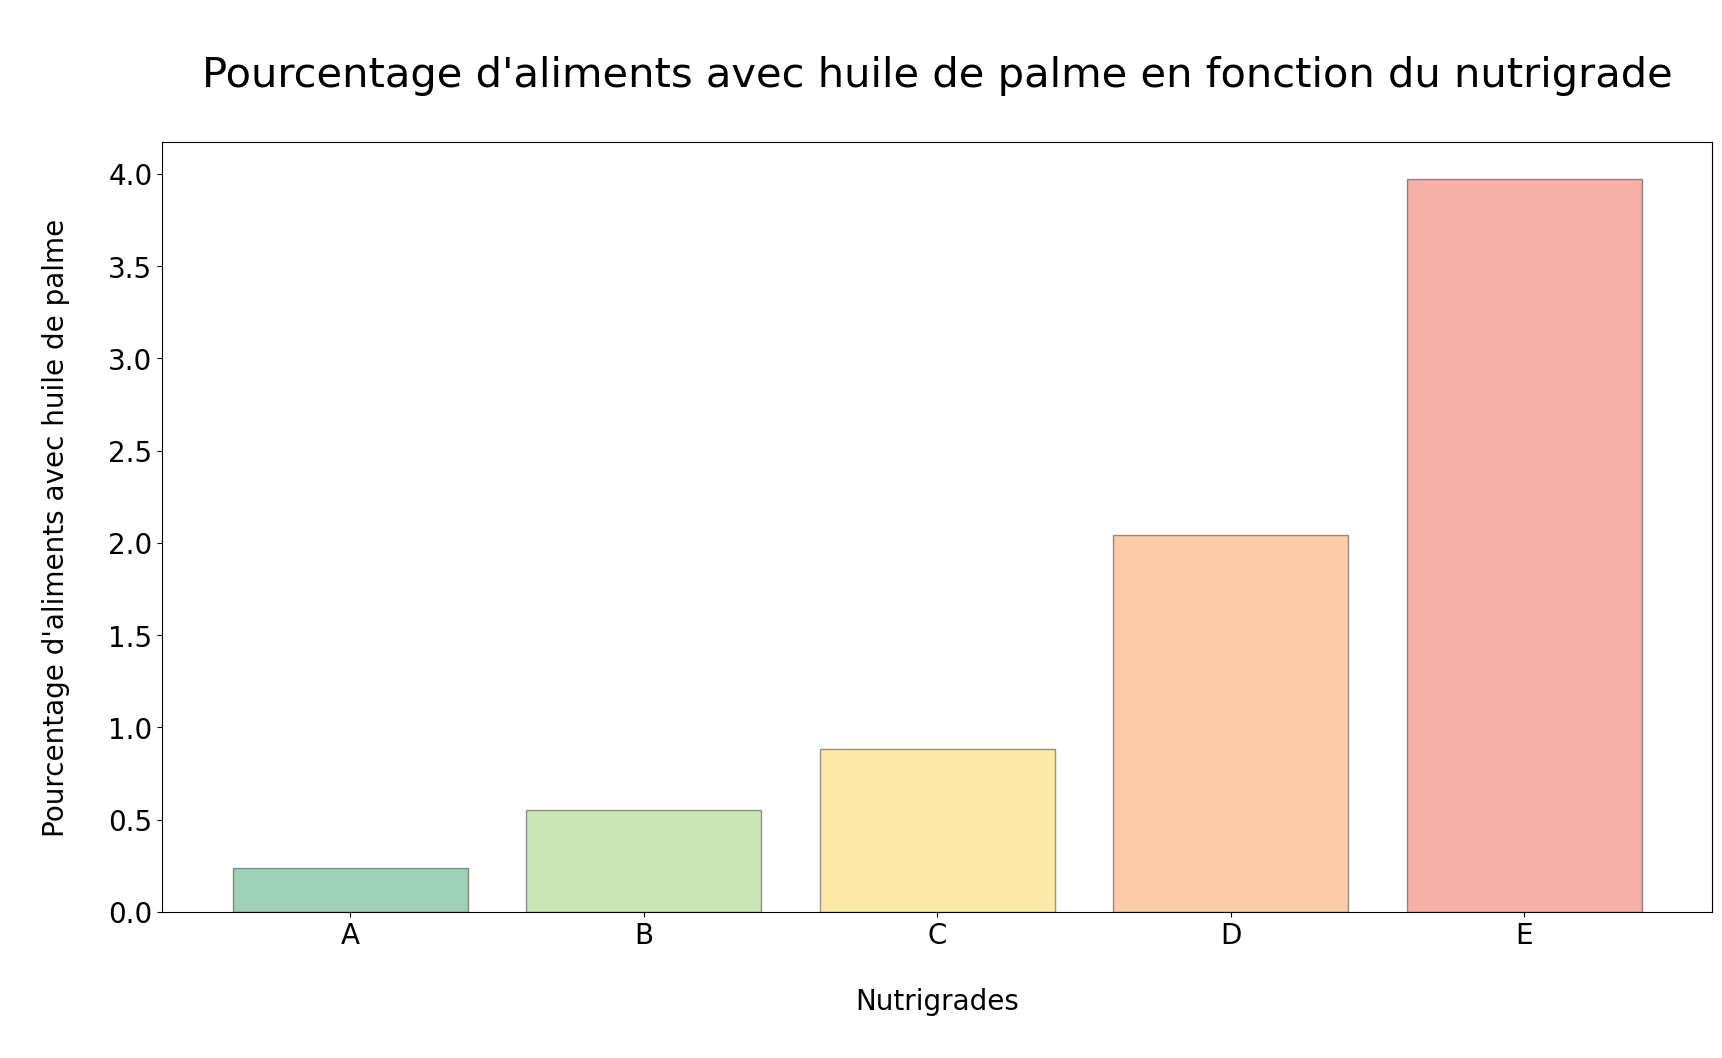

In [81]:
propor_palme = []
for i in ['a', 'b', 'c', 'd', 'e']:
    propor_palme.append(len(data_clean.loc[(data_clean['ingredients_from_palm_oil_n'] > 0) & (data_clean['nutrition_grade_fr'] == i)]) / len(data_clean.loc[data_clean['nutrition_grade_fr'] == i])*100)
nutrigrades = ['A', 'B', 'C', 'D', 'E']

nutrigrade_palette = ['#118D51', '#7EC247', '#FECB27', '#F58024', '#ED3B23']
plt.figure(figsize=(20,10))
plt.bar(nutrigrades, propor_palme, color = nutrigrade_palette, alpha = 0.4, edgecolor='black', width=0.8);
plt.title("\nPourcentage d'aliments avec huile de palme en fonction du nutrigrade\n", fontsize=30)
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.ylabel("\nPourcentage d'aliments avec huile de palme\n", fontsize=20)
plt.xlabel("\nNutrigrades\n", fontsize=20)
plt.show()

